In [1]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import powerlaw
import statistics

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
pwd

'/Users/aurelianosancho/Dropbox/Proposal_Aureliano'

In [5]:
df_cod = pd.read_excel('municipios_Salurbal.xlsx')

Level 1 is the city and level 2 is the subcity 

The L1AD is the city level

The L1UX is the urban extent boundary

L2 = is the subcity

In [6]:
Codebook = pd.read_excel('BEC_Codebook_20191031.xlsx')
L1AD = pd.read_csv('BEC_L1AD_20191031.csv')
L1UX = pd.read_csv('BEC_L1UX_20191031.csv')
L2 = pd.read_csv('BEC_L2_20191031.csv')

In [12]:
L1AD = L1AD.fillna(L1AD.mean())

In [14]:
suma_l1ad = L1AD[['BECTUAREAL1AD', 'BECPCTURBANL1AD', 'BECNURBPTCHL1AD', 'BECPTCHDENSL1AD', 'BECAVGPTCHAREAL1AD',
                  'BECCVPTCHAREAL1AD', 'BECAWMNSHPINDXL1AD', 'BECAWMNNNGHL1AD', 'BECEDGDENSL1AD', 
                  'BECEFFMESHSIZEL1AD', 'BECAWAVGPTCHAREAL1AD', 'BECAWEDGDENSL1AD',
                  'BECPOPDENSL1AD', 'BECPOPCONCL1AD', 'BECERRORWPL1AD', 'BECMAXNDVINW2000L1AD',
                  'BECMEDNDVINW2000L1AD', 'BECMAXNDVINW2001L1AD', 'BECMEDNDVINW2001L1AD',
                  'BECMAXNDVINW2002L1AD', 'BECMEDNDVINW2002L1AD', 'BECMAXNDVINW2003L1AD', 
                  'BECMEDNDVINW2003L1AD', 'BECMAXNDVINW2004L1AD', 'BECMEDNDVINW2004L1AD', 
                  'BECMAXNDVINW2005L1AD', 'BECMEDNDVINW2005L1AD', 'BECMAXNDVINW2006L1AD', 
                  'BECMEDNDVINW2006L1AD', 'BECMAXNDVINW2007L1AD', 'BECMEDNDVINW2007L1AD', 
                  'BECMAXNDVINW2008L1AD', 'BECMEDNDVINW2008L1AD', 'BECMAXNDVINW2009L1AD', 
                  'BECMEDNDVINW2009L1AD', 'BECMAXNDVINW2010L1AD', 'BECMEDNDVINW2010L1AD', 
                  'BECMAXNDVINW2011L1AD', 'BECMEDNDVINW2011L1AD', 'BECMAXNDVINW2012L1AD',
                  'BECMEDNDVINW2012L1AD', 'BECMAXNDVINW2013L1AD',
                  'BECMEDNDVINW2013L1AD', 'BECMAXNDVINW2014L1AD', 'BECMEDNDVINW2014L1AD', 
                  'BECMAXNDVINW2015L1AD', 'BECMEDNDVINW2015L1AD', 'BECMAXNDVINW2016L1AD', 
                  'BECMEDNDVINW2016L1AD', 'BECPRSBRTL1AD', 'BECBRTLNGTHL1AD', 'BECNUMBRTUSL1AD', 
                  'BECBRTPRCTRIPL1AD', 'BECSUPBRTL1AD', 'BECDEMBRTL1AD', 'BECPAYCAPBRTL1AD', 
                  'BECPRSSUBWAYL1AD', 'BECSUBWAYLNGTHL1AD', 'BECSUBWAYPRCTRIPL1AD', 
                  'BECSUPSUBL1AD', 'BECPAYCAPSUBL1AD', 'BECPRSAERTRAML1AD', 'BECAERTRAMLNGTHL1AD',
                  'BECBYLANELNGTHL1AD', 'BECSUPBIKEFACL1AD', 'BECOPSTTSYSLNGTHL1AD',
                  'BECGASPRICEL1AD', 'BECGASPRICEADJL1AD', 'BECADAREAL1AD', 'BECADCRCTYAVGL1AD',
                  'BECADINTDENS3L1AD', 'BECADINTDENS4L1AD', 'BECADINTDENSL1AD', 'BECADLRDENSL1AD',
                  'BECADSTTDENSL1AD', 'BECADSTTPNODEAVGL1AD', 'BECADSTTPNODESDL1AD', 'BECADSTTLGAVGL1AD',
                  'BECAREAPARKSL1AD', 'BECDENSPARKSL1AD', 'BECMINWAGEL1AD', 'BECURBLANDPL1AD', 'BECSTTPL1AD']]

In [17]:
suma_l1ux = L1UX[['BECTUAREAL1UX', 'BECPCTURBANL1UX', 'BECNURBPTCHL1UX', 'BECPTCHDENSL1UX','BECAVGPTCHAREAL1UX', 'BECAWAVGPTCHAREAL1UX',
         'BECEFFMESHSIZEL1UX', 'BECCVPTCHAREAL1UX', 'BECAWMNSHPINDXL1UX', 'BECAWMNNNGHL1UX', 'BECEDGDENSL1UX',
         'BECAWEDGDENSL1UX', 'BECADAREAL1UX', 'BECADSTTDENSL1UX', 'BECADLRDENSL1UX', 'BECADINTDENSL1UX', 'BECADINTDENS3L1UX',
         'BECADINTDENS4L1UX', 'BECADSTTPNODEAVGL1UX', 'BECADSTTPNODESDL1UX', 'BECADSTTLGAVGL1UX', 'BECADCRCTYAVGL1UX']]

In [19]:
suma_l2 = L2[['BECTUAREAL2', 'BECPCTURBANL2', 'BECNURBPTCHL2', 'BECPTCHDENSL2','BECAVGPTCHAREAL2', 'BECAWAVGPTCHAREAL2',
         'BECEFFMESHSIZEL2', 'BECCVPTCHAREAL2', 'BECAWMNSHPINDXL2', 'BECAWMNNNGHL2', 'BECEDGDENSL2',
         'BECAWEDGDENSL2', 'BECADAREAL2', 'BECADSTTDENSL2', 'BECADLRDENSL2', 'BECADINTDENSL2', 'BECADINTDENS3L2',
         'BECADINTDENS4L2', 'BECADSTTPNODEAVGL2', 'BECADSTTPNODESDL2', 'BECADSTTLGAVGL2', 'BECADCRCTYAVGL2']]

In [21]:
siglas = ['AR', 'BR', 'MX', 'CL', 'PE', 'CO', 'CR', 'GT', 'SV', 'NI', 'PA']

In [22]:
names = ['BECTUAREAL1AD', 'BECPCTURBANL1AD', 'BECNURBPTCHL1AD', 'BECPTCHDENSL1AD', 'BECAVGPTCHAREAL1AD',
                  'BECCVPTCHAREAL1AD', 'BECAWMNSHPINDXL1AD', 'BECAWMNNNGHL1AD', 'BECEDGDENSL1AD', 
                  'BECEFFMESHSIZEL1AD', 'BECAWAVGPTCHAREAL1AD', 'BECAWEDGDENSL1AD',
                  'BECPOPDENSL1AD', 'BECPOPCONCL1AD', 'BECERRORWPL1AD', 'BECMAXNDVINW2000L1AD',
                  'BECMEDNDVINW2000L1AD', 'BECMAXNDVINW2001L1AD', 'BECMEDNDVINW2001L1AD',
                  'BECMAXNDVINW2002L1AD', 'BECMEDNDVINW2002L1AD', 'BECMAXNDVINW2003L1AD', 
                  'BECMEDNDVINW2003L1AD', 'BECMAXNDVINW2004L1AD', 'BECMEDNDVINW2004L1AD', 
                  'BECMAXNDVINW2005L1AD', 'BECMEDNDVINW2005L1AD', 'BECMAXNDVINW2006L1AD', 
                  'BECMEDNDVINW2006L1AD', 'BECMAXNDVINW2007L1AD', 'BECMEDNDVINW2007L1AD', 
                  'BECMAXNDVINW2008L1AD', 'BECMEDNDVINW2008L1AD', 'BECMAXNDVINW2009L1AD', 
                  'BECMEDNDVINW2009L1AD', 'BECMAXNDVINW2010L1AD', 'BECMEDNDVINW2010L1AD', 
                  'BECMAXNDVINW2011L1AD', 'BECMEDNDVINW2011L1AD', 'BECMAXNDVINW2012L1AD',
                  'BECMEDNDVINW2012L1AD', 'BECMAXNDVINW2013L1AD',
                  'BECMEDNDVINW2013L1AD', 'BECMAXNDVINW2014L1AD', 'BECMEDNDVINW2014L1AD', 
                  'BECMAXNDVINW2015L1AD', 'BECMEDNDVINW2015L1AD', 'BECMAXNDVINW2016L1AD', 
                  'BECMEDNDVINW2016L1AD', 'BECPRSBRTL1AD', 'BECBRTLNGTHL1AD', 'BECNUMBRTUSL1AD', 
                  'BECBRTPRCTRIPL1AD', 'BECSUPBRTL1AD', 'BECDEMBRTL1AD', 'BECPAYCAPBRTL1AD', 
                  'BECPRSSUBWAYL1AD', 'BECSUBWAYLNGTHL1AD', 'BECSUBWAYPRCTRIPL1AD', 
                  'BECSUPSUBL1AD', 'BECPAYCAPSUBL1AD', 'BECPRSAERTRAML1AD', 'BECAERTRAMLNGTHL1AD',
                  'BECBYLANELNGTHL1AD', 'BECSUPBIKEFACL1AD', 'BECOPSTTSYSLNGTHL1AD',
                  'BECGASPRICEL1AD', 'BECGASPRICEADJL1AD', 'BECADAREAL1AD', 'BECADCRCTYAVGL1AD',
                  'BECADINTDENS3L1AD', 'BECADINTDENS4L1AD', 'BECADINTDENSL1AD', 'BECADLRDENSL1AD',
                  'BECADSTTDENSL1AD', 'BECADSTTPNODEAVGL1AD', 'BECADSTTPNODESDL1AD', 'BECADSTTLGAVGL1AD',
                  'BECAREAPARKSL1AD', 'BECDENSPARKSL1AD', 'BECMINWAGEL1AD', 'BECURBLANDPL1AD', 'BECSTTPL1AD']

#x = np.log(L1AD.BECTPOPL1AD)

In [23]:
cod = pd.DataFrame({'SALID1': L1AD.SALID1})
cod.to_csv('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/SALID1_Anderson.csv')

In [ ]:
for i in range(len(L1AD)):
    if (L1AD.iloc[i,0] != 'BR'):
        L1AD.iloc[i,0] = 'Other Cities'

In [ ]:
L1AD.ISO2.unique()

In [ ]:
indicator_L1AD = []
alpha_L1AD = []
Y0_L1AD = []
residuos_L1AD = []
bL = []
bU = []
IC = []

for i in range(0,len(names)):   # len(names)
    for j in range(len(Codebook.Measure)):
        if (names[i] == Codebook.iloc[j,1]):      
            print(names[i])
            print(Codebook.iloc[j,6])
            df = pd.DataFrame({'x': np.log10(L1AD.BECTPOPL1AD)})
            df["y"] = np.log10(L1AD[names[i]])
            df["Category"] = L1AD.ISO2
            df = df.reset_index(drop=True)
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df[pd.notnull(df['y'])]

            y = df.y
            x = df.x
            print(len(x))
            model = LinearRegression()
            x = np.array(x)
            x = x.reshape(-1,1)
            model.fit(x,y)
            predd = model.predict(x)

            indicator_L1AD.append(Codebook.iloc[j,6])
            alpha_L1AD.append(round(model.coef_[0],3))
            Y0_L1AD.append(round(model.intercept_,3))
            residuos_L1AD.append(round(model.score(x, y),3))
            

            #if (round(popt[1],3) < 1.3) and (round(popt[1],3) > 0.1):
            R2 = 1-(1-model.score(x, y))*((len(df)-1)/(len(df)-2))
            
            X = sm.add_constant(x)
            mod = sm.OLS(y,X)
            res = mod.fit()
            ic = res.conf_int(0.1)
            ic2 = round(ic.iloc[1,0],3), round(ic.iloc[1,1],3)
            IC.append(ic2)
            
            res = y - predd
            
            plt.figure(figsize=(16, 9))
            
            plt.plot(x, predd, 'r-', linewidth=7.0, label = r'$\beta$ = {}'.format(round(model.coef_[0],3)) + "\n" + 
                       r'$R^2$ = {}'.format(round(R2,3)))
            
            df3 = df[df.Category == 'Other Cities']
            groups2 = df3.groupby("Category")
            
            for name, group2 in groups2:
                plt.plot(group2["x"], group2["y"], marker="P", markersize = 15, linestyle="", label=name, 
                         color='orange')
                       
            df2 = df[df.Category == 'BR']       
            groups = df2.groupby("Category")
            
            for name, group in groups:
                plt.plot(group["x"], group["y"], marker="o", markersize = 15, linestyle="", label=name, 
                         color='g')

            #plt.title("L1AD", fontsize=35)
            plt.xlabel('log(Population)', fontsize=35)
            plt.ylabel('log({}'.format(Codebook.iloc[j,6])+')', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            plt.savefig('/Users/aurelianosancho/Desktop/NN/L1AD_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()
            
            ######################################
            
            plt.figure(figsize=(16, 9))
            np.var(res)
            #hist, bins = np.histogram(res, bins=25) #, label = 'Skew = {}'.format(round(skew(res),3)))# +
            
            plt.hist(res, bins=25, rwidth=0.9,label = 'Skew = {}'.format(round(skew(res),3)) + "\n" + 
                                           'Kurt = {}'.format(round(kurtosis(res),3)))                                               
            #width = 0.7 * (bins[1] - bins[0])
            #center = (bins[:-1] + bins[1:]) / 2
            #plt.bar(center, hist, align='center', width=width) 
            #plt.title('{}'.format(Codebook.iloc[j,6]), fontsize=35)
            plt.xlabel('Residuals', fontsize=35)
            plt.ylabel('Residuals count', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            #plt.savefig('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_Br_vs_TODOS_L1AD/L1AD_Residuals_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()
            
            ######################################
            group1 = []
            group2 = []
            group3 = []
            group4 = []
            
            for l in range(len(res)):
                if (L1AD.iloc[l,15] <= 250000):
                    group1.append(res.iloc[l])
                elif (L1AD.iloc[l,15] > 250000) and (L1AD.iloc[l,15] <= 500000):
                    group2.append(res.iloc[l])
                elif (L1AD.iloc[l,15] > 500000) and (L1AD.iloc[l,15] < 1000000):
                    group3.append(res.iloc[l])
                else:
                    group4.append(res.iloc[l])
            
            plt.figure(figsize=(16, 9))
            bins = 25;
            plt.hist([group1,group2,group3, group4], bins, stacked=True, density=True, rwidth=0.9,
                      color=["red", "blue", "green", "orange"], 
                      label = ["< 0.25M", "0.25M to 0.5M", "0.5M to 1.0M", "> 1M"])

            #plt.title('{}'.format(Codebook.iloc[j,6]), fontsize=35)
            plt.xlabel('Residuals', fontsize=35)
            plt.ylabel('Residuals count', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            #plt.savefig('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_Br_vs_TODOS_L1AD/L1AD_GROUPS_Residuals_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()
            

In [ ]:
#y - predd

In [ ]:
len(res)

In [ ]:
data_L1AD = pd.DataFrame({'Y': indicator_L1AD, r'$\beta_{L1AD}$': alpha_L1AD, r'$95\%$ $CI_{L1AD}$': IC,
                         r'$R^{2}_{L1AD}$': residuos_L1AD})
data_L1AD.to_csv('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_L1AD.csv')

In [ ]:
#data_L1AD = data_L1AD.sort_values('Alpha_L1AD', ascending=False)
data_L1AD

# L1UX

In [25]:
#L1UX.columns

In [26]:
L1UX.isnull().sum().sort_values(ascending=False);
L1UX = L1UX.fillna(L1UX.mean());

In [27]:
n_L1UX = ['BECTUAREAL1UX', 'BECPCTURBANL1UX', 'BECNURBPTCHL1UX', 'BECPTCHDENSL1UX','BECAVGPTCHAREAL1UX', 'BECAWAVGPTCHAREAL1UX',
         'BECEFFMESHSIZEL1UX', 'BECCVPTCHAREAL1UX', 'BECAWMNSHPINDXL1UX', 'BECAWMNNNGHL1UX', 'BECEDGDENSL1UX',
         'BECAWEDGDENSL1UX', 'BECADAREAL1UX', 'BECADSTTDENSL1UX', 'BECADLRDENSL1UX', 'BECADINTDENSL1UX', 'BECADINTDENS3L1UX',
         'BECADINTDENS4L1UX', 'BECADSTTPNODEAVGL1UX', 'BECADSTTPNODESDL1UX', 'BECADSTTLGAVGL1UX', 'BECADCRCTYAVGL1UX']
#x = np.log(L1UX.BECTPOPL1UX)

In [28]:
len(Codebook.Measure)

58

In [29]:
for i in range(len(L1UX)):
    if (L1UX.iloc[i,0] != 'BR'):
        L1UX.iloc[i,0] = 'Other Cities'

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


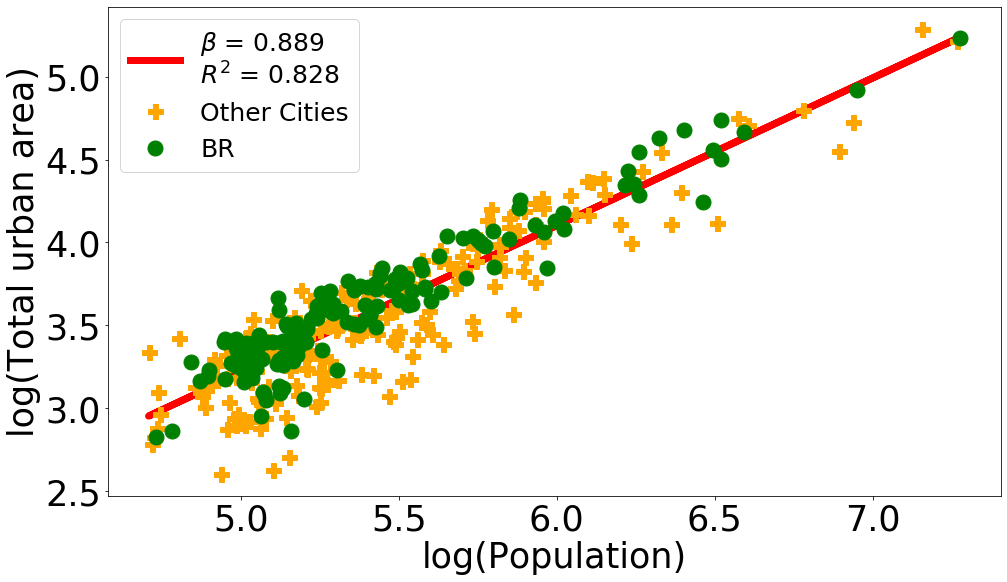

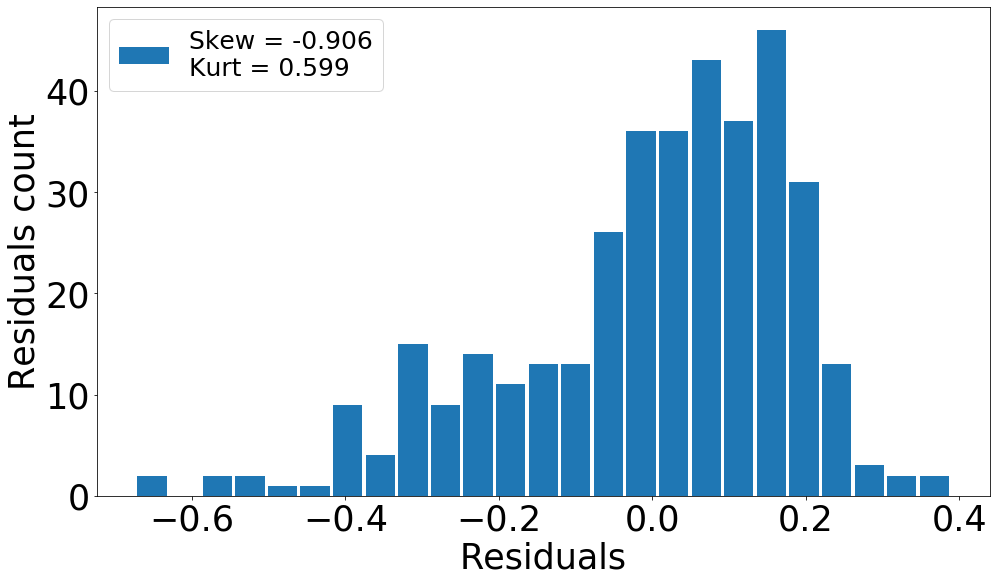

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


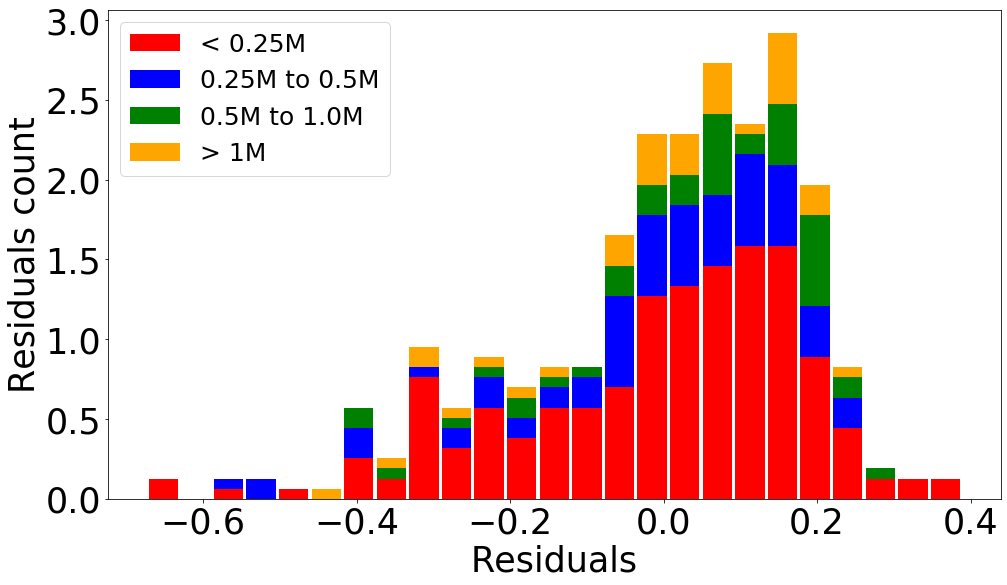

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


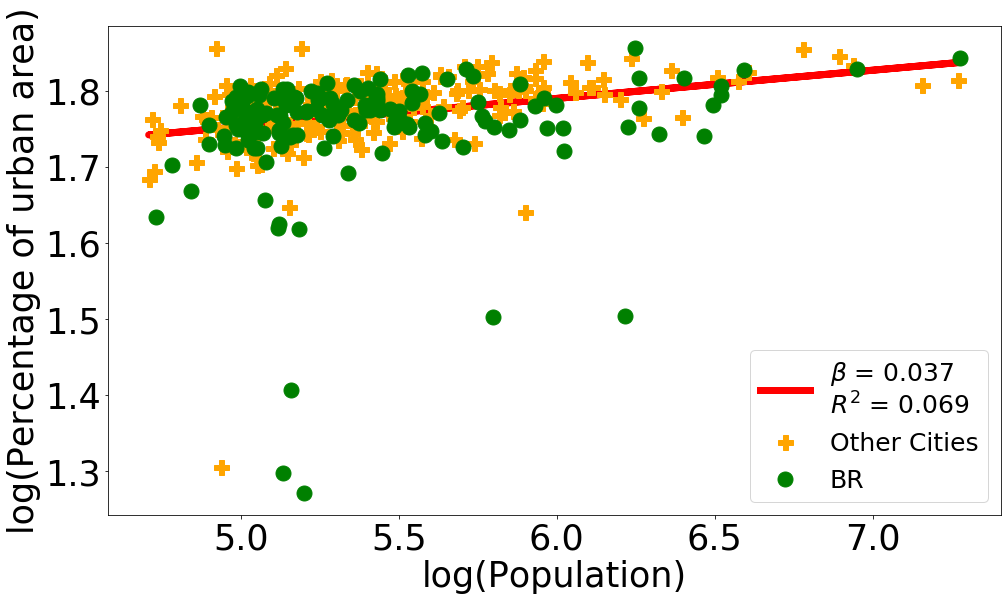

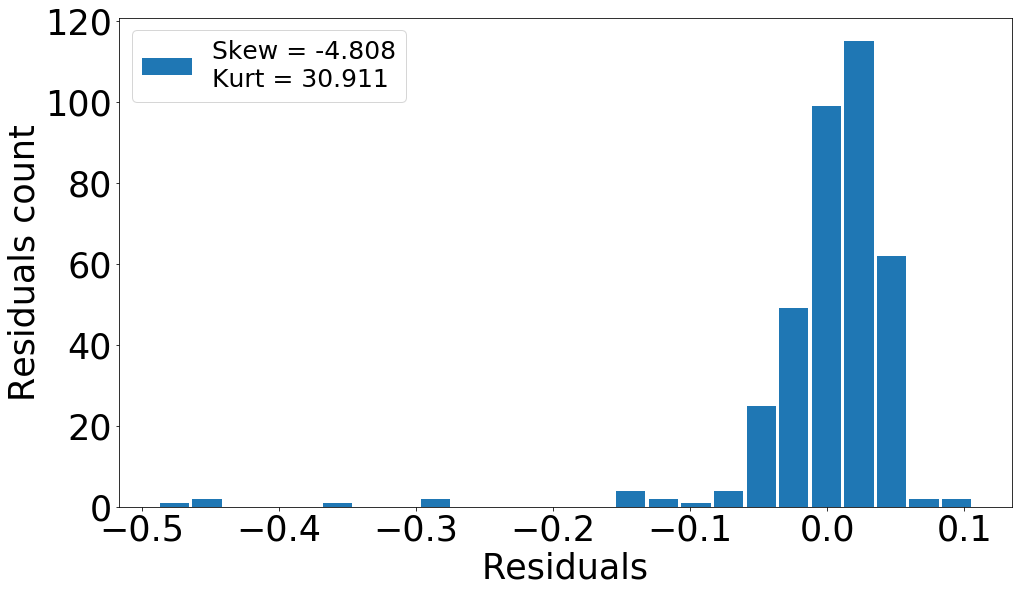

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


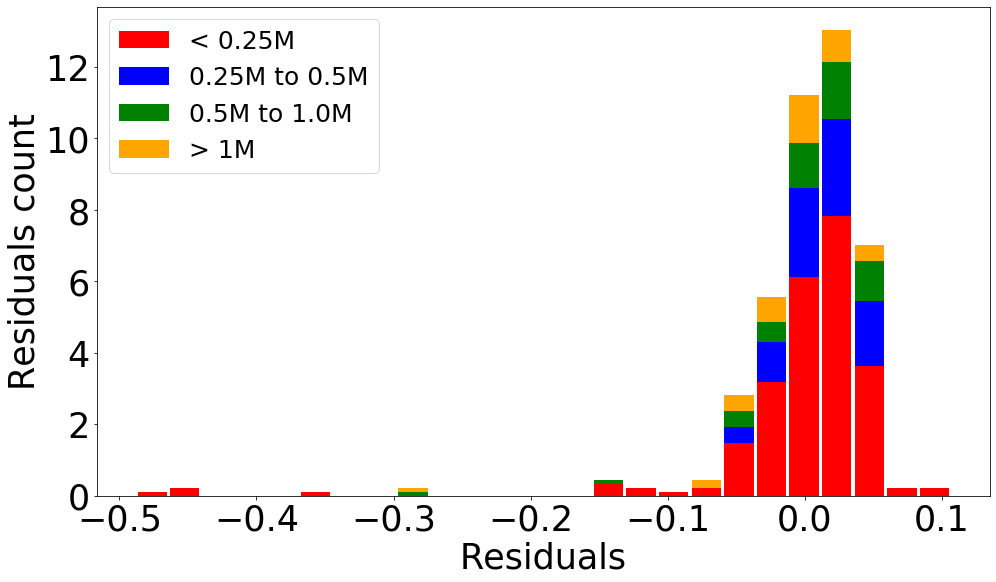

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


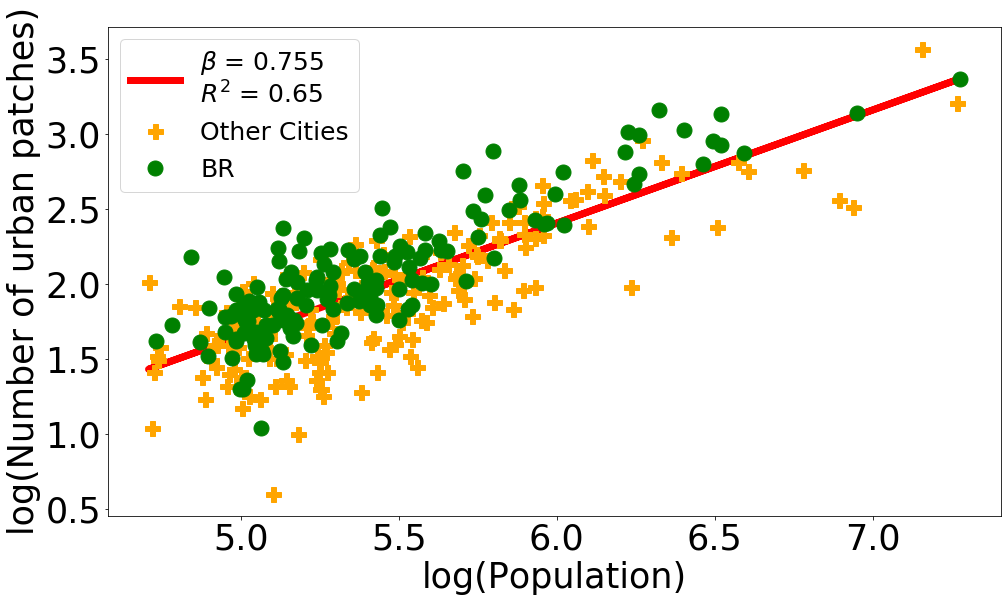

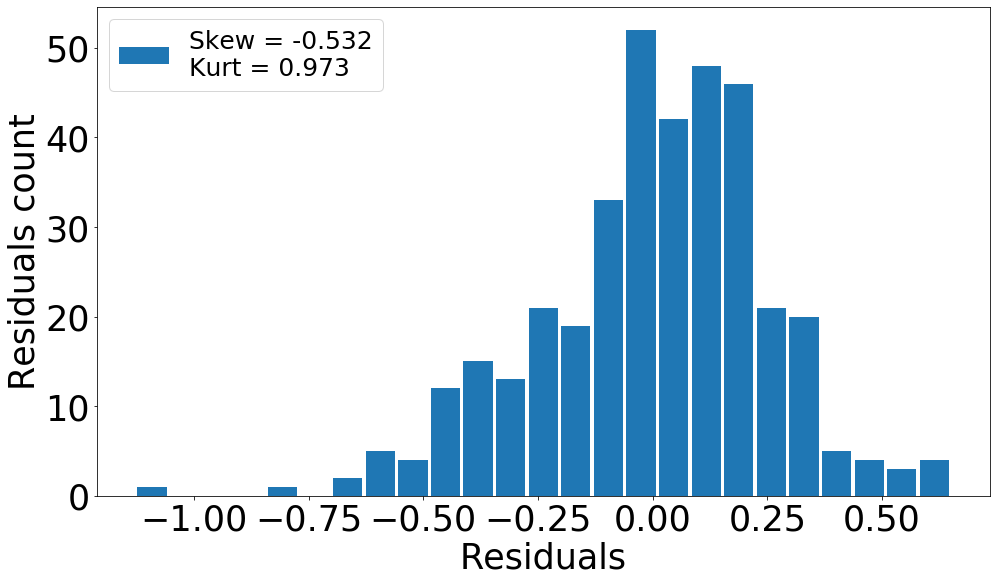

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


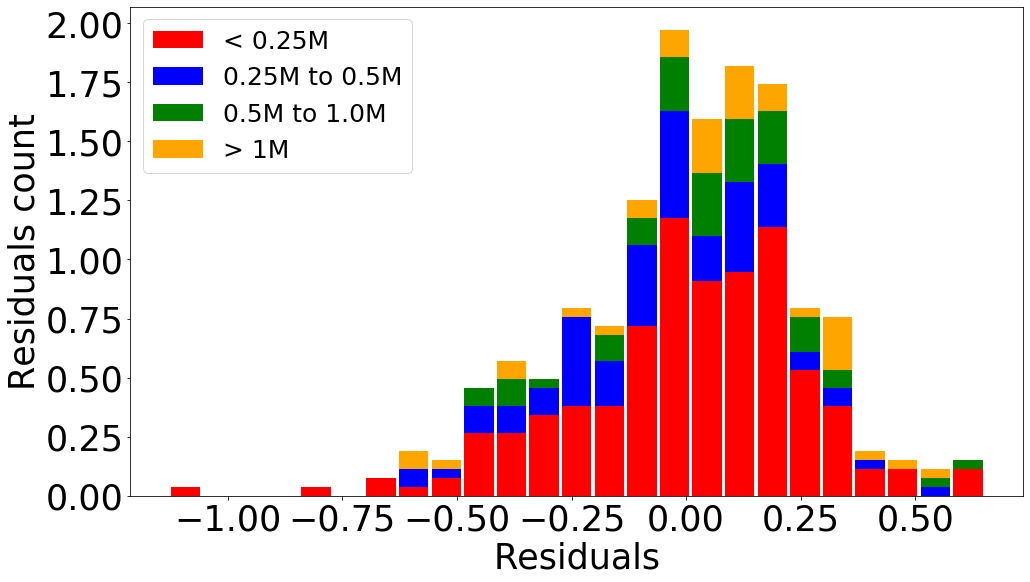

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


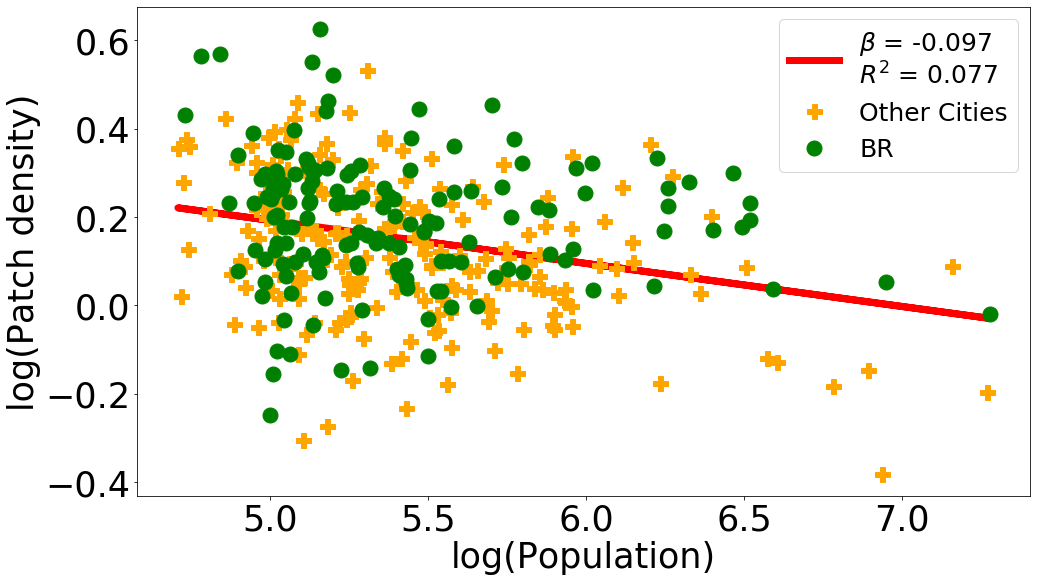

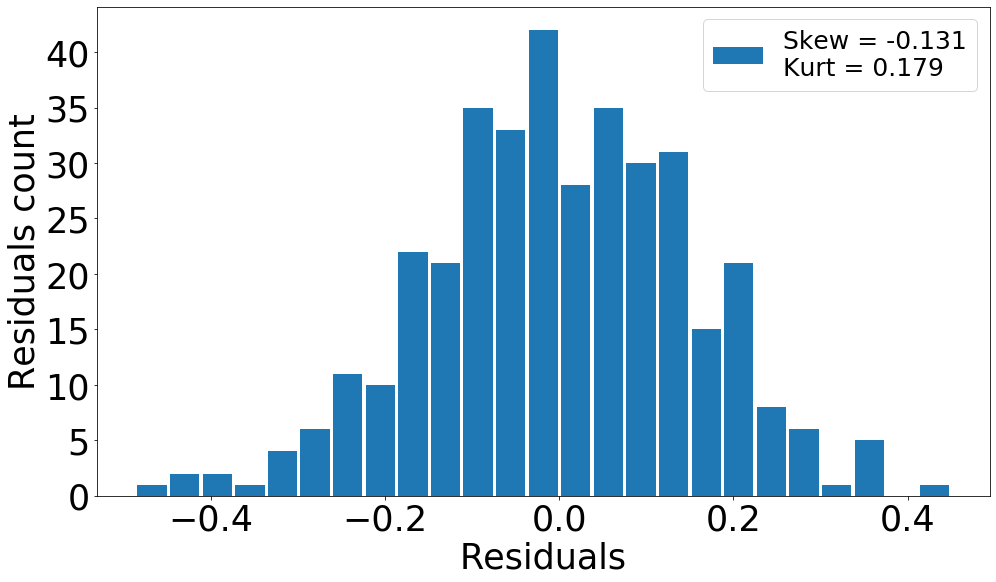

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


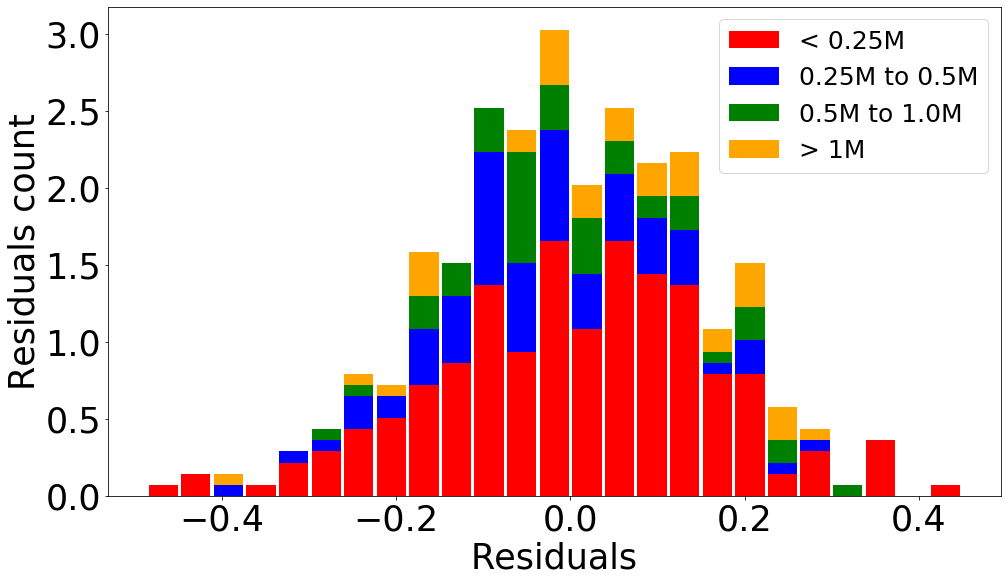

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


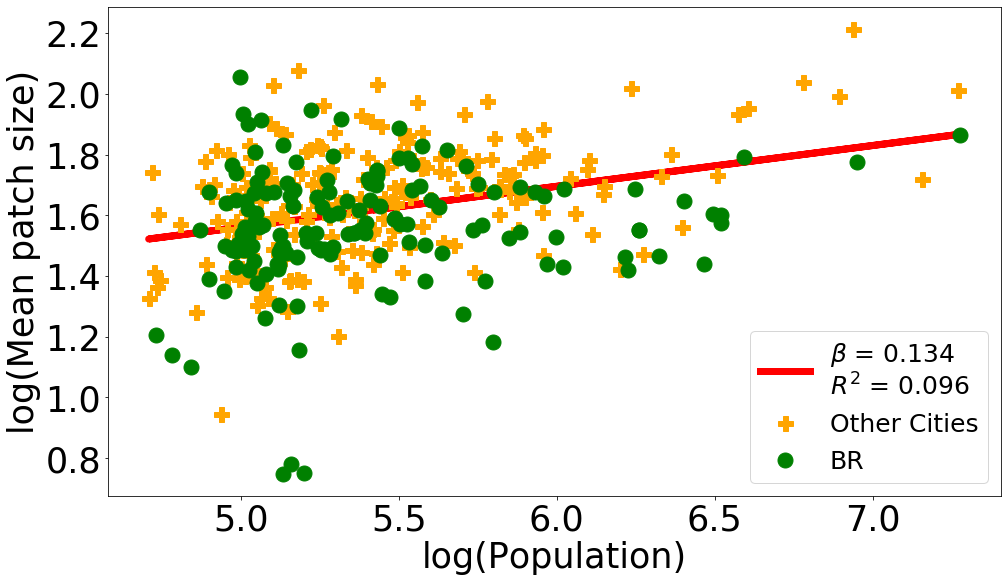

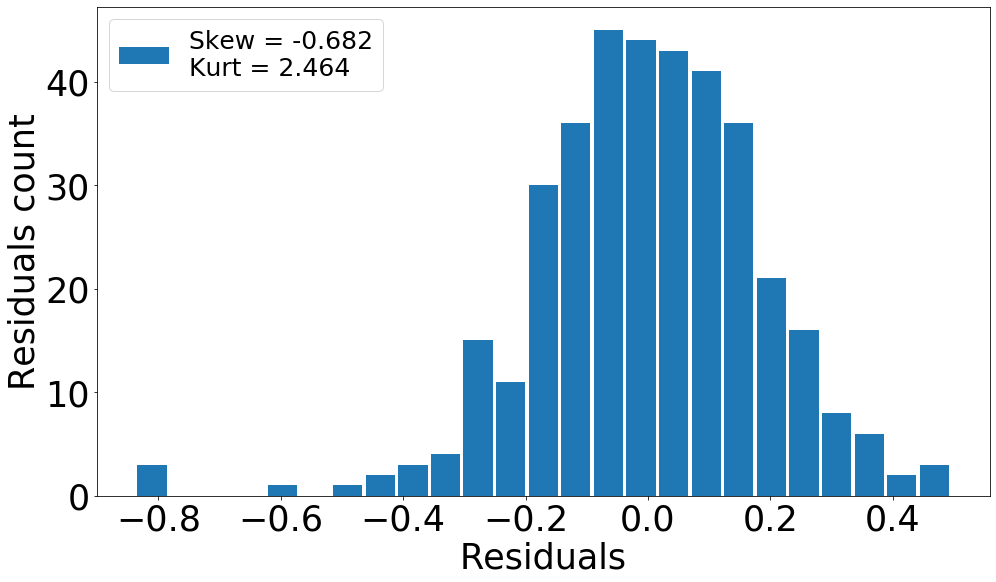

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


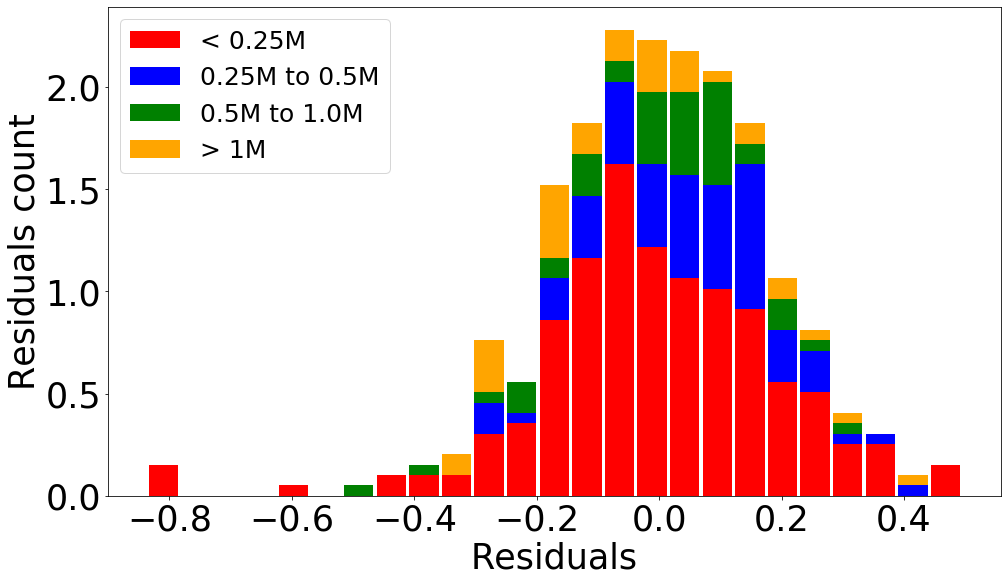

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


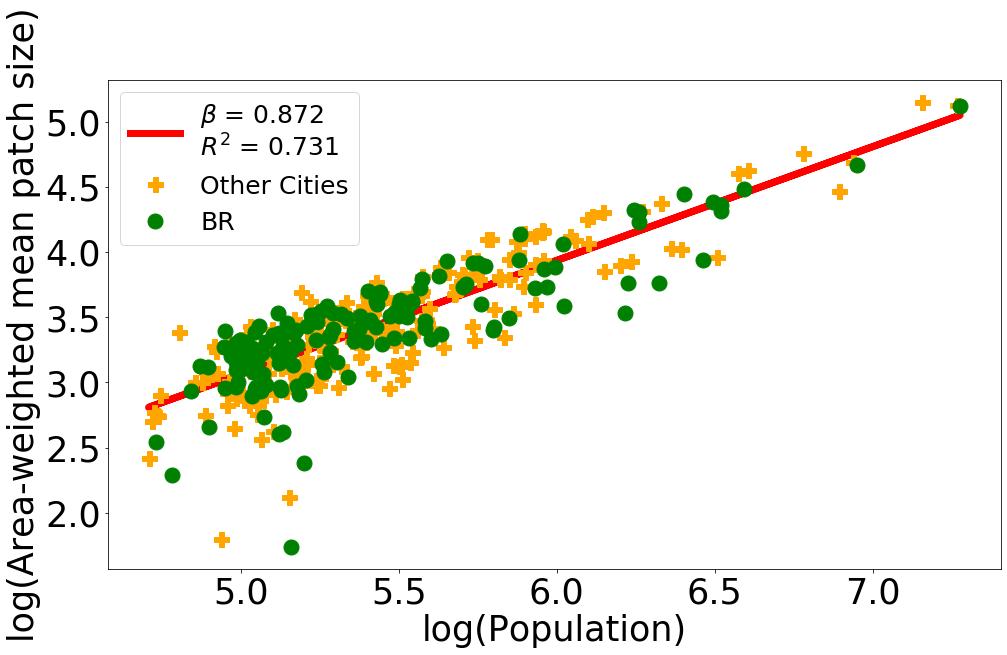

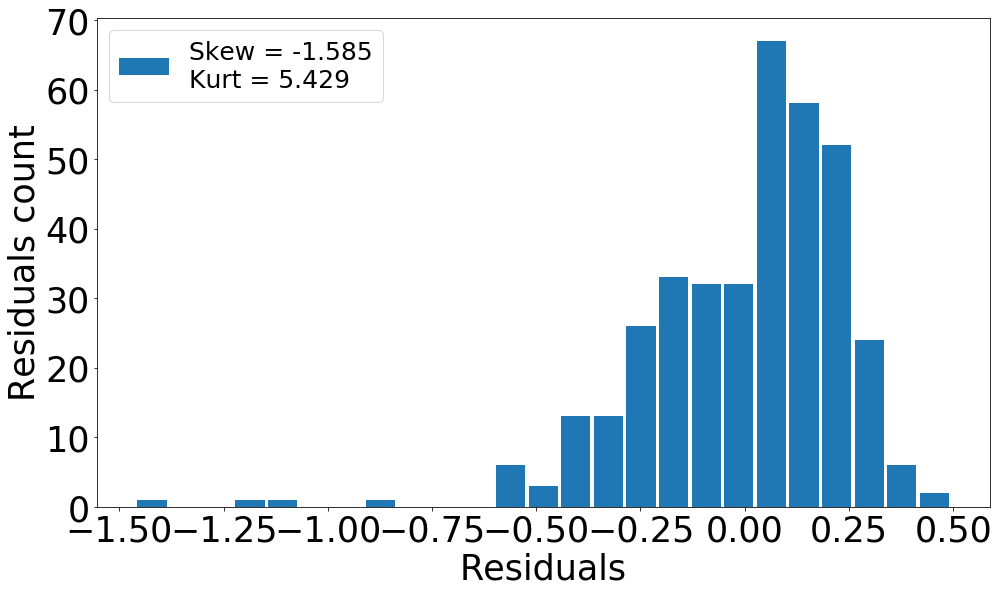

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


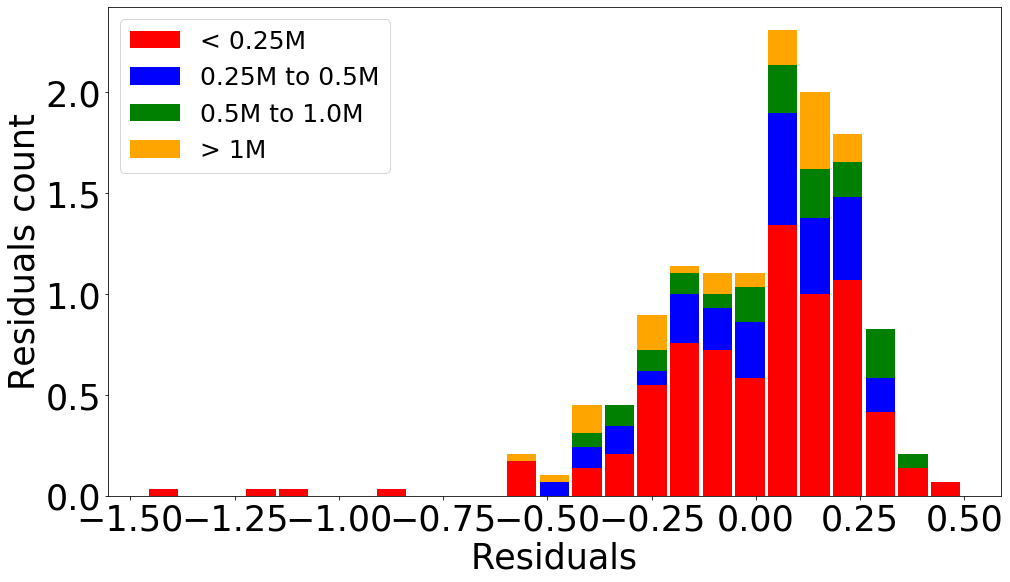

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


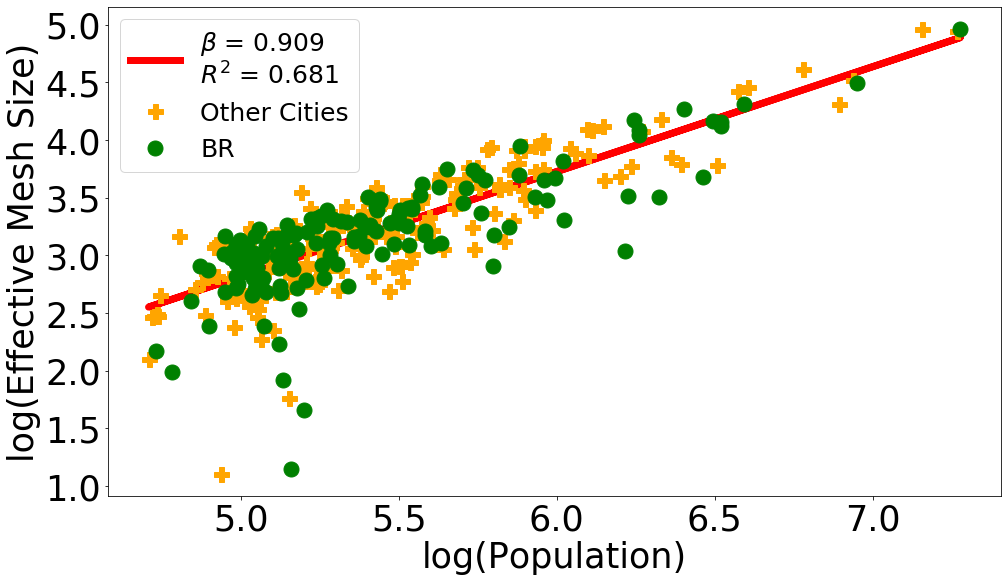

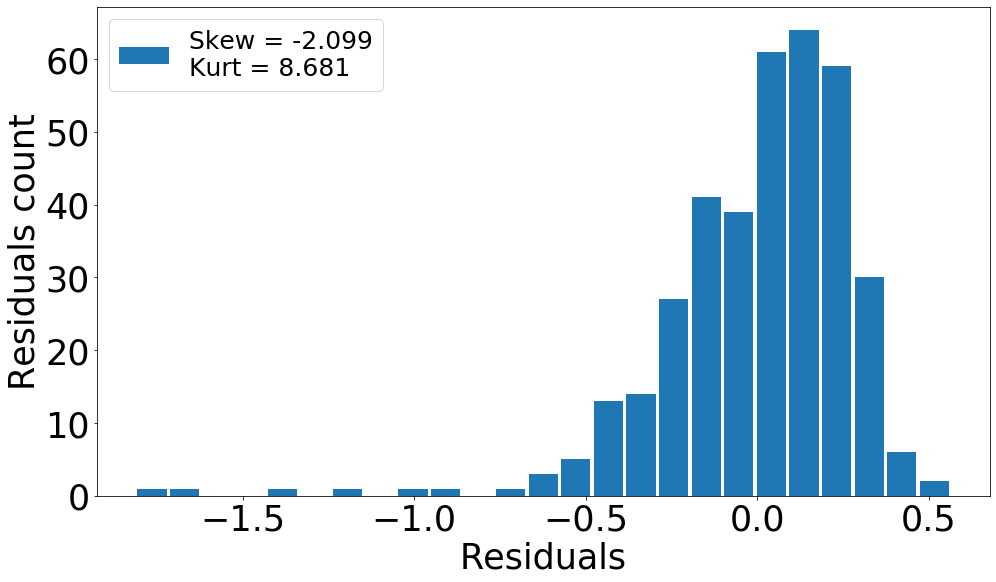

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


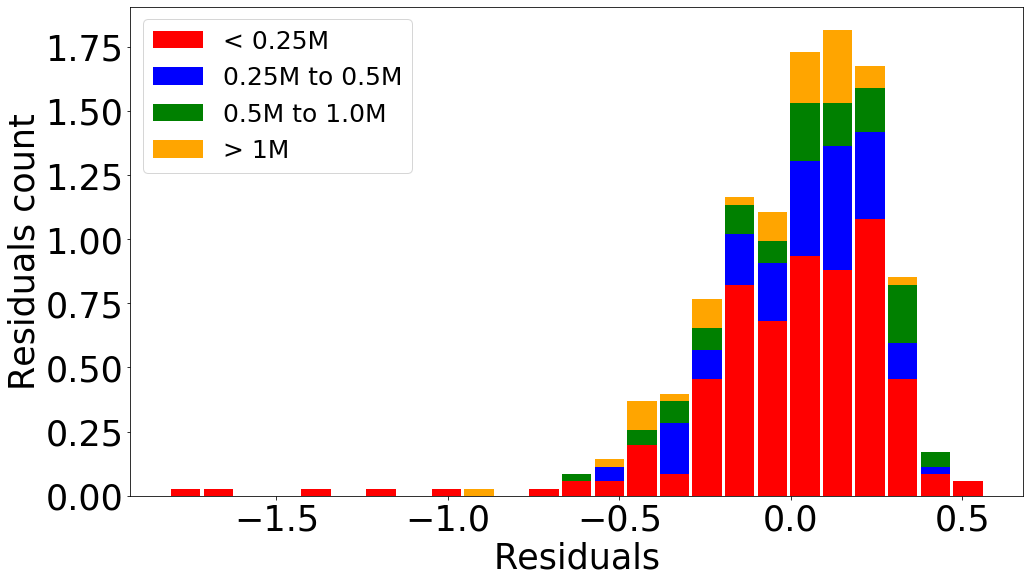

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


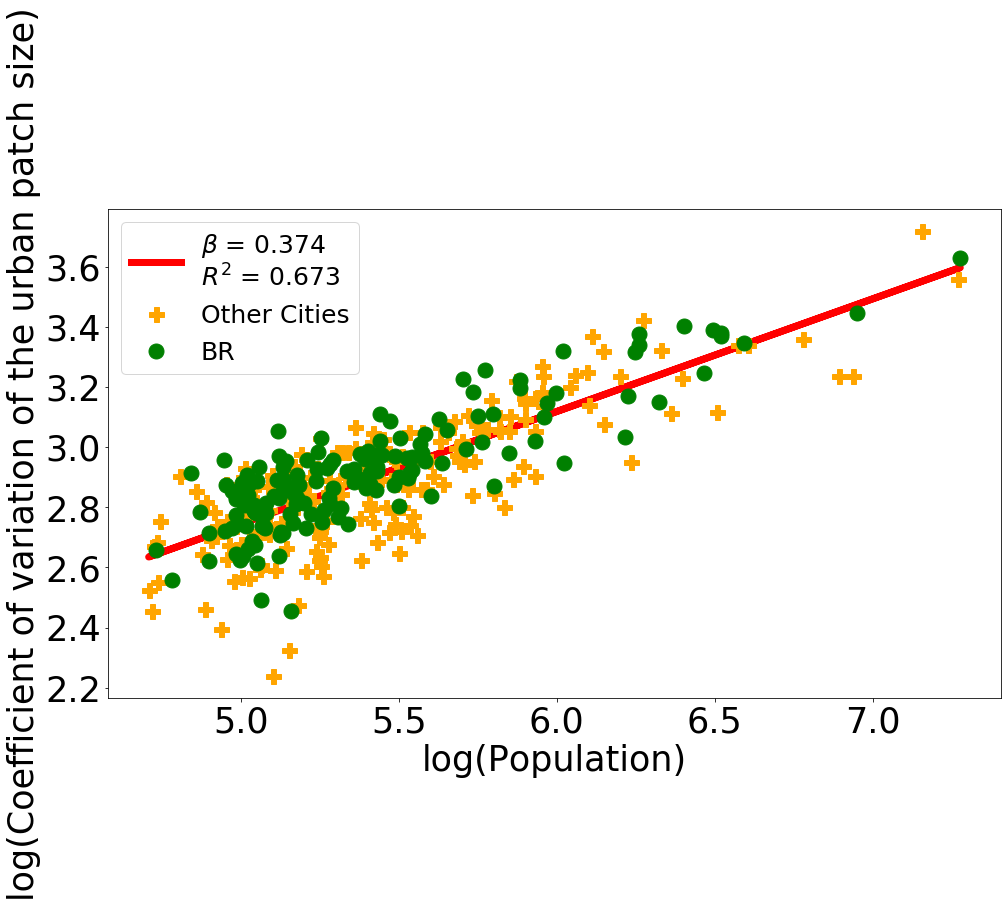

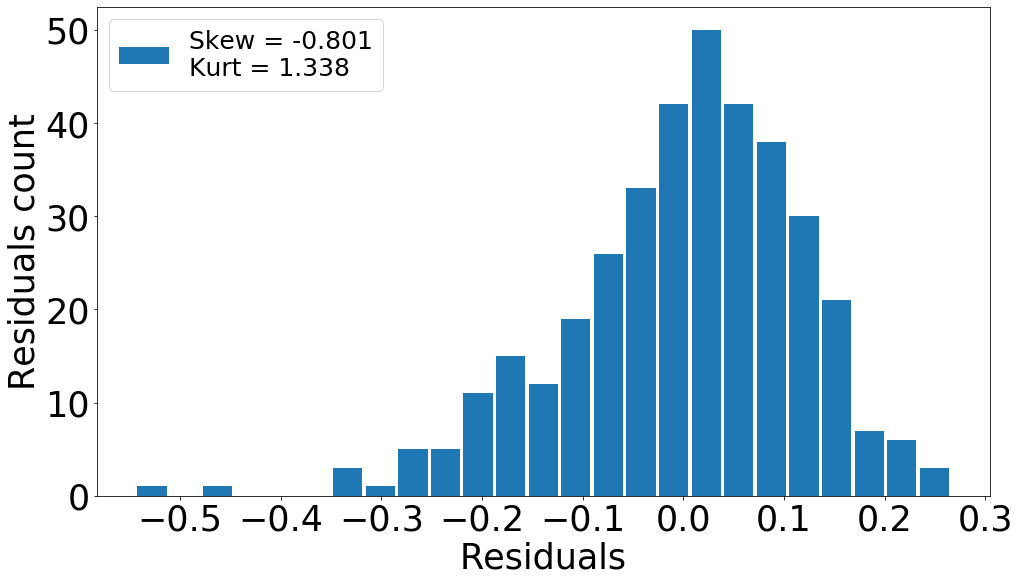

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


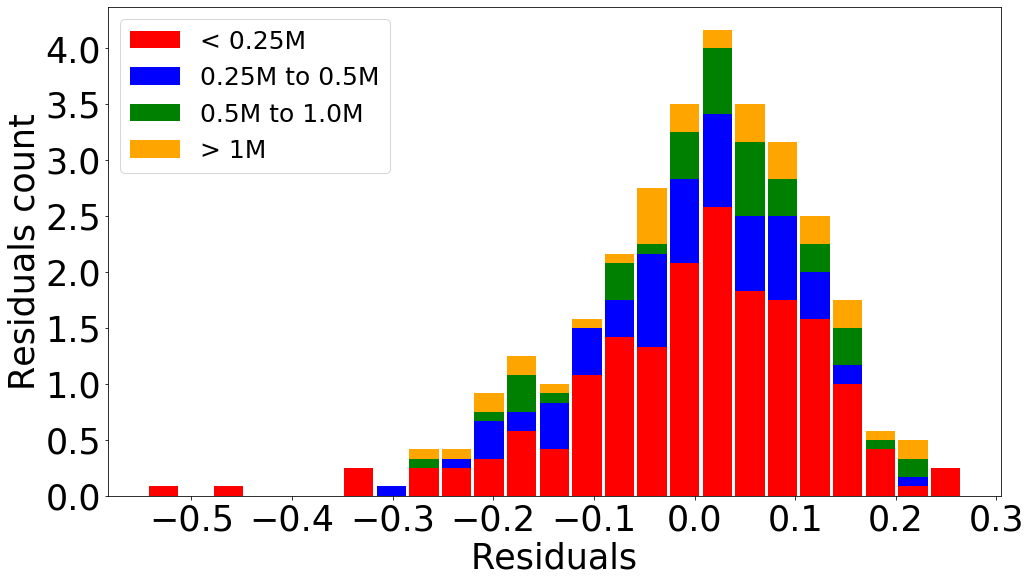

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


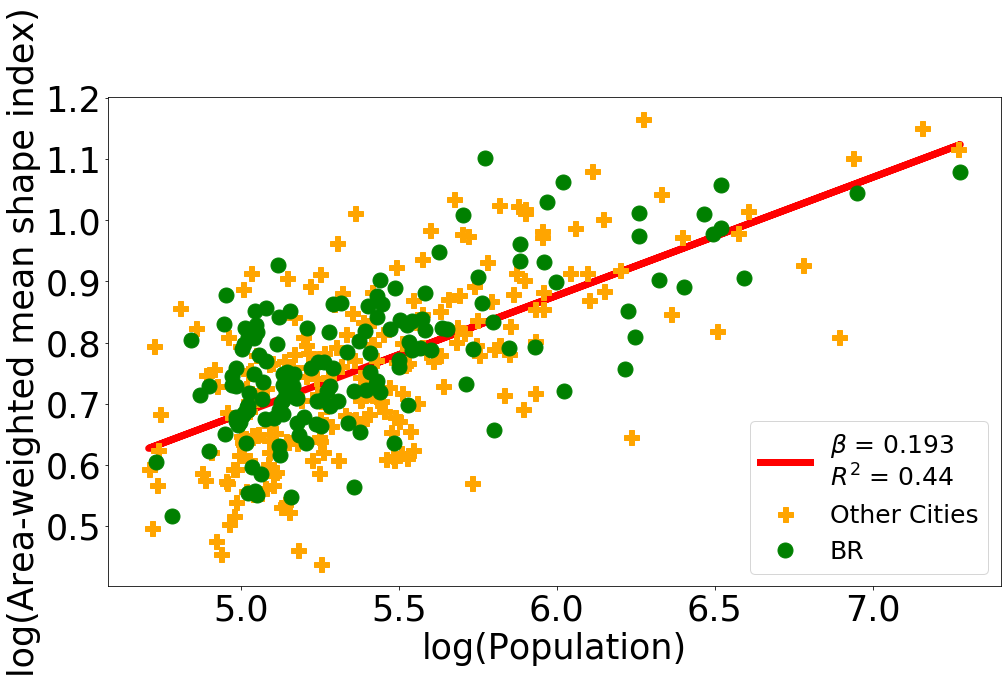

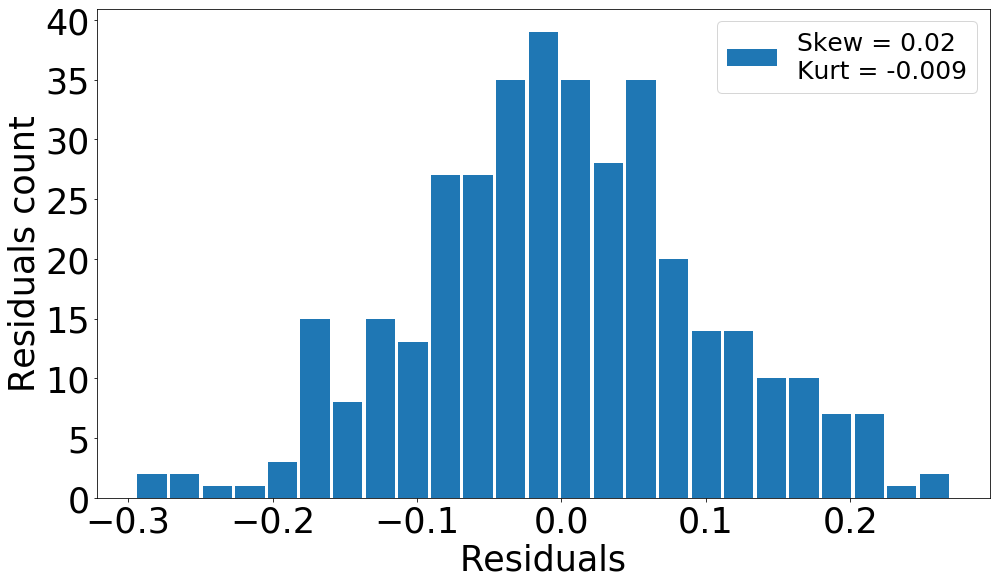

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


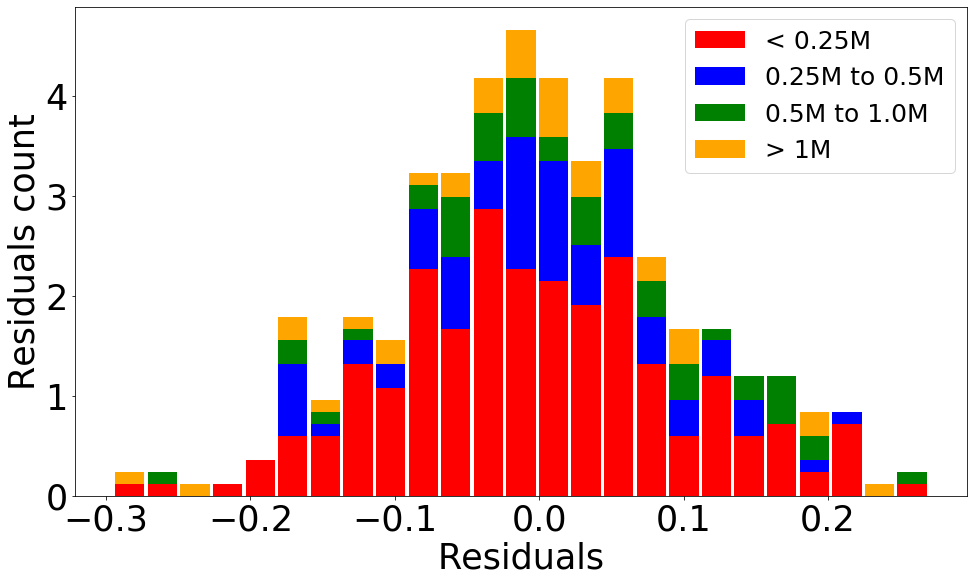

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


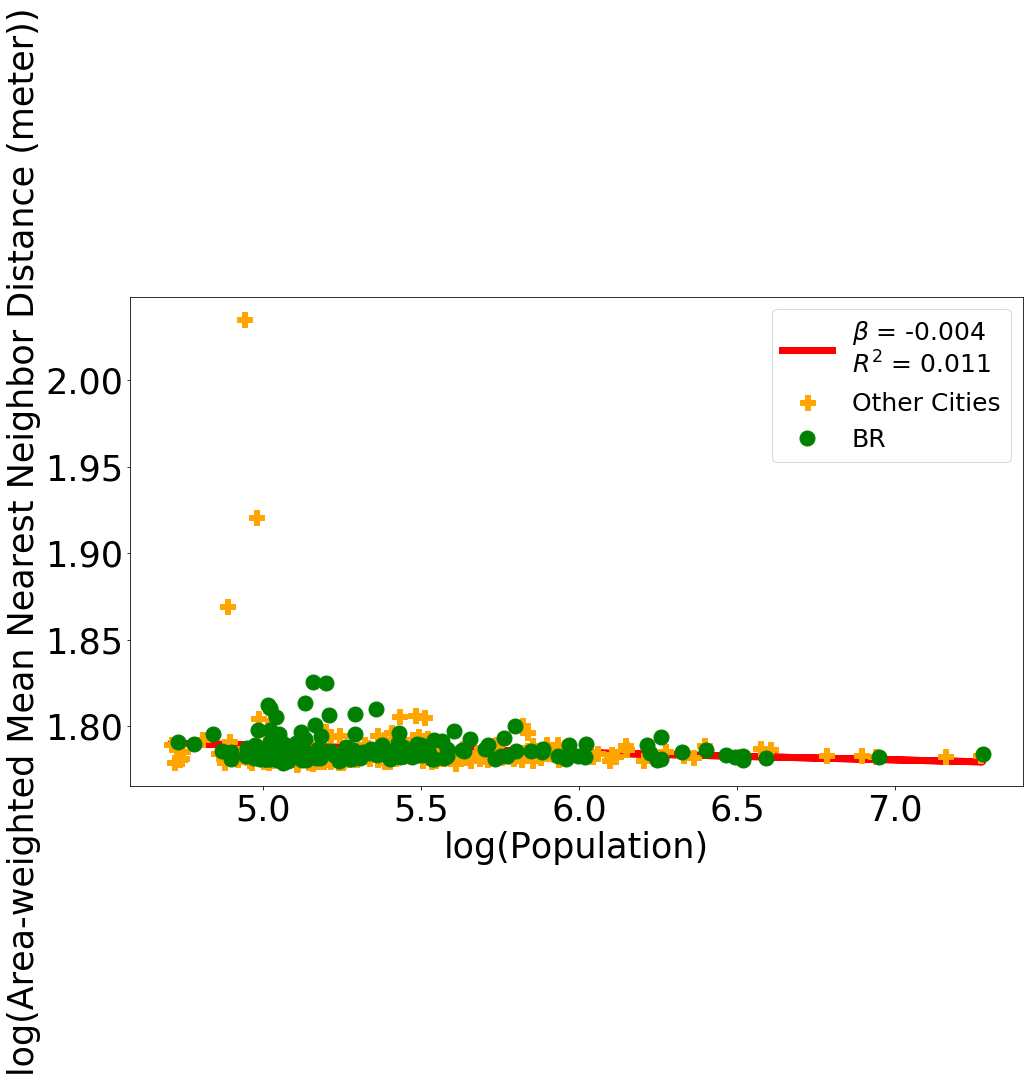

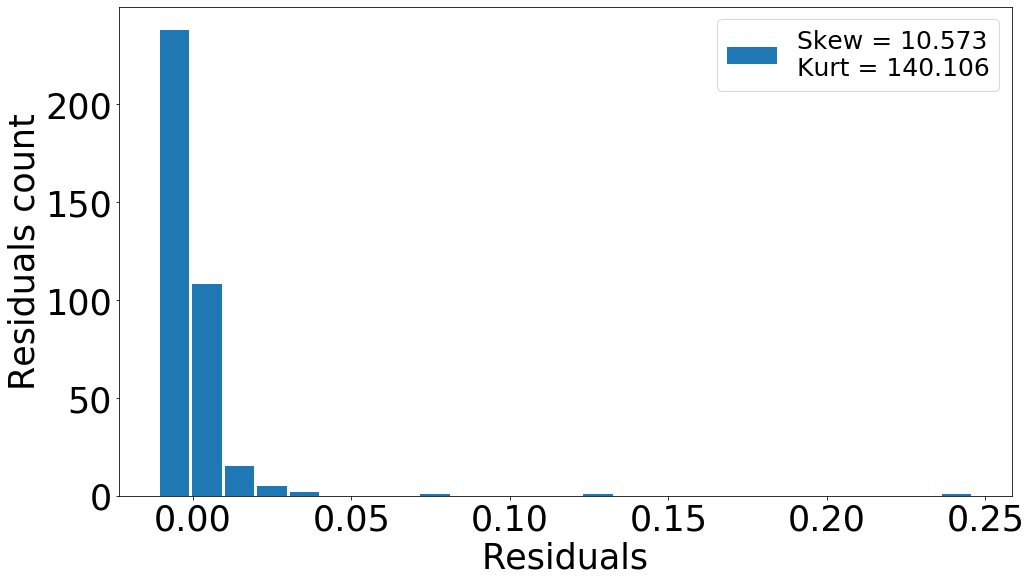

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


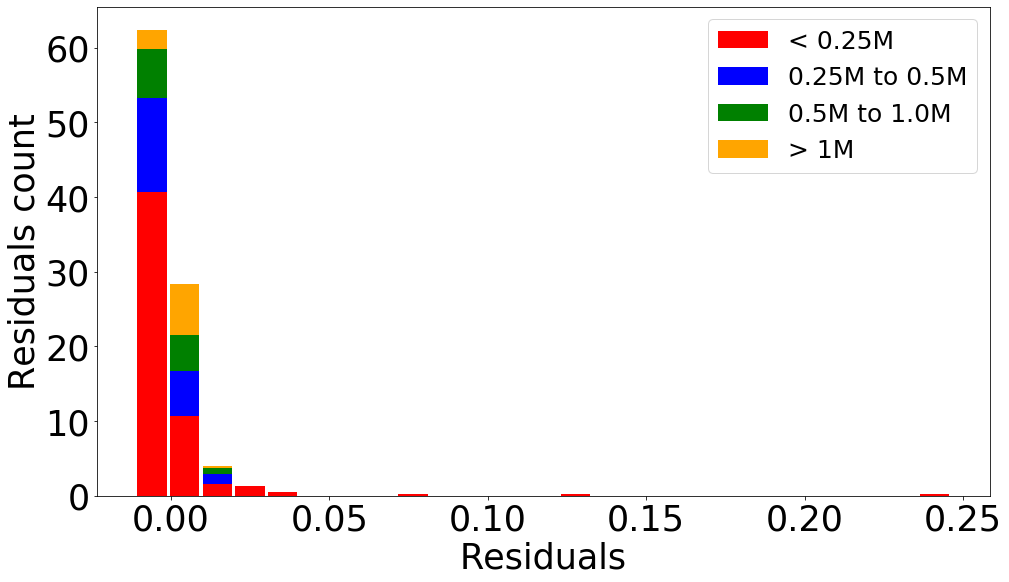

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


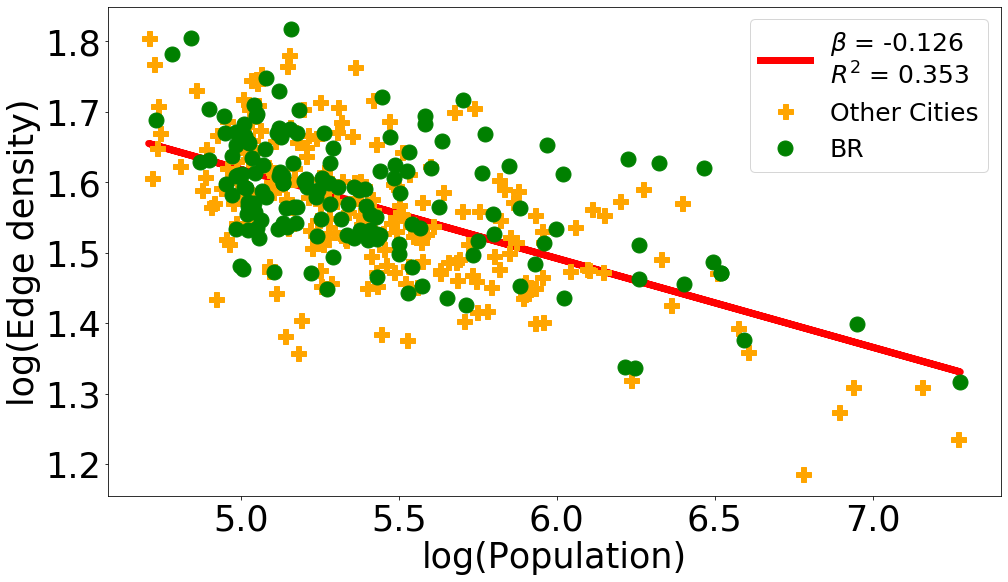

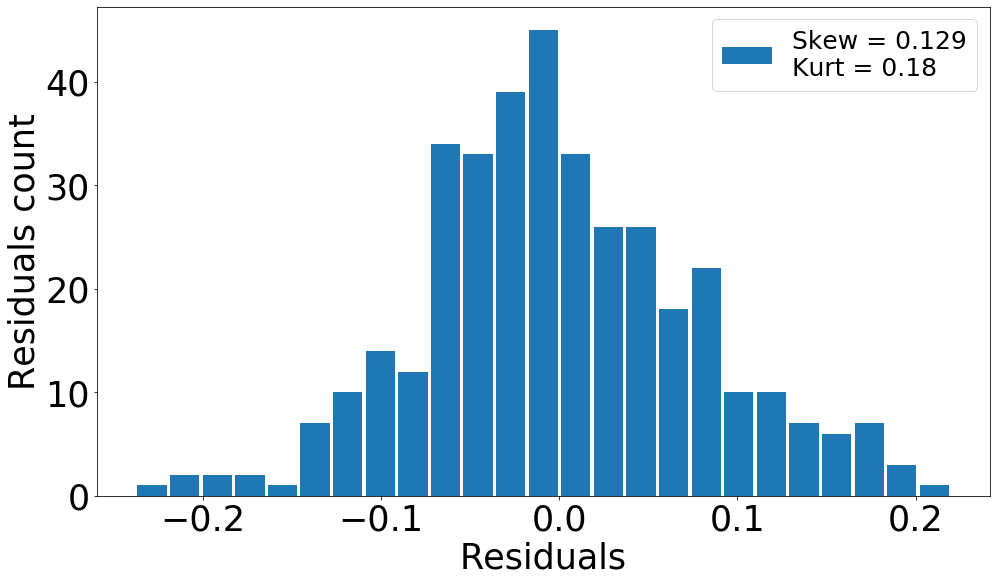

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


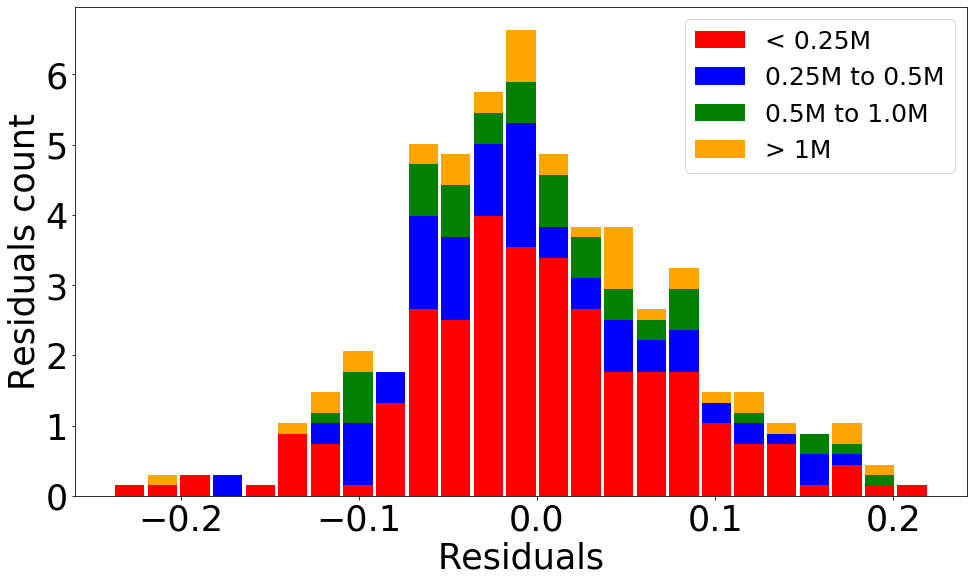

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


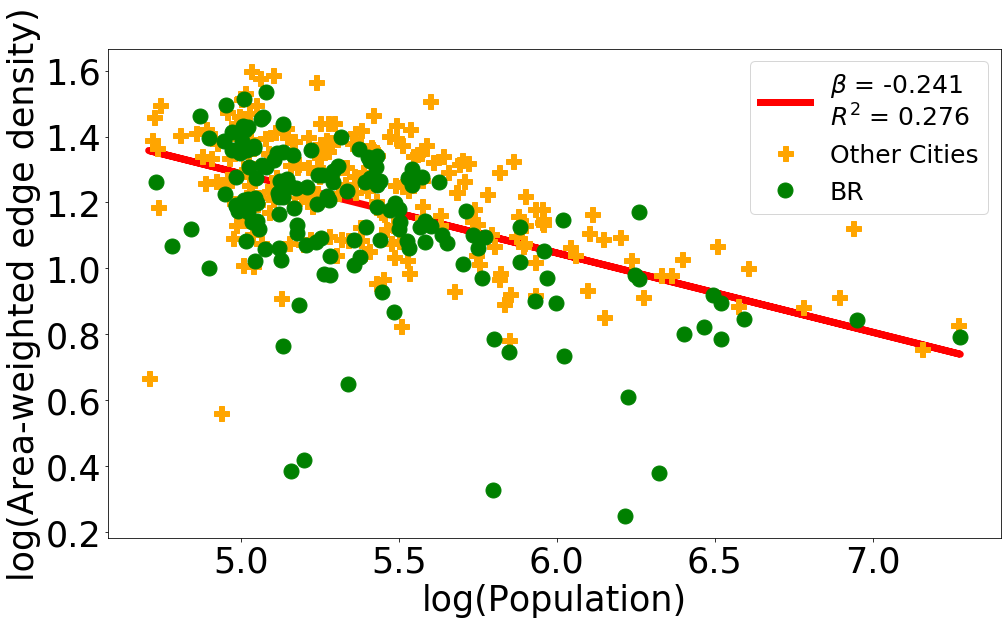

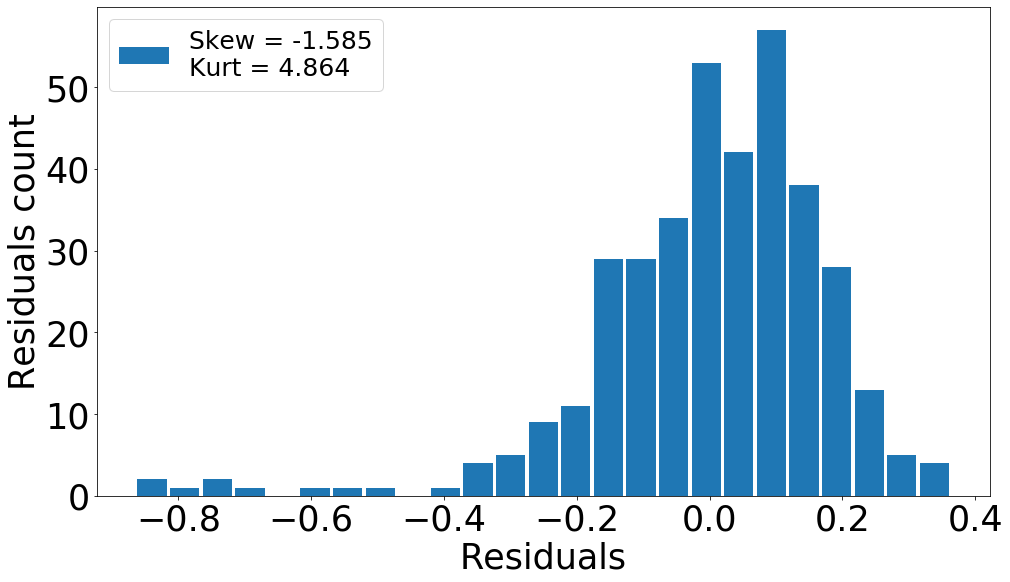

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


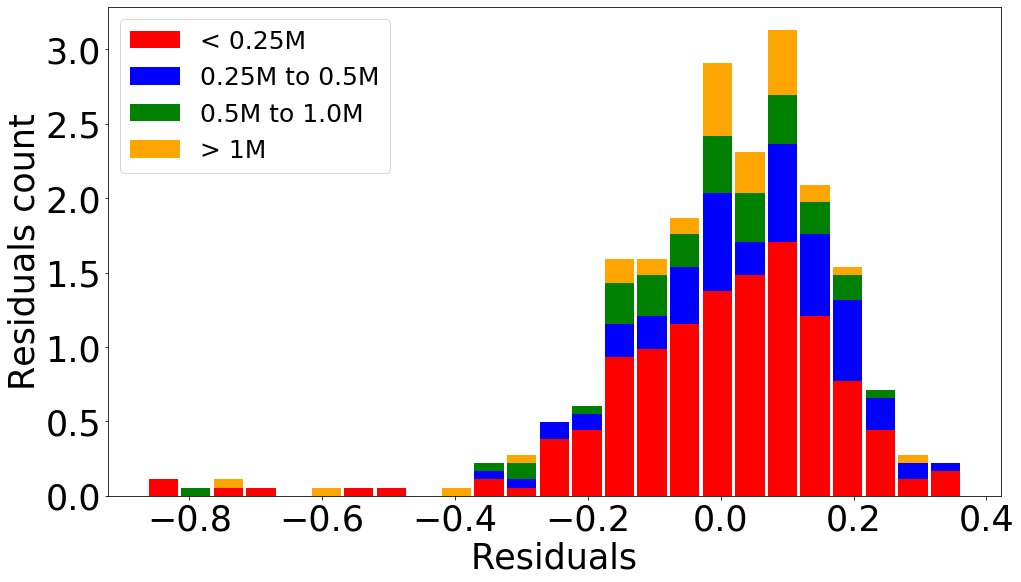

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


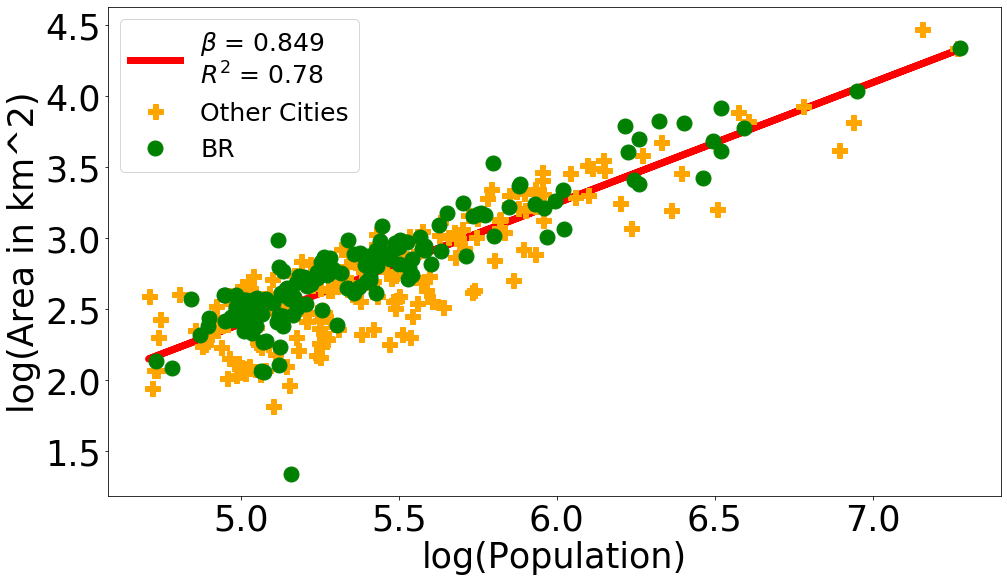

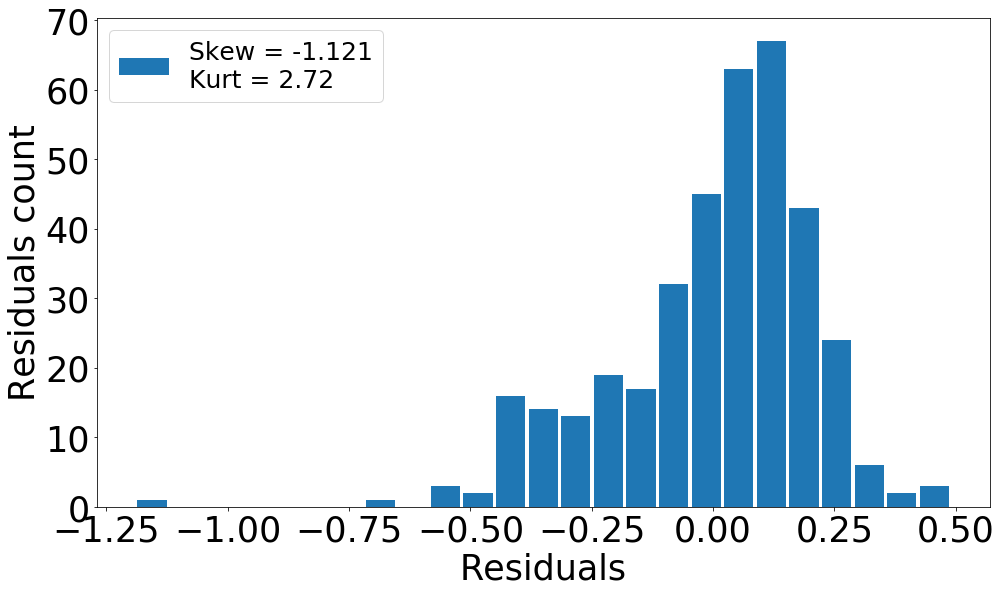

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


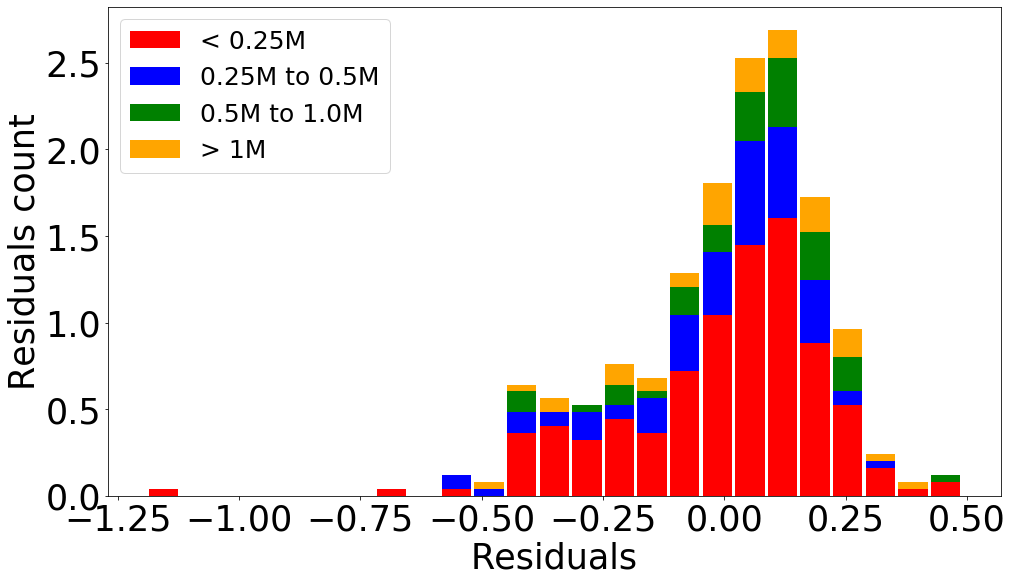

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


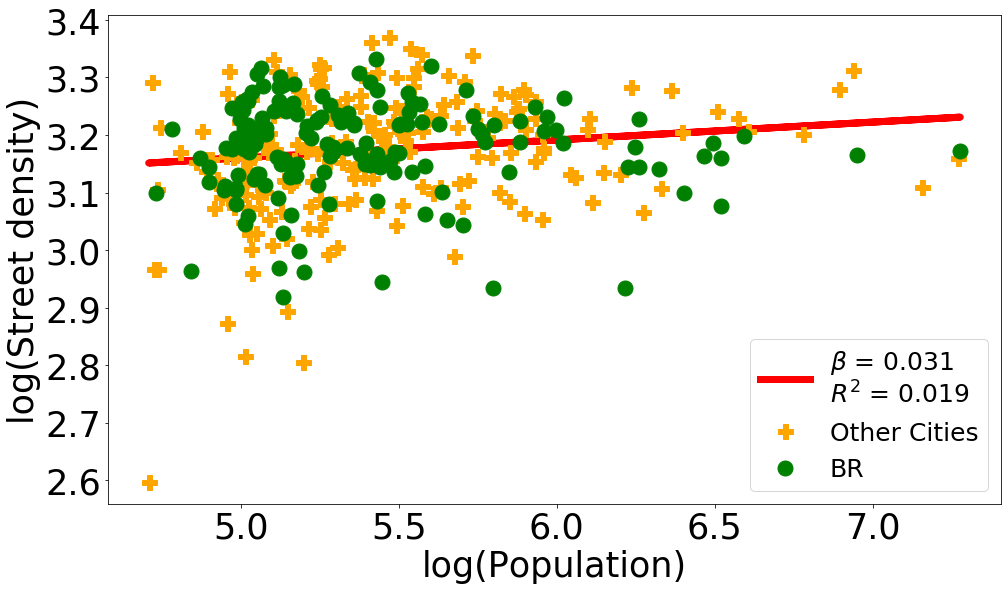

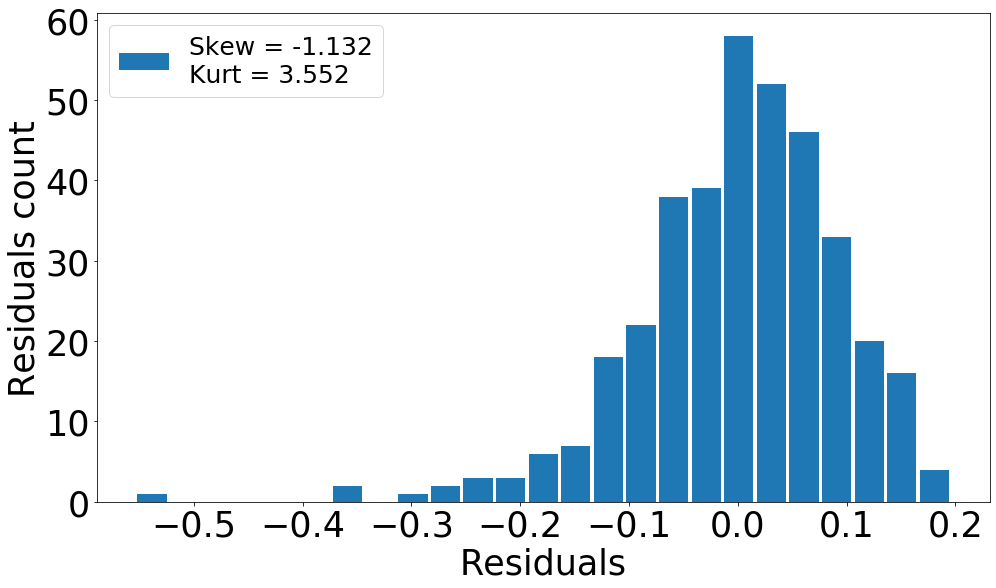

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


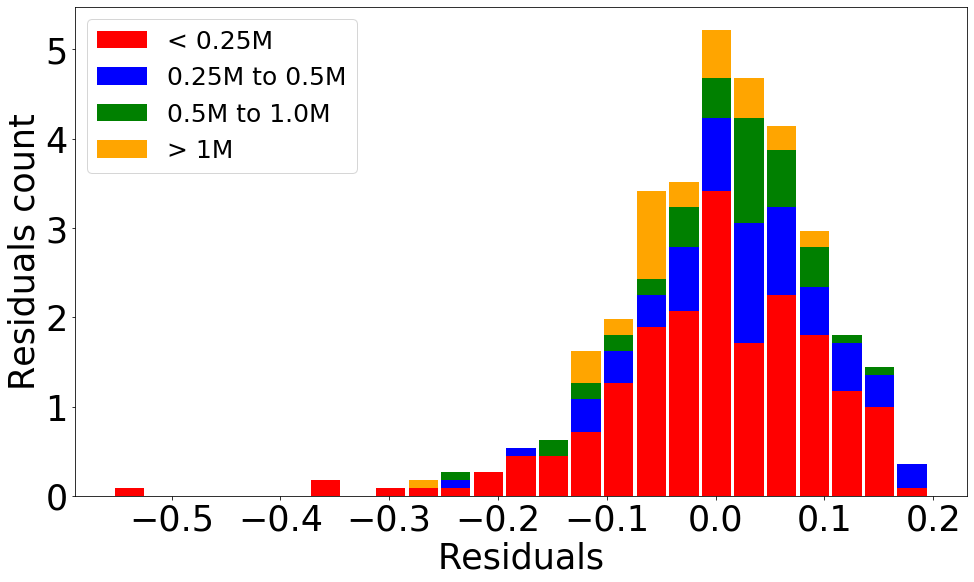

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.ne

193


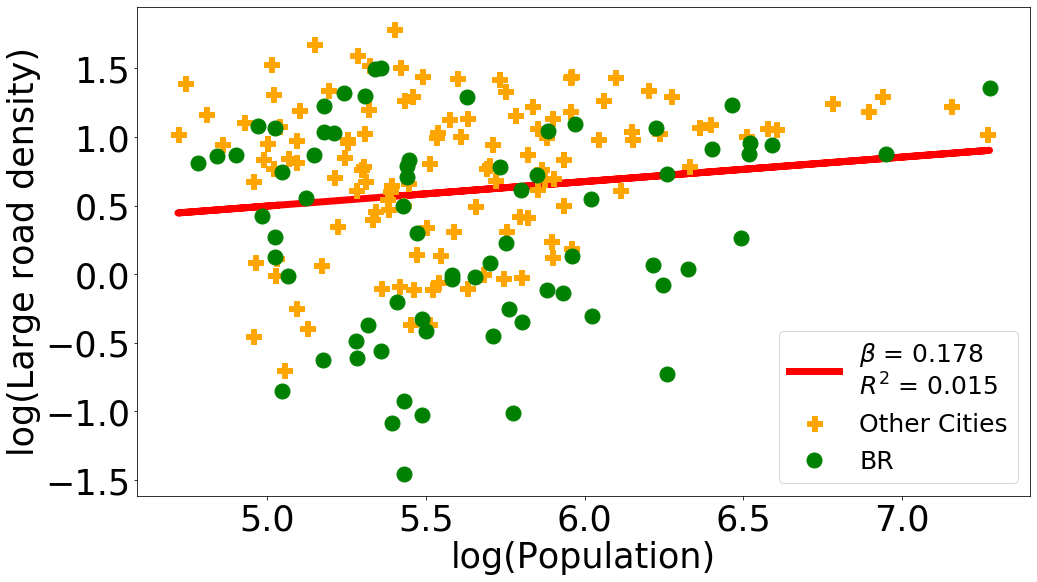

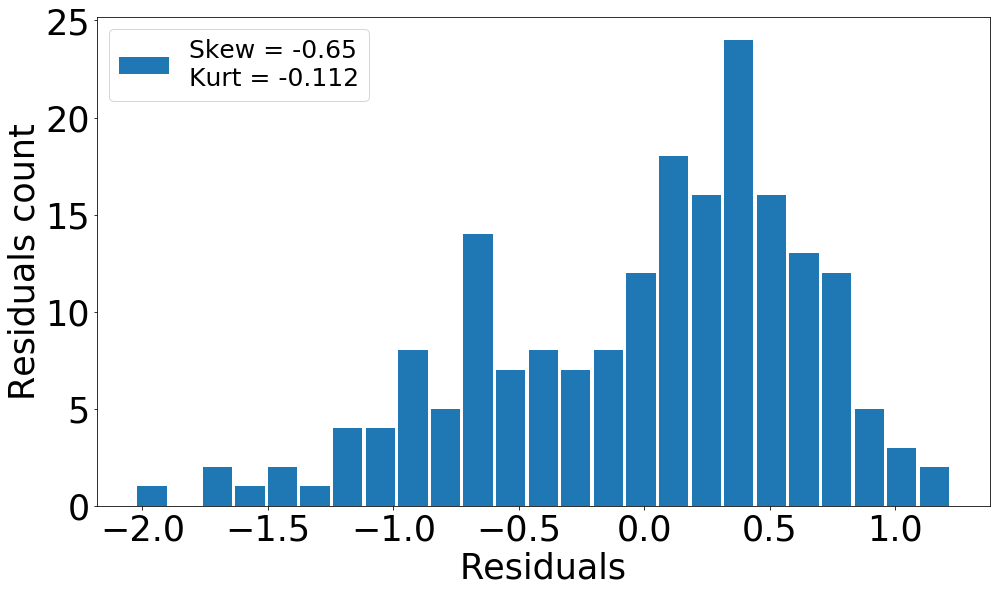

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


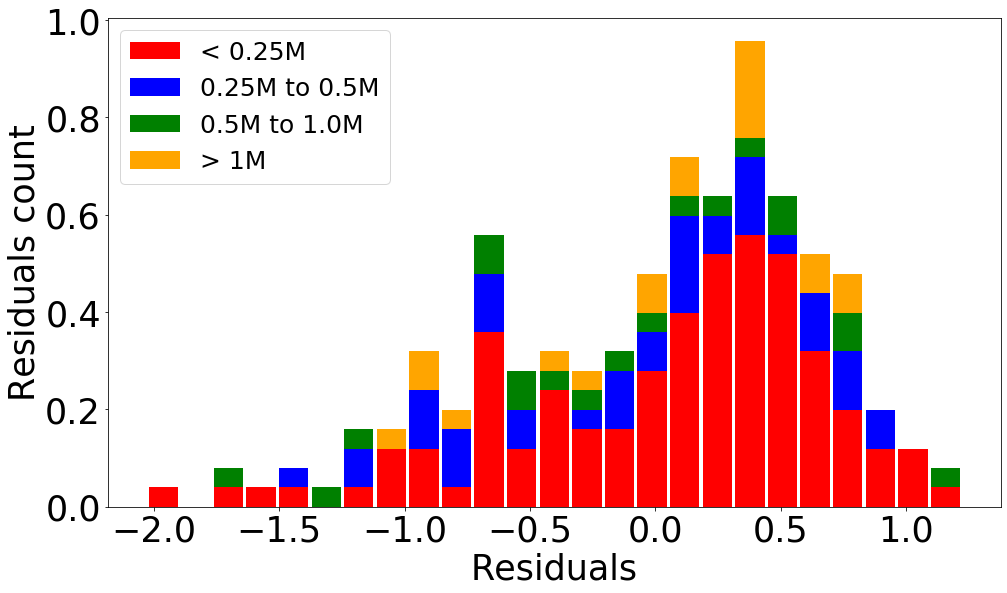

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


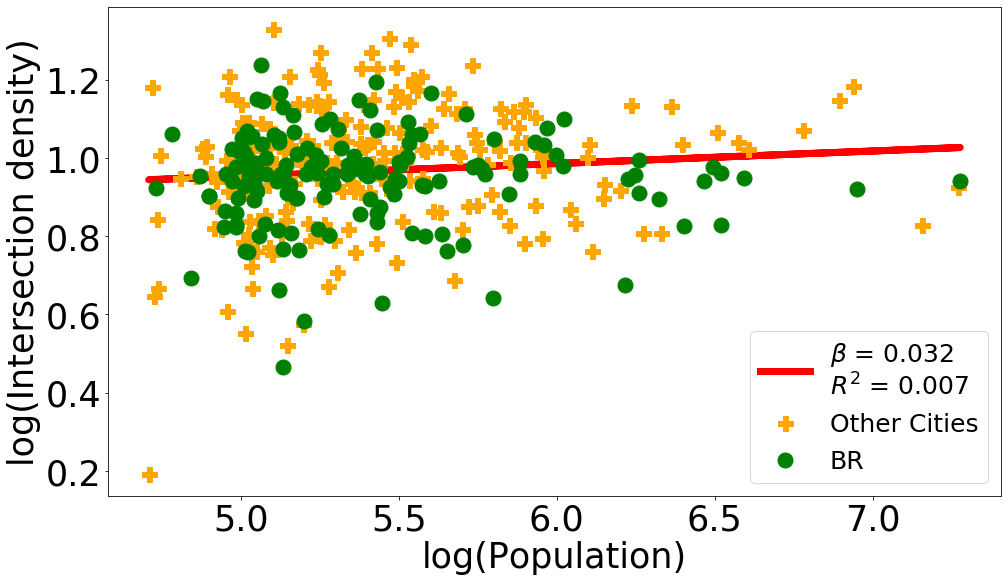

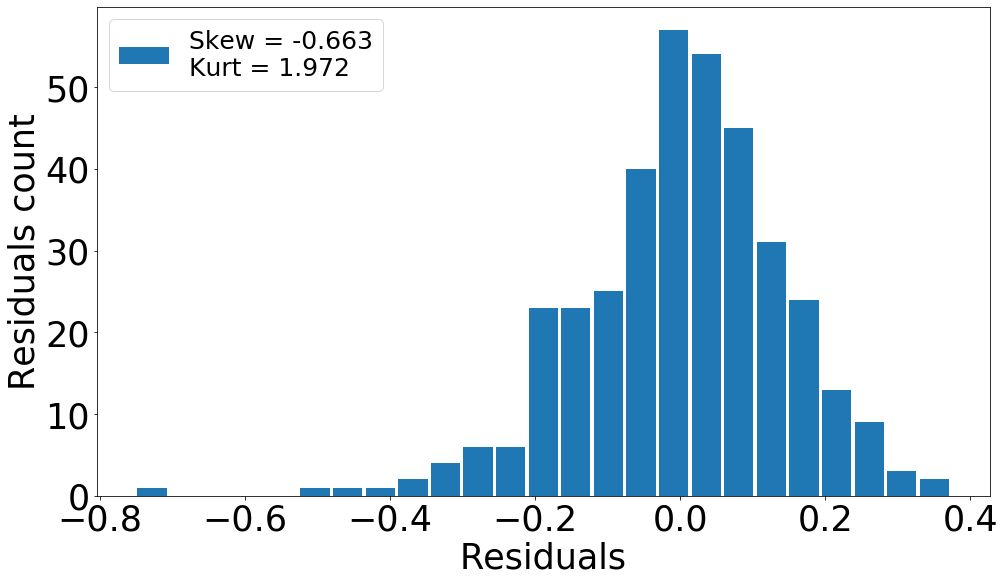

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


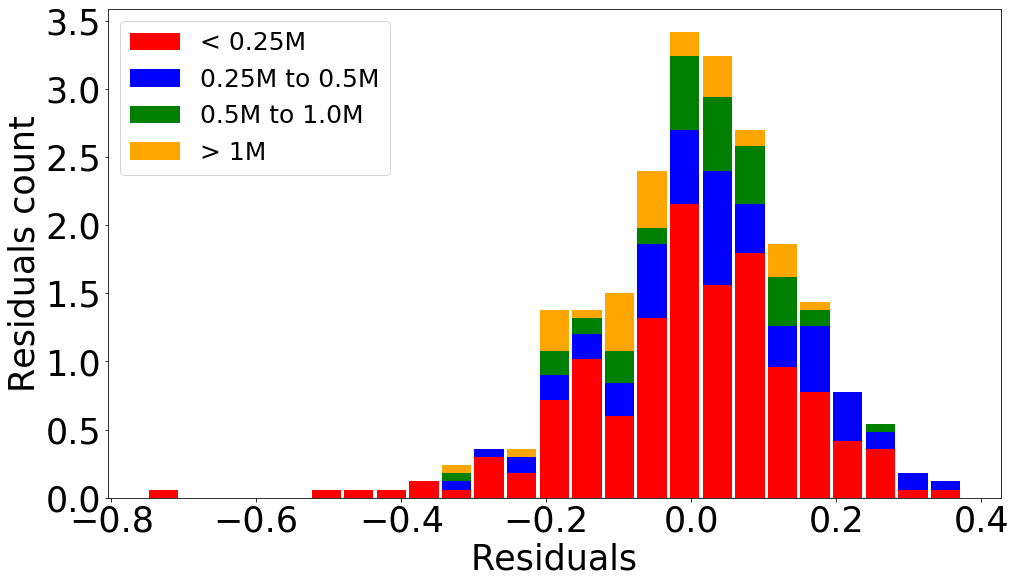

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


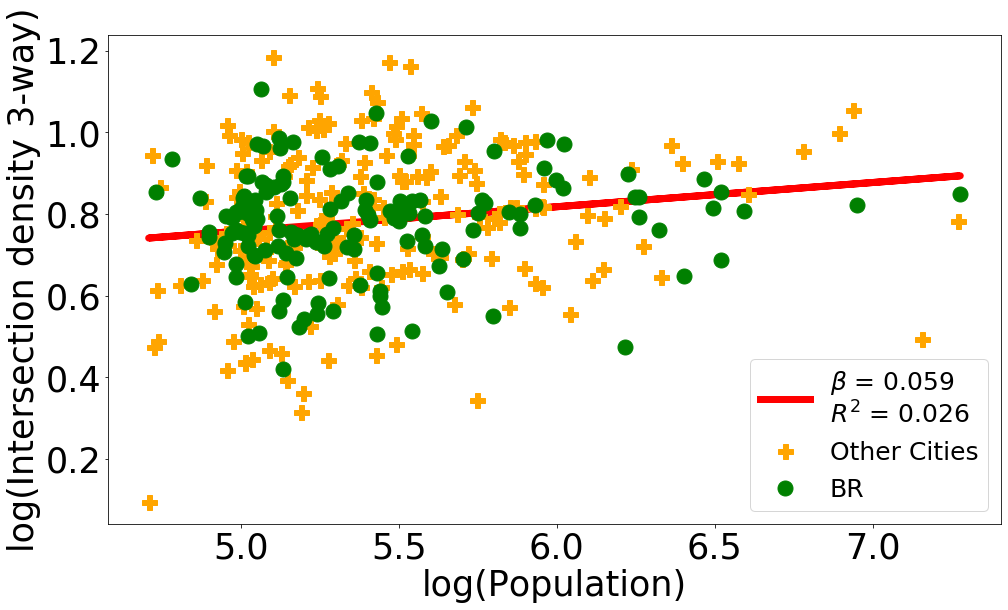

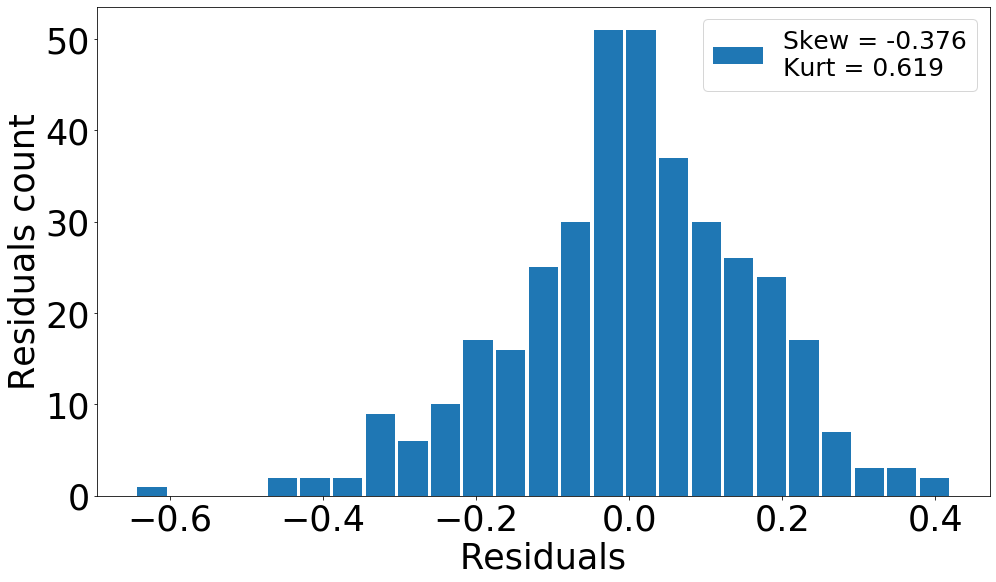

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


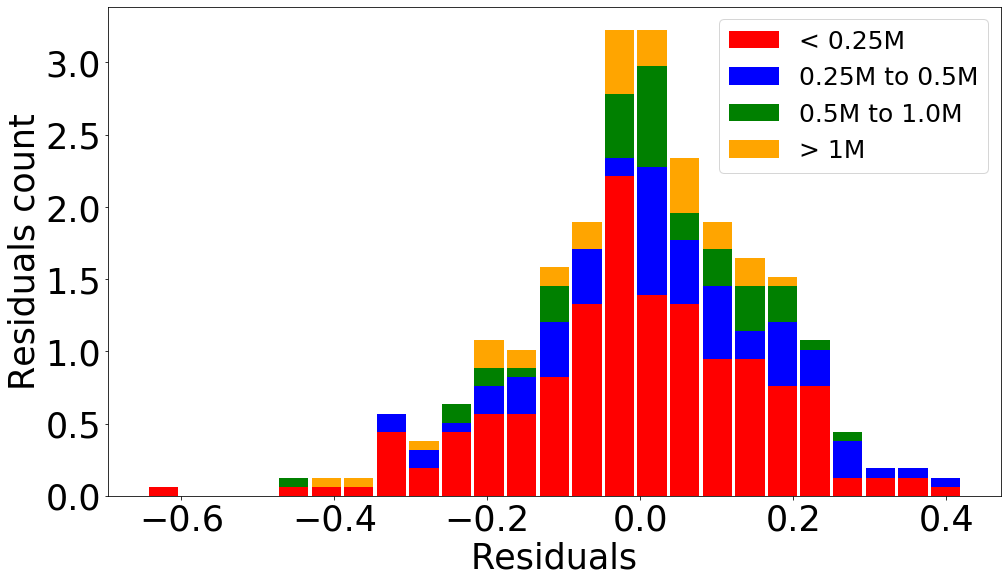

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


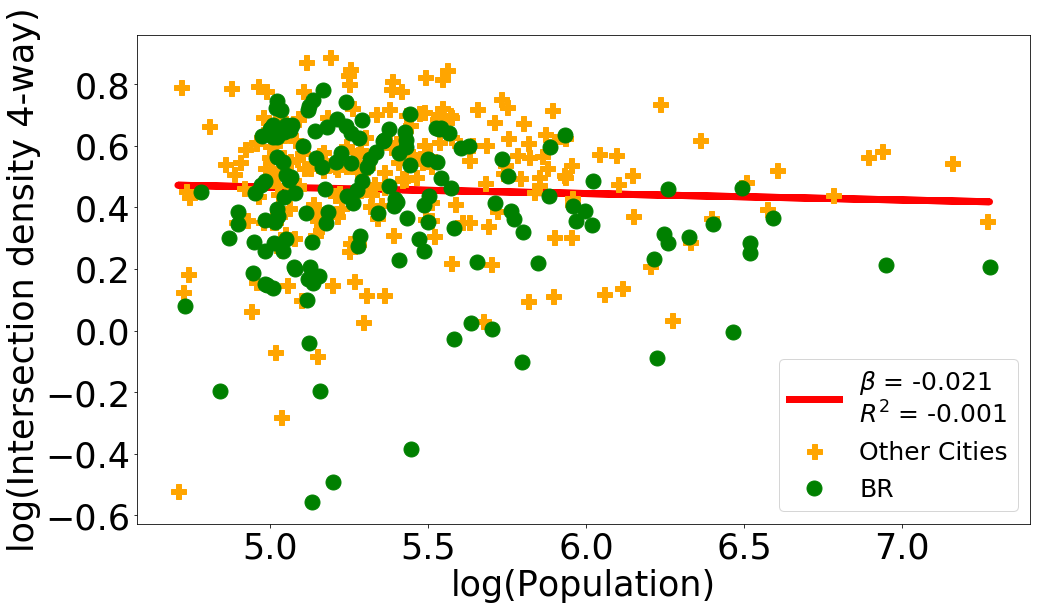

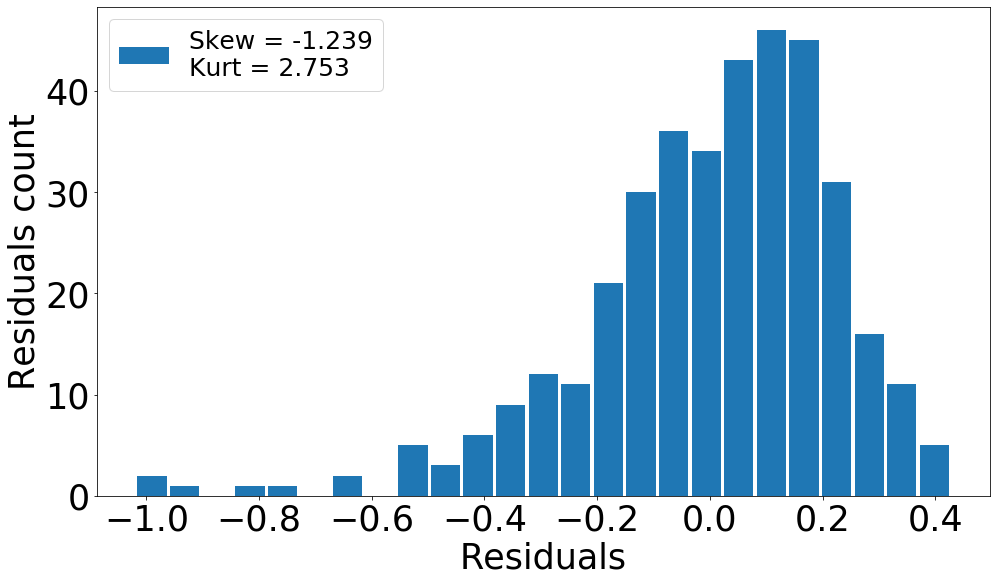

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


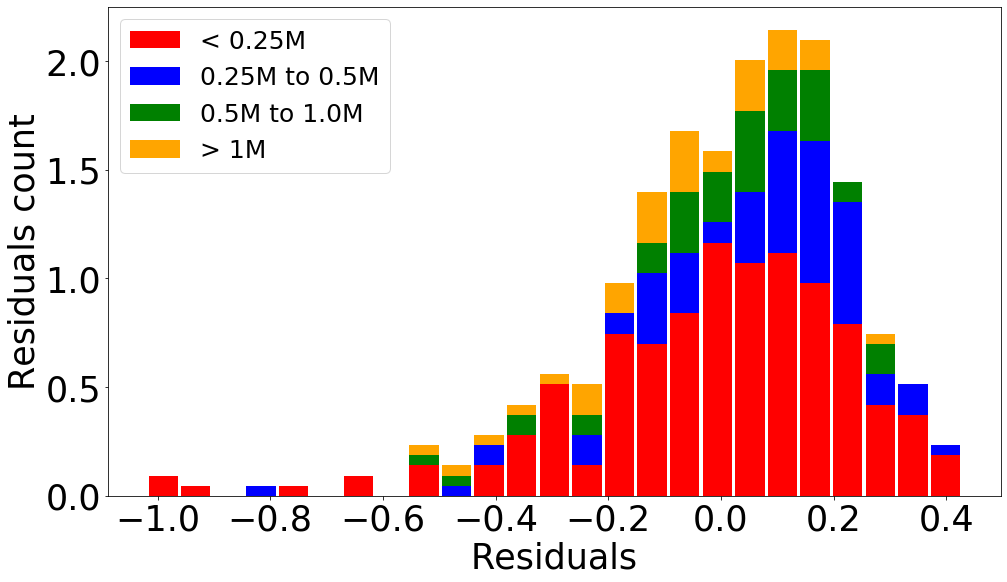

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


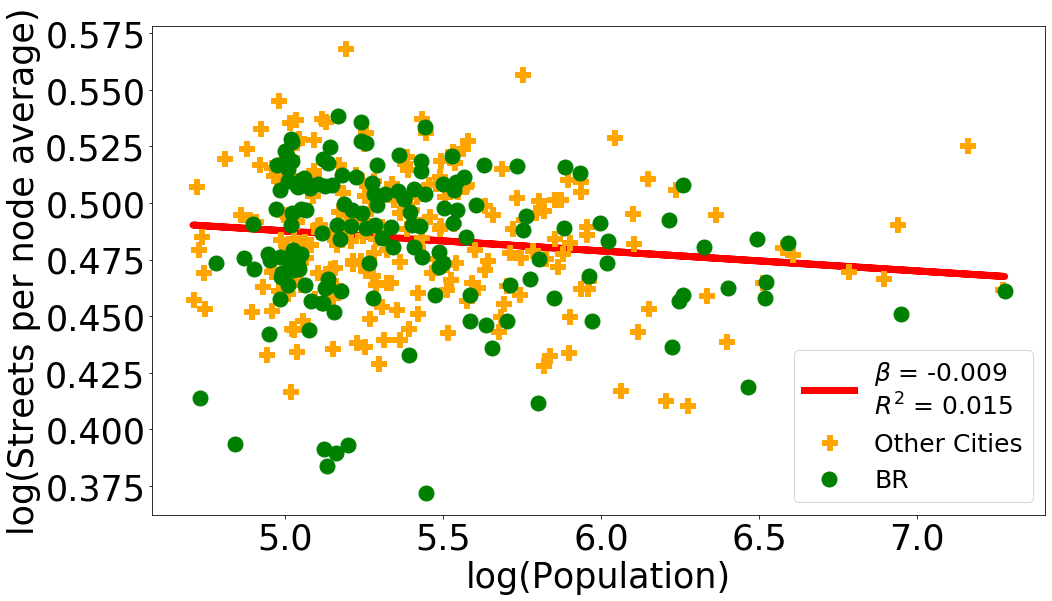

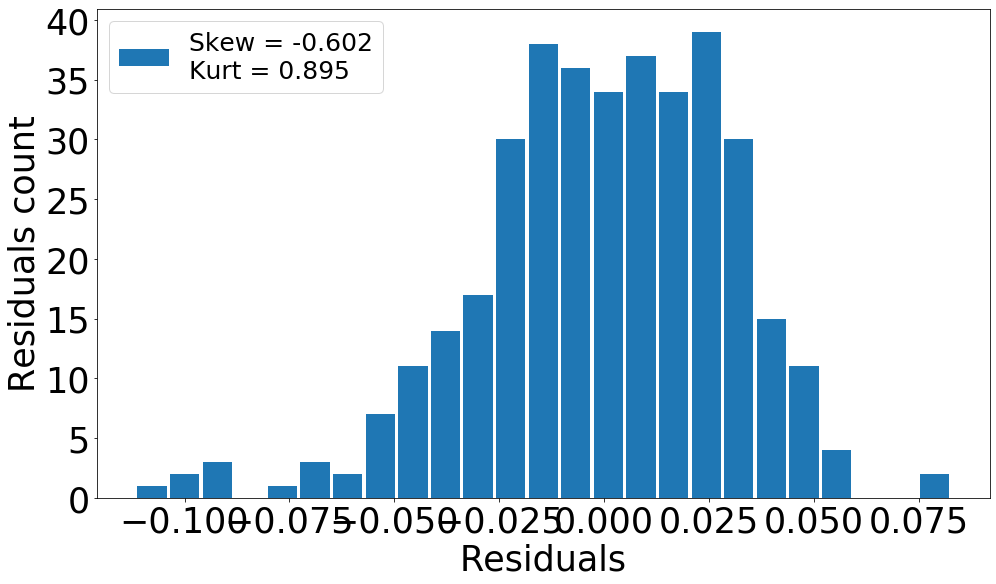

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


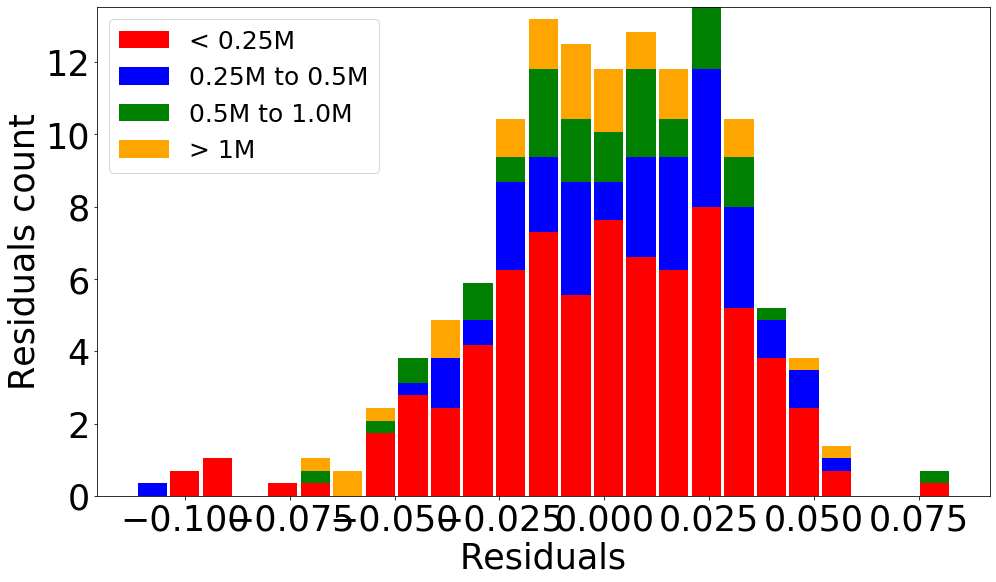

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


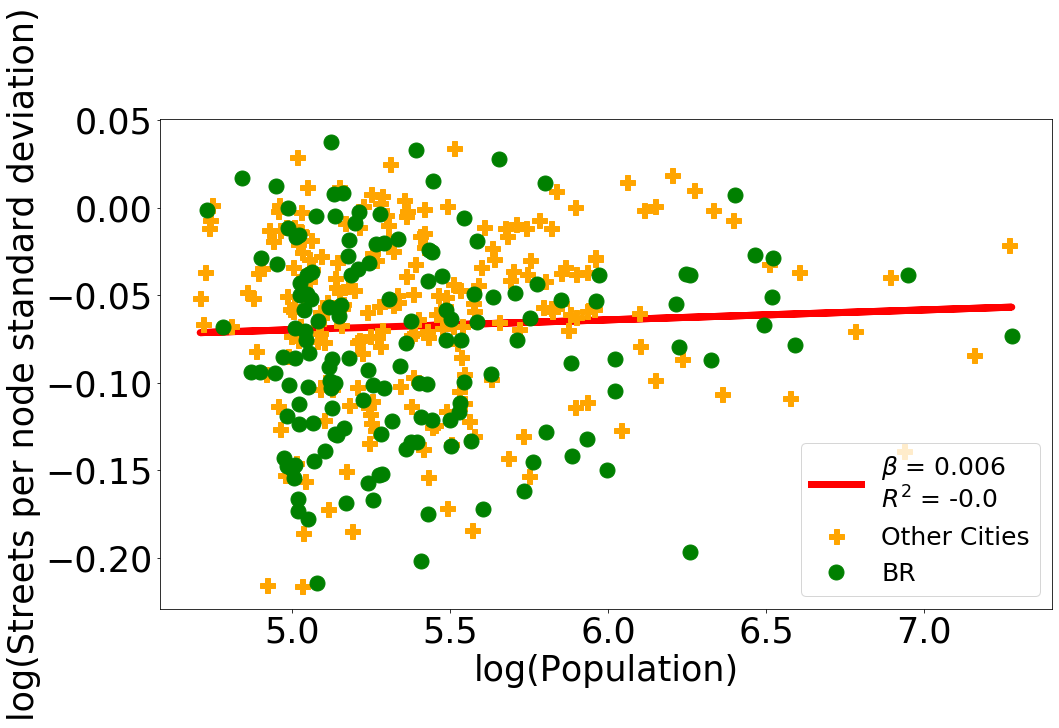

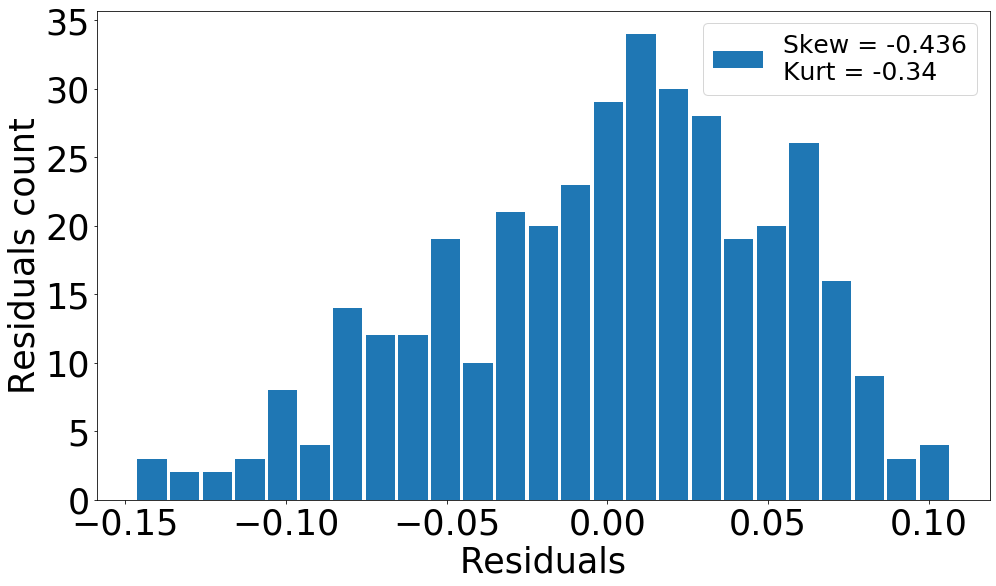

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


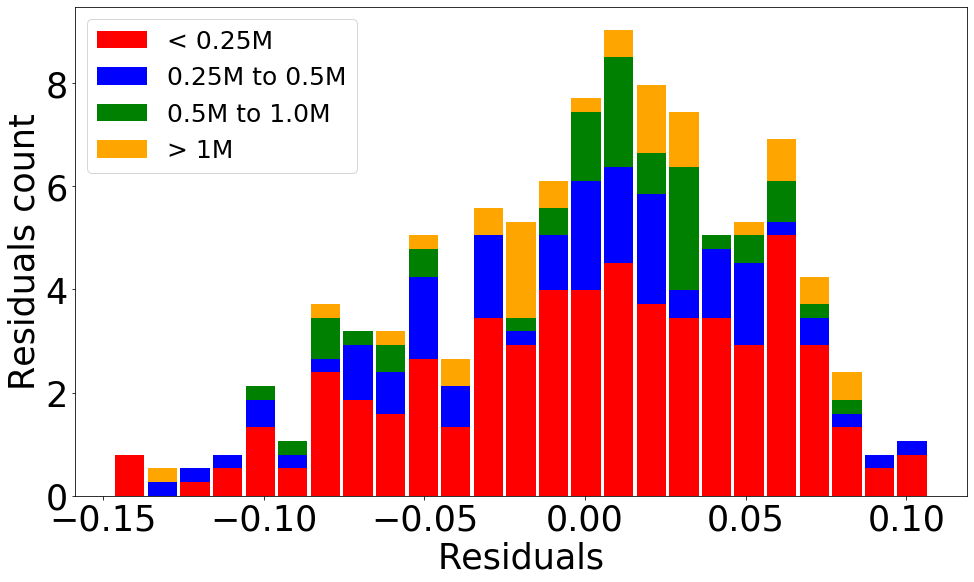

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


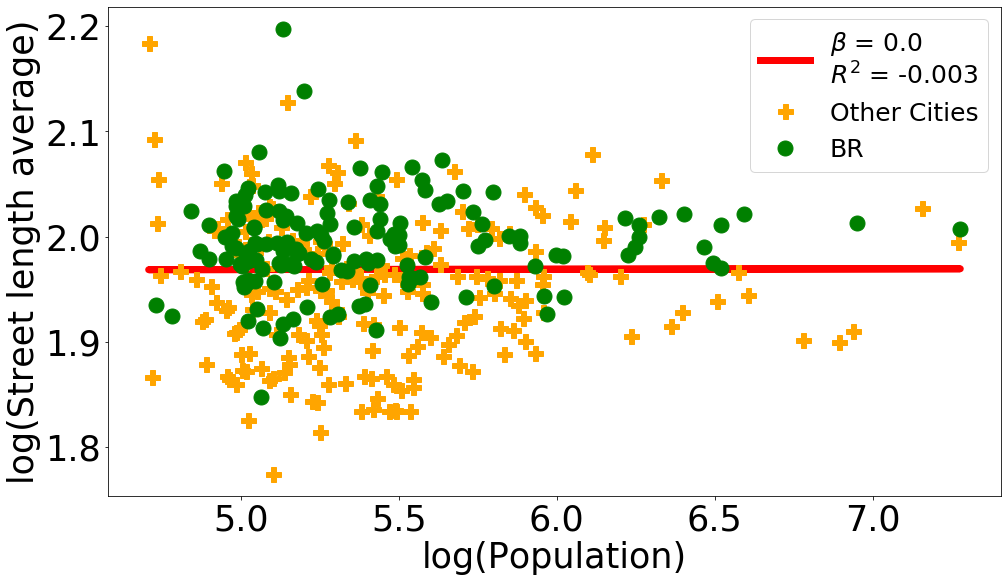

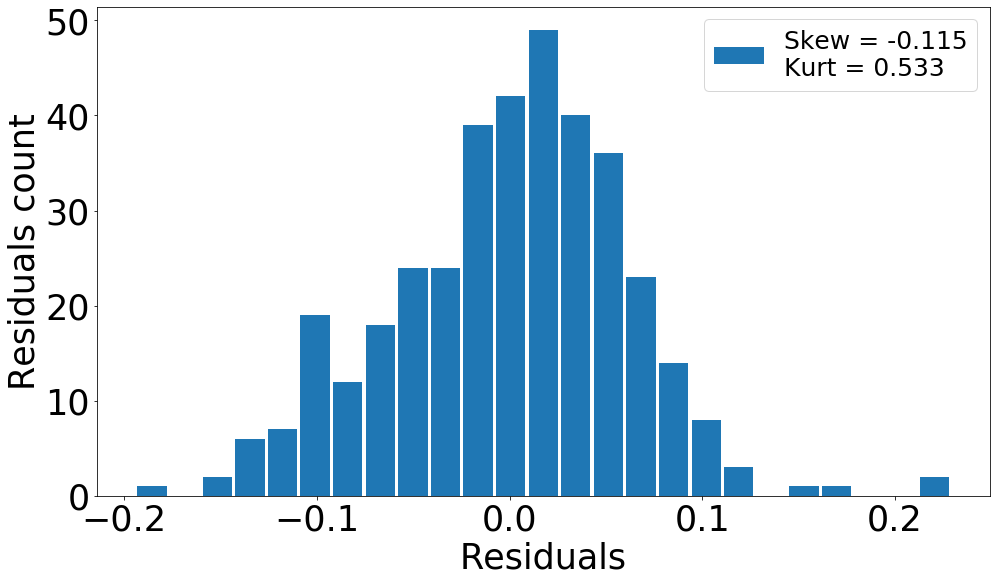

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


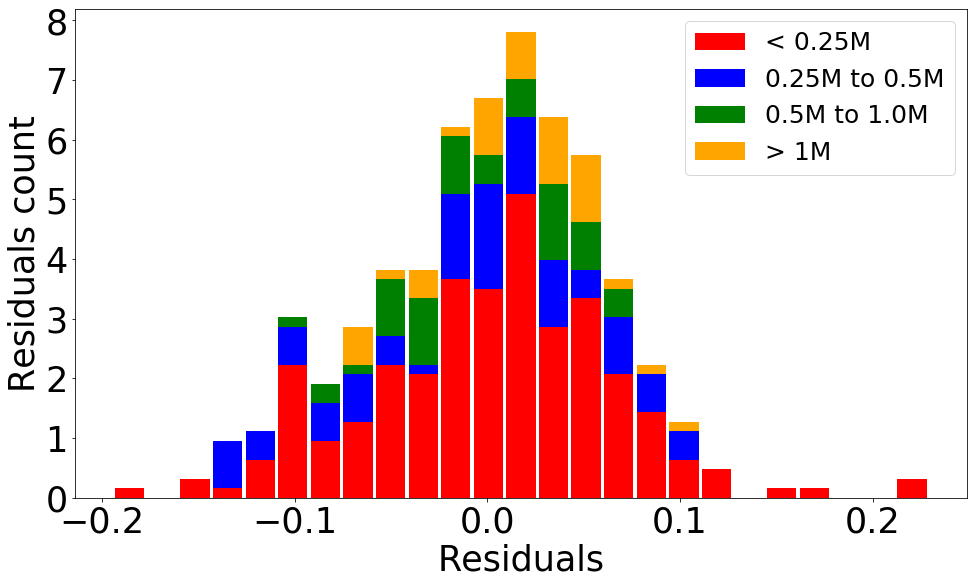

371


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


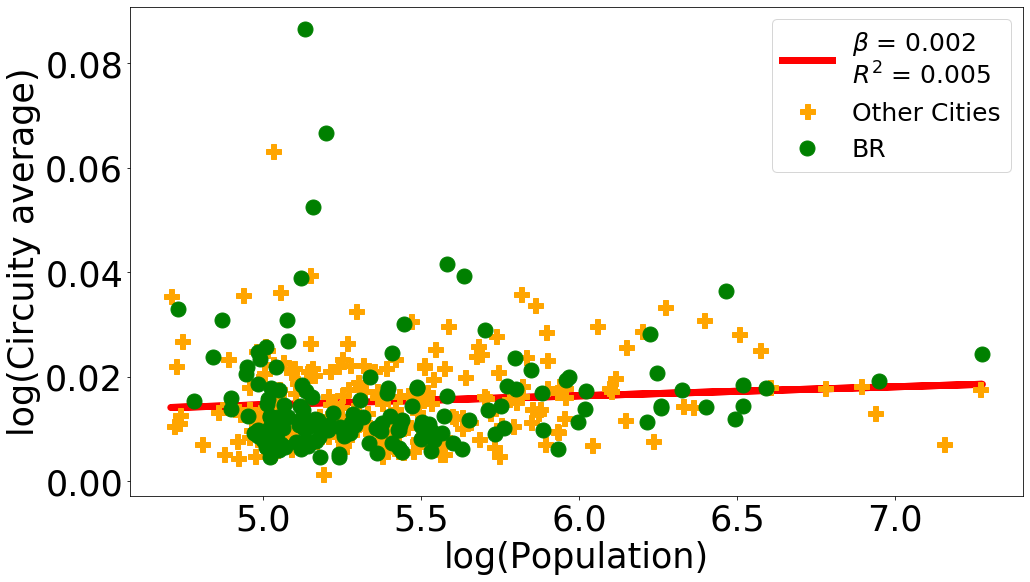

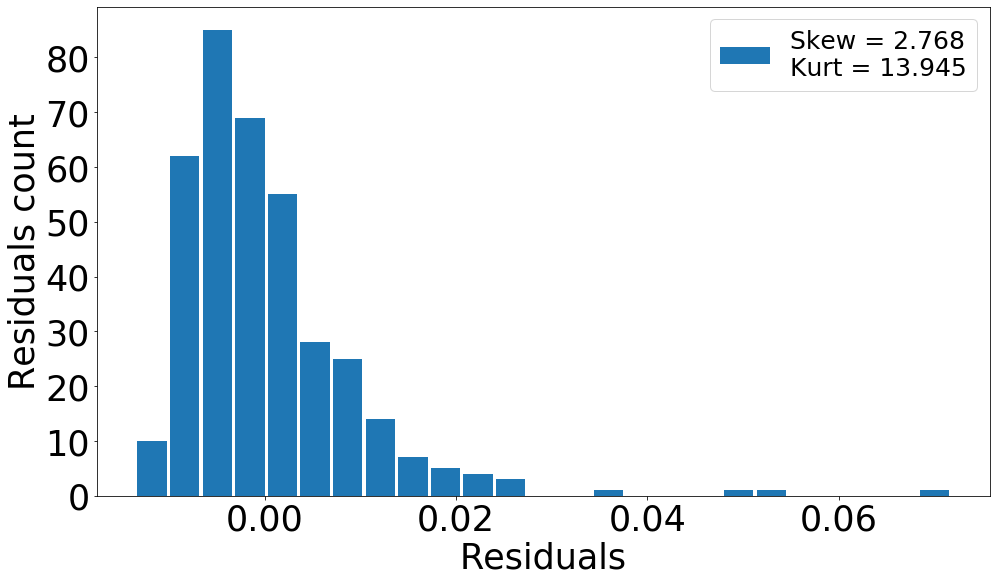

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


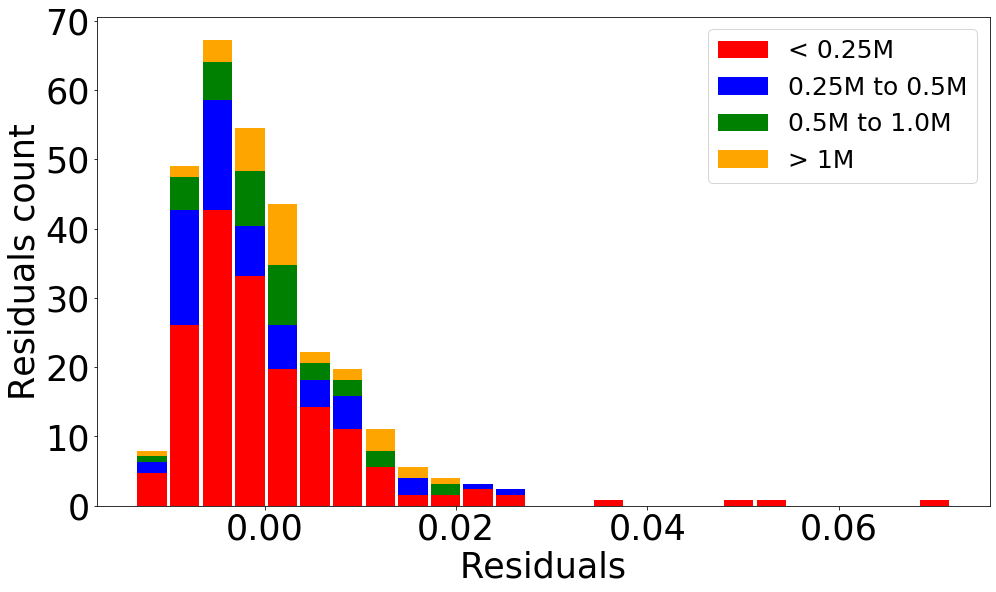

In [30]:
indicator_L1UX = []
alpha_L1UX = []
Y0_L1UX = []
residuos_L1UX = []
IC2 = []

for i in range(0,len(n_L1UX)):   # len(n_L1UX)
    for j in range(len(Codebook.Measure)):
        if (n_L1UX[i] == Codebook.iloc[j,2]):
            df = pd.DataFrame({'x': np.log10(L1UX.BECTPOPL1UX)})
            df["y"] = np.log10(L1UX[n_L1UX[i]])
            df["Category"] = L1UX.ISO2

            df = df.reset_index()
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df[pd.notnull(df['y'])]

            y = df.y
            x = df.x
            
            print(len(x))

            model = LinearRegression()
            x = np.array(x)
            x = x.reshape(-1,1)
            model.fit(x,y)
            predd = model.predict(x)

            indicator_L1UX.append(Codebook.iloc[j,6])
            alpha_L1UX.append(round(model.coef_[0],3))
            Y0_L1UX.append(round(model.intercept_,3))
            residuos_L1UX.append(round(model.score(x, y),3))

            #if (round(popt[1],3) < 1.3) and (round(popt[1],3) > 0.1):
            R2 = 1-(1-model.score(x, y))*((len(df)-1)/(len(df)-2))
            
            X = sm.add_constant(x)
            mod = sm.OLS(y,X)
            res = mod.fit()
            ic = res.conf_int(0.1)
            ic2 = round(ic.iloc[1,0],3), round(ic.iloc[1,1],3)
            IC2.append(ic2)
            
            res = y - predd
            
            plt.figure(figsize=(16, 9))
            plt.plot(x, predd, 'r-', linewidth=7.0, label = r'$\beta$ = {}'.format(round(model.coef_[0],3)) + "\n" + 
                       r'$R^2$ = {}'.format(round(R2,3)))

            df3 = df[df.Category == 'Other Cities']
            groups2 = df3.groupby("Category")
            
            for name, group2 in groups2:
                plt.plot(group2["x"], group2["y"], marker="P", markersize = 15, linestyle="", label=name, 
                         color='orange')
                       
            df2 = df[df.Category == 'BR']       
            groups = df2.groupby("Category")
            
            for name, group in groups:
                plt.plot(group["x"], group["y"], marker="o", markersize = 15, linestyle="", label=name, 
                         color='g')

            #plt.title("L1UX", fontsize=35)
            plt.xlabel('log(Population)', fontsize=35)
            plt.ylabel('log({}'.format(Codebook.iloc[j,6])+')', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            plt.savefig('/Users/aurelianosancho/Desktop/NN/L1UX_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()
            
            ######################################
            
            plt.figure(figsize=(16, 9))
            np.var(res)
            plt.hist(res, bins=25, rwidth=0.9,label = 'Skew = {}'.format(round(skew(res),3)) + "\n" + 
                                           'Kurt = {}'.format(round(kurtosis(res),3)))  
            #plt.title('{}'.format(Codebook.iloc[j,6]), fontsize=35)
            plt.xlabel('Residuals', fontsize=35)
            plt.ylabel('Residuals count', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            plt.savefig('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_Br_vs_TODOS_L1UX/L1UX_Residuals_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()
            
            ######################################
            group1 = []
            group2 = []
            group3 = []
            group4 = []
            
            for l in range(len(res)):
                if (L1UX.iloc[l,15] <= 250000):
                    group1.append(res.iloc[l])
                elif (L1UX.iloc[l,15] > 250000) and (L1UX.iloc[l,15] <= 500000):
                    group2.append(res.iloc[l])
                elif (L1UX.iloc[l,15] > 500000) and (L1UX.iloc[l,15] < 1000000):
                    group3.append(res.iloc[l])
                else:
                    group4.append(res.iloc[l])
            
            plt.figure(figsize=(16, 9))
            bins = 25;
            plt.hist([group1,group2,group3, group4], bins, stacked=True, density=True, rwidth=0.9,
                      color=["red", "blue", "green", "orange"], 
                      label = ["< 0.25M", "0.25M to 0.5M", "0.5M to 1.0M", "> 1M"])

            #plt.title('{}'.format(Codebook.iloc[j,6]), fontsize=35)
            plt.xlabel('Residuals', fontsize=35)
            plt.ylabel('Residuals count', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            plt.savefig('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_Br_vs_TODOS_L1UX/L1UX_GROUPS_Residuals_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()

In [31]:
data_L1UX = pd.DataFrame({'Y': indicator_L1UX, r'$\beta_{L1UX}$': alpha_L1UX, r'$95\%$ $CI_{L1UX}$': IC2,
                          r'$R^{2}_{L1UX}$': residuos_L1UX})
data_L1UX.to_csv('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_L1UX.csv')

# L2

In [34]:
#L2.dtypes

In [35]:
L2.isnull().sum().sort_values(ascending=False);
L2 = L2.fillna(L2.mean());

In [36]:
n_L2 = ['BECTUAREAL2', 'BECPCTURBANL2', 'BECNURBPTCHL2', 'BECPTCHDENSL2','BECAVGPTCHAREAL2', 'BECAWAVGPTCHAREAL2',
         'BECEFFMESHSIZEL2', 'BECCVPTCHAREAL2', 'BECAWMNSHPINDXL2', 'BECAWMNNNGHL2', 'BECEDGDENSL2',
         'BECAWEDGDENSL2', 'BECADAREAL2', 'BECADSTTDENSL2', 'BECADLRDENSL2', 'BECADINTDENSL2', 'BECADINTDENS3L2',
         'BECADINTDENS4L2', 'BECADSTTPNODEAVGL2', 'BECADSTTPNODESDL2', 'BECADSTTLGAVGL2', 'BECADCRCTYAVGL2']
#x = np.log(L2.BECTPOPL2)

In [37]:
for i in range(len(L2)):
    if (L2.iloc[i,0] != 'BR'):
        L2.iloc[i,0] = 'Other Cities'

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


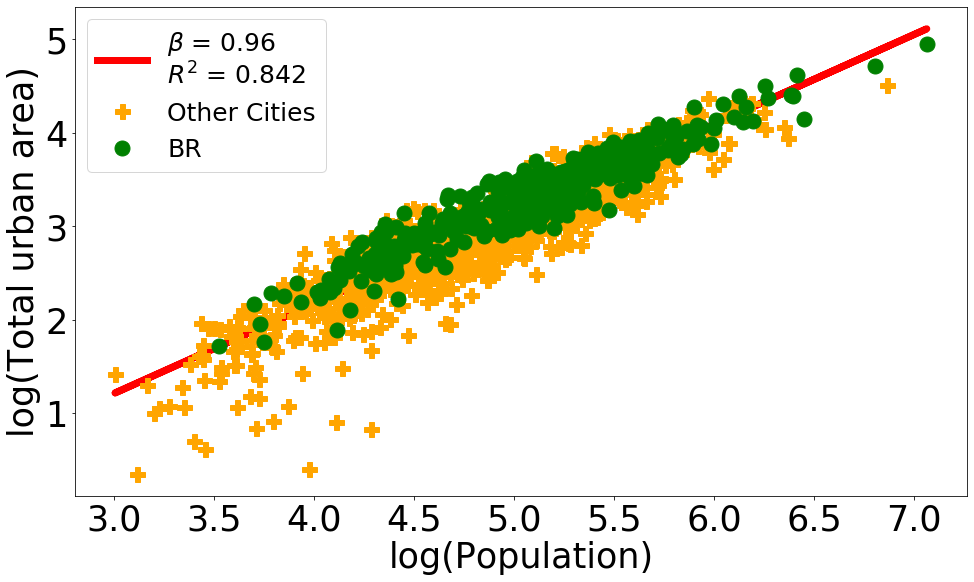

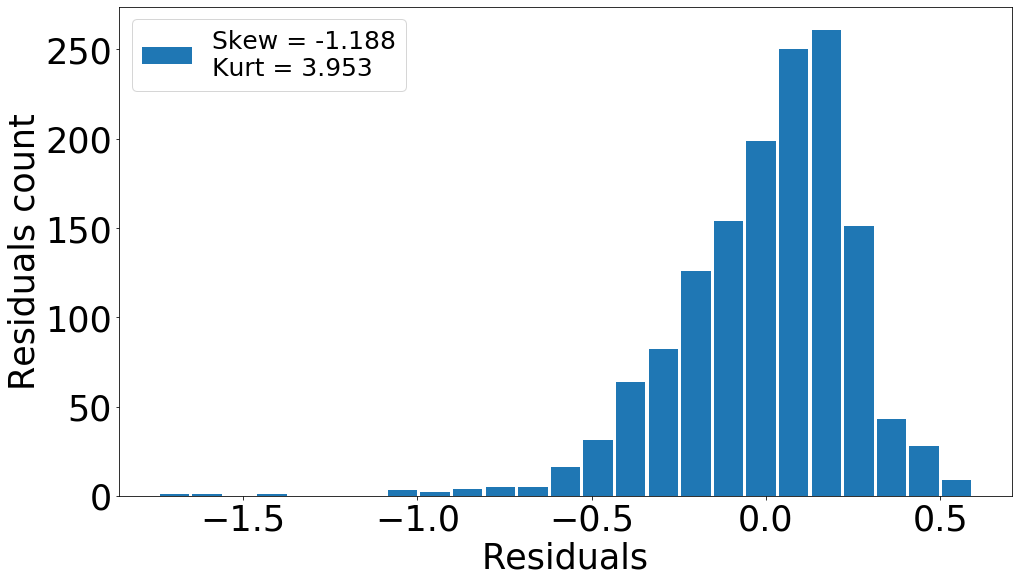

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


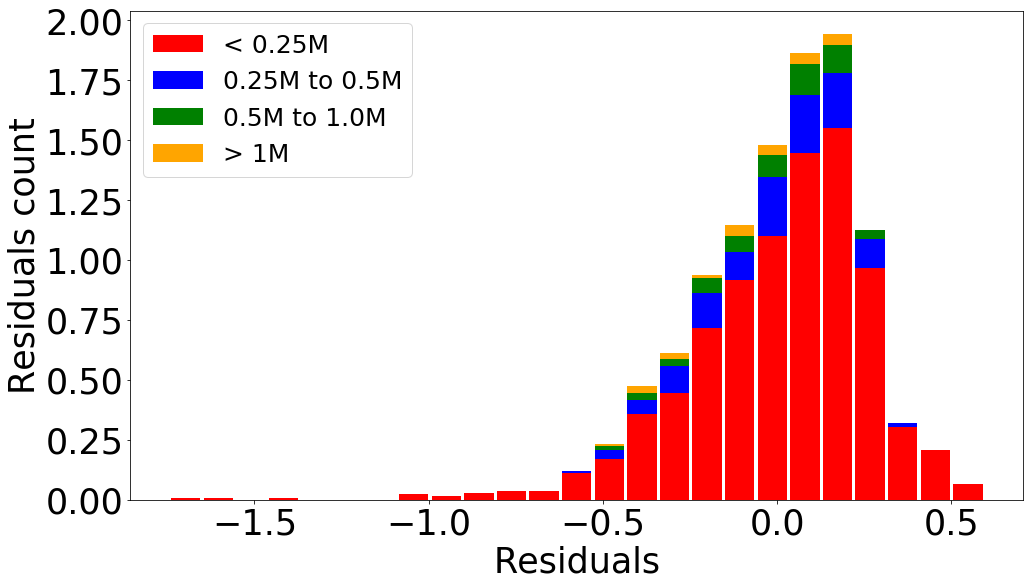

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


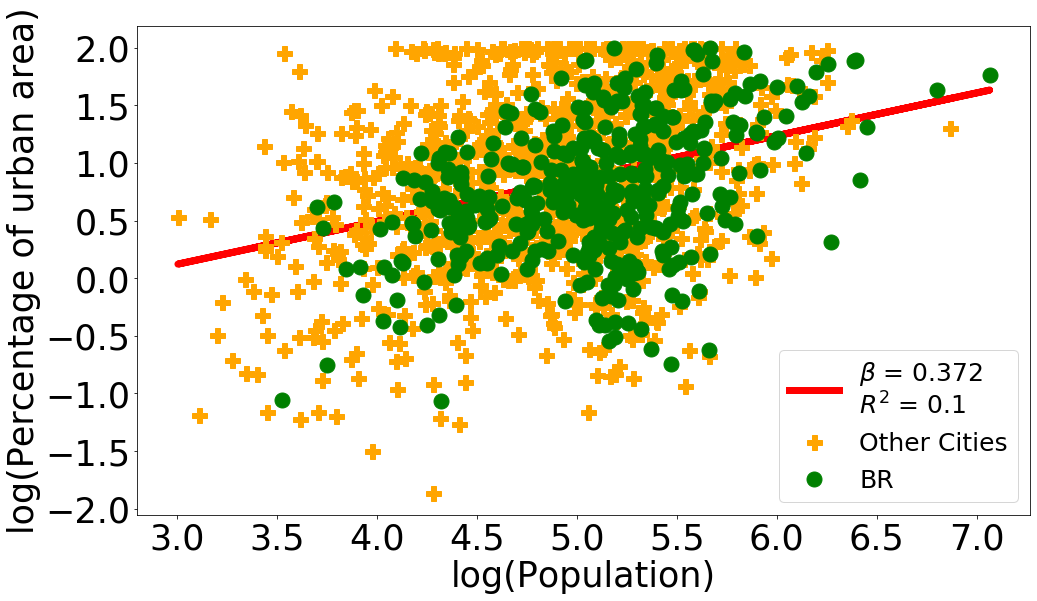

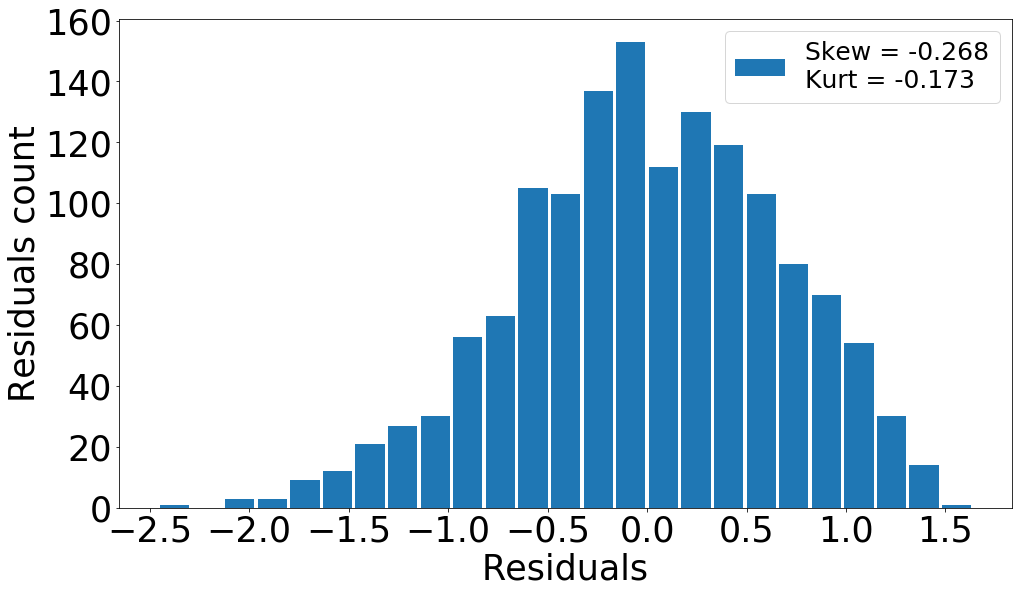

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


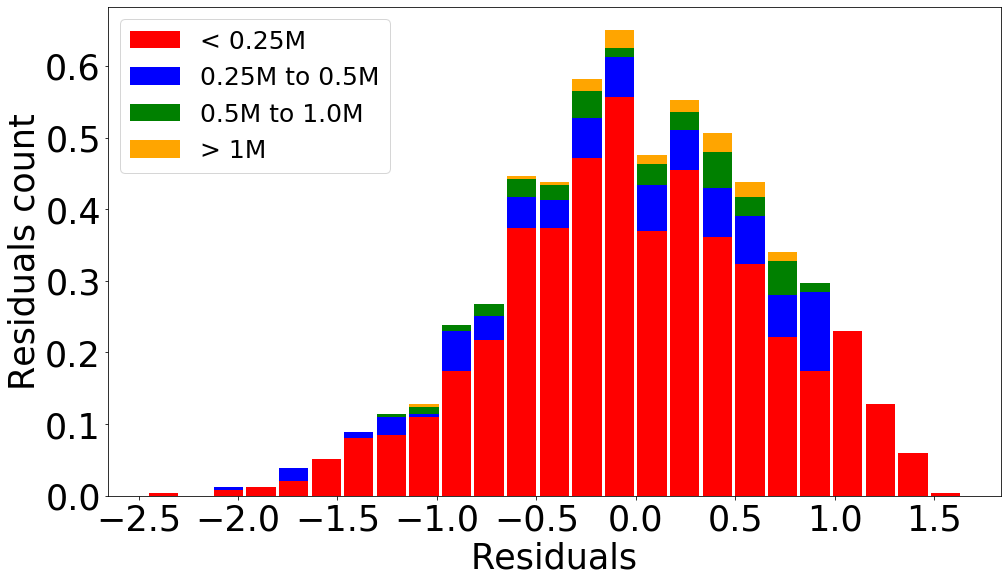

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


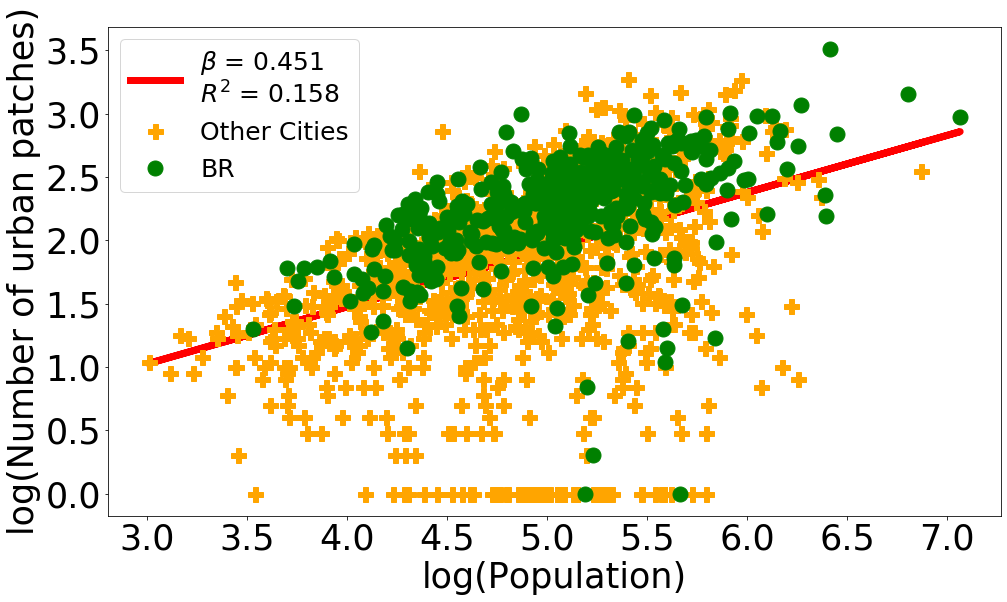

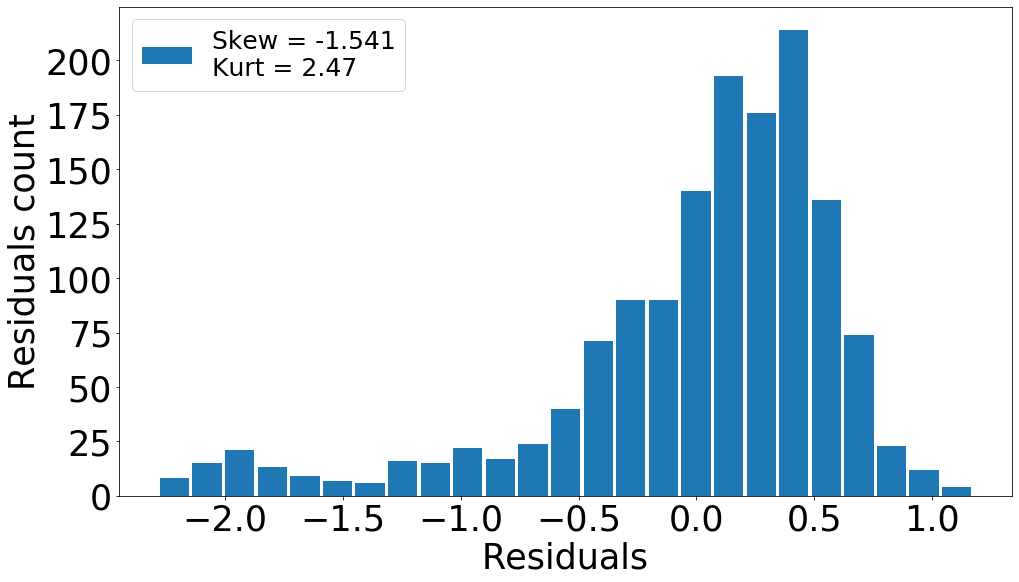

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


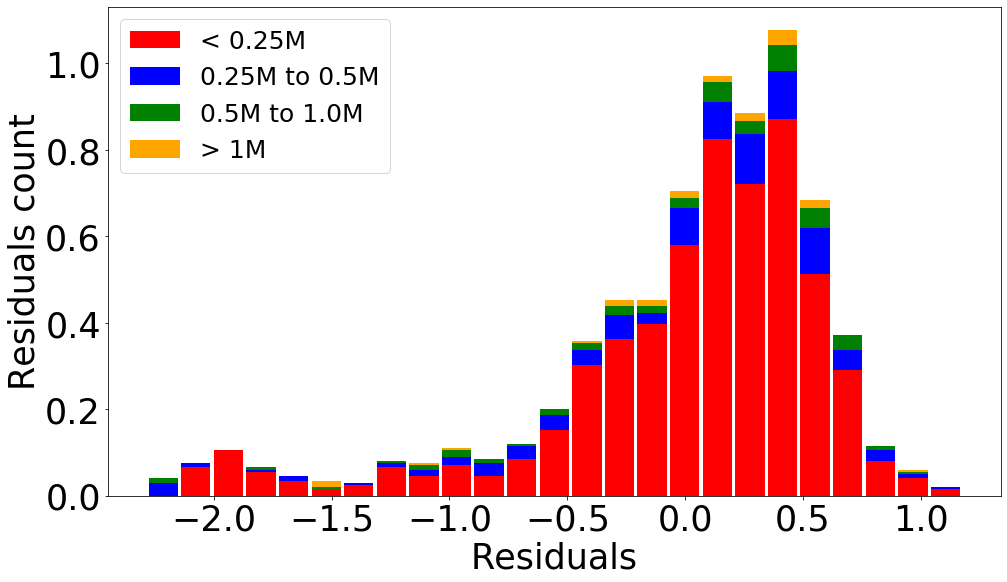

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


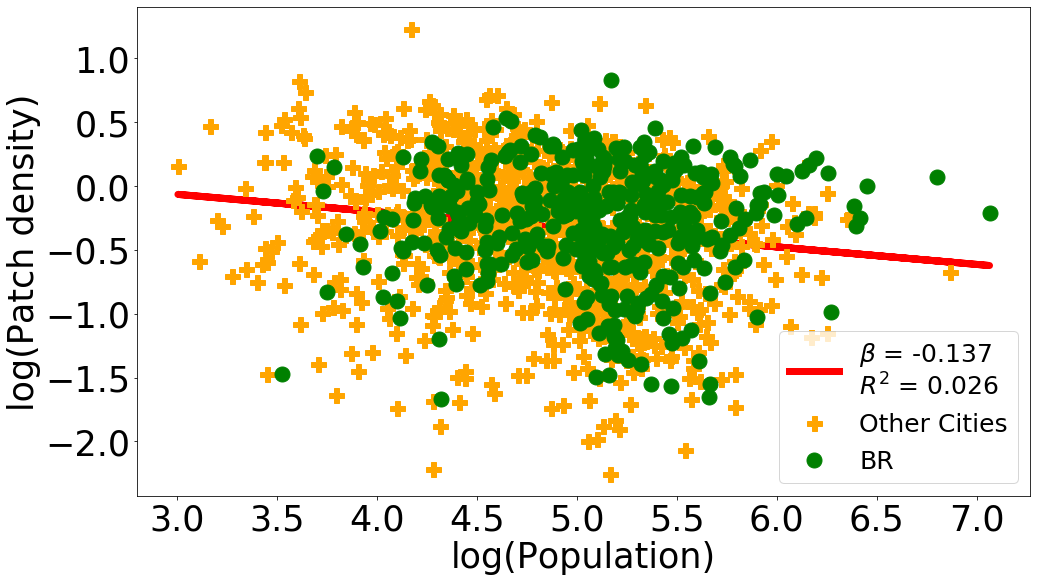

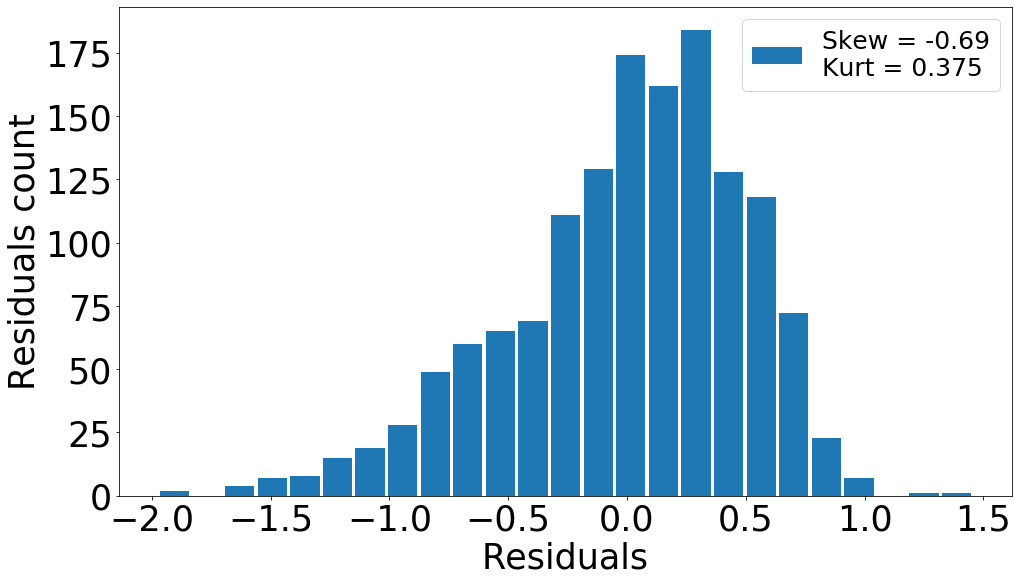

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


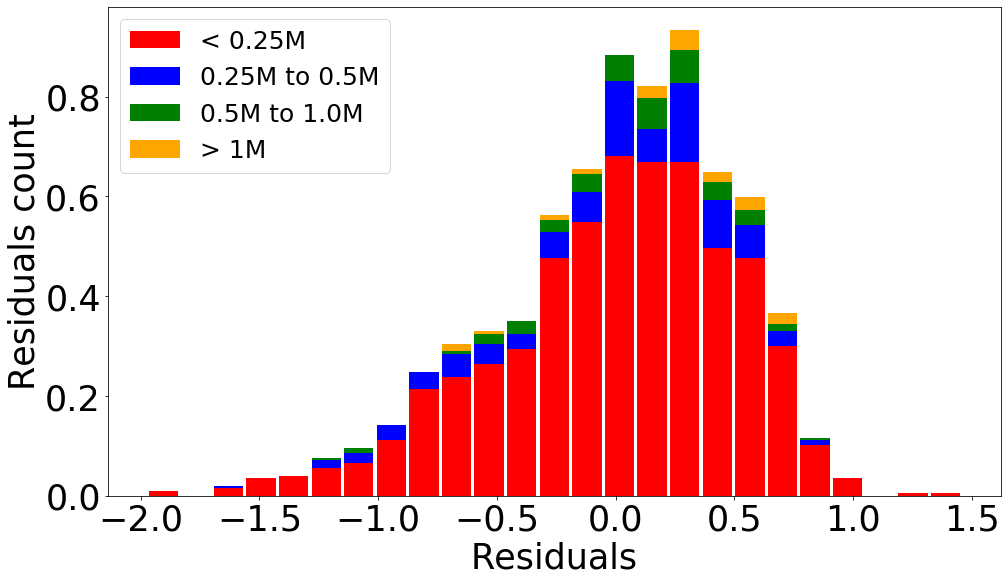

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


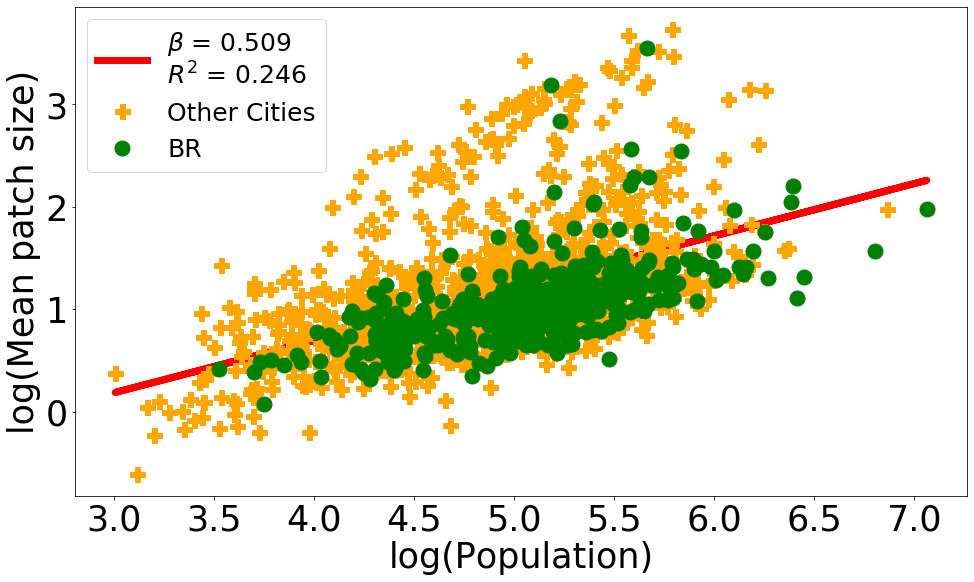

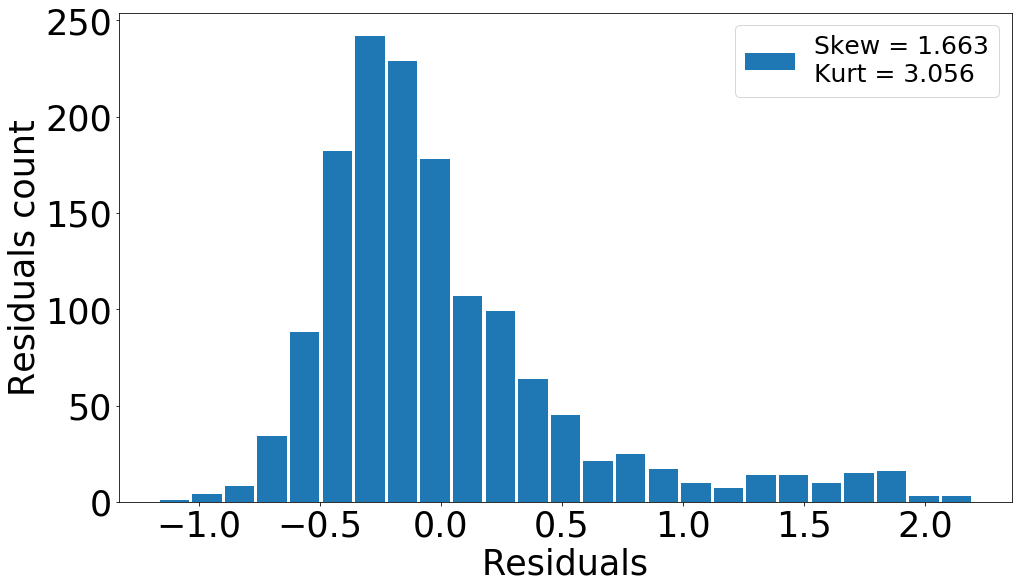

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


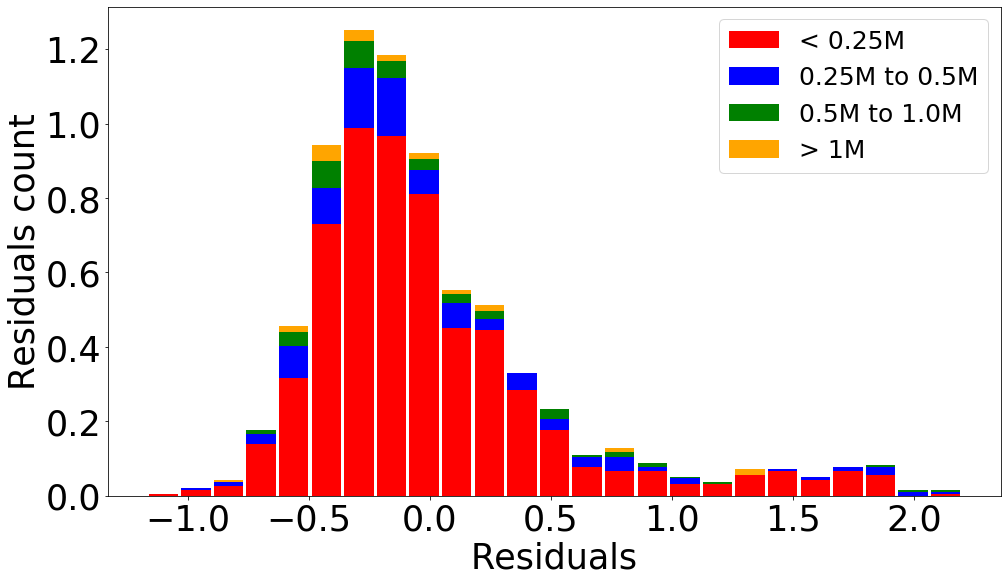

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


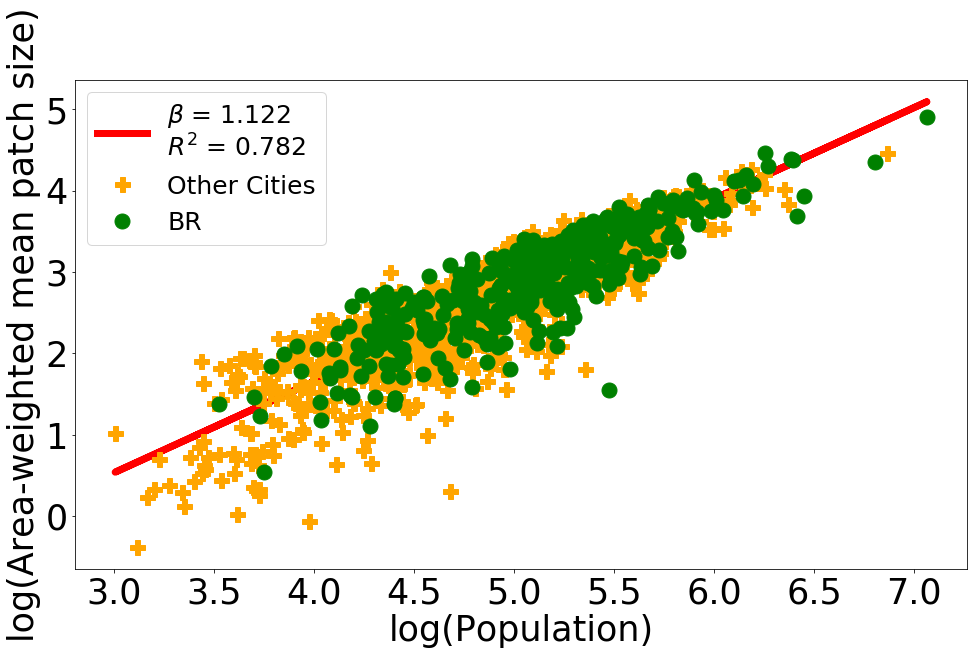

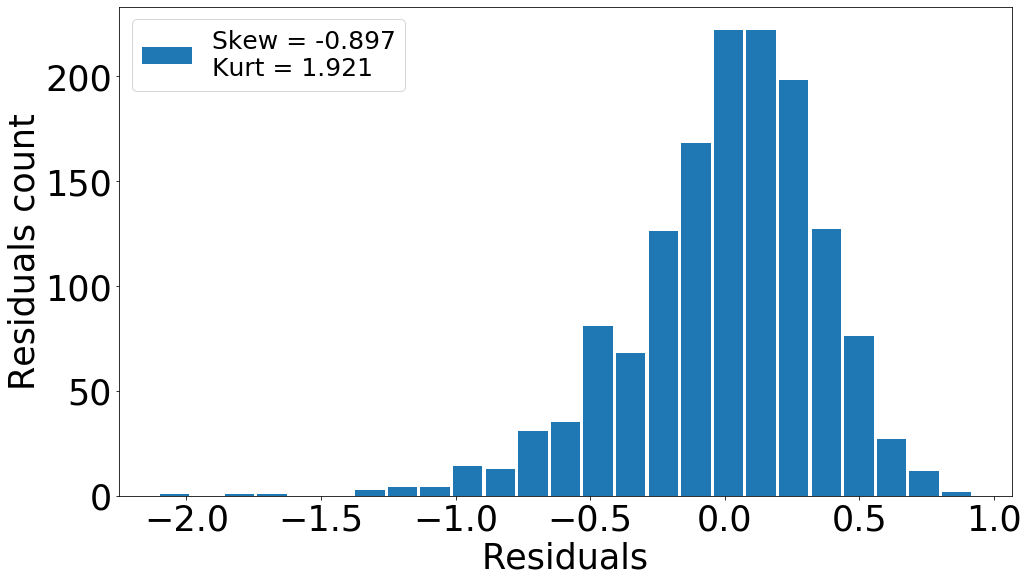

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


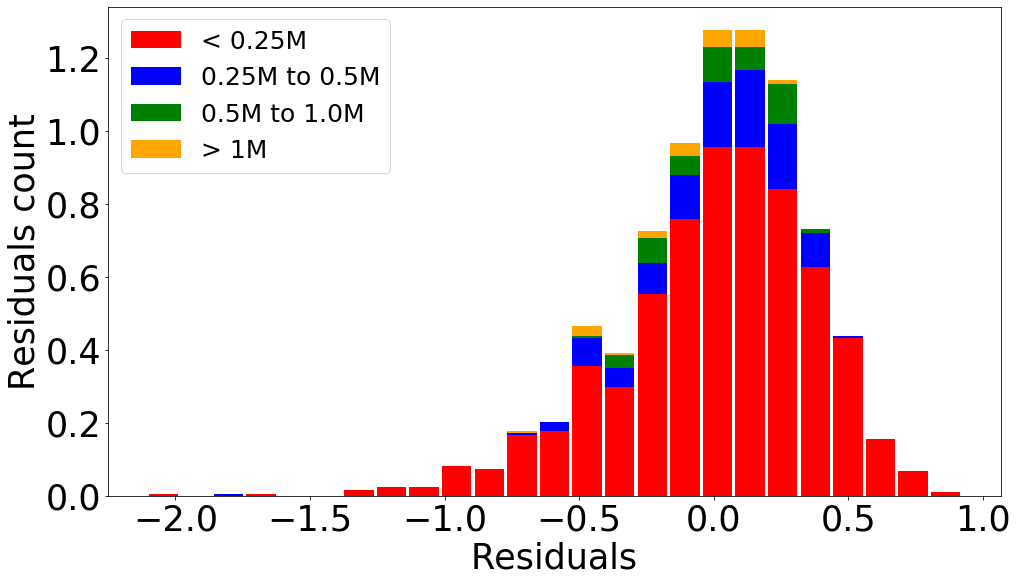

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


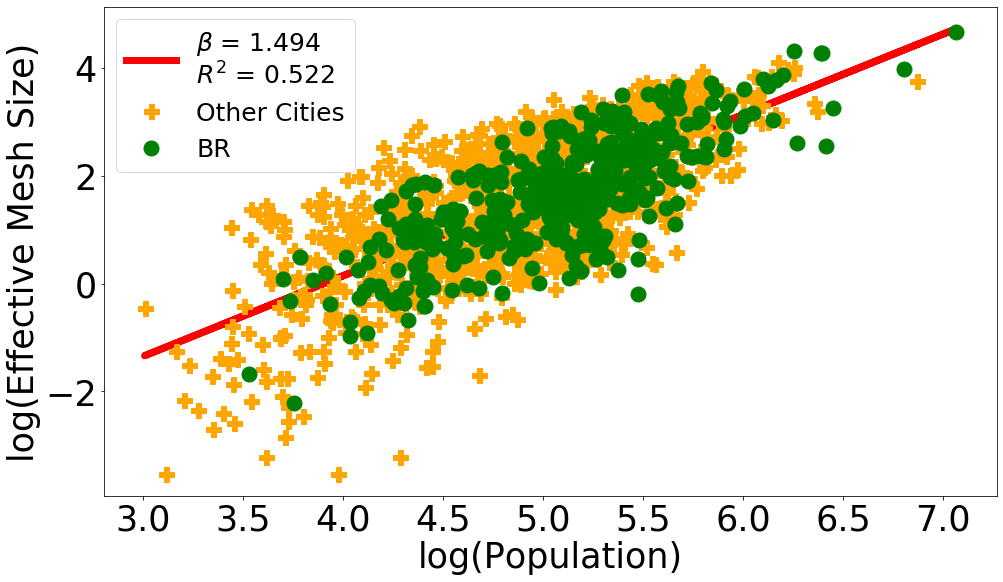

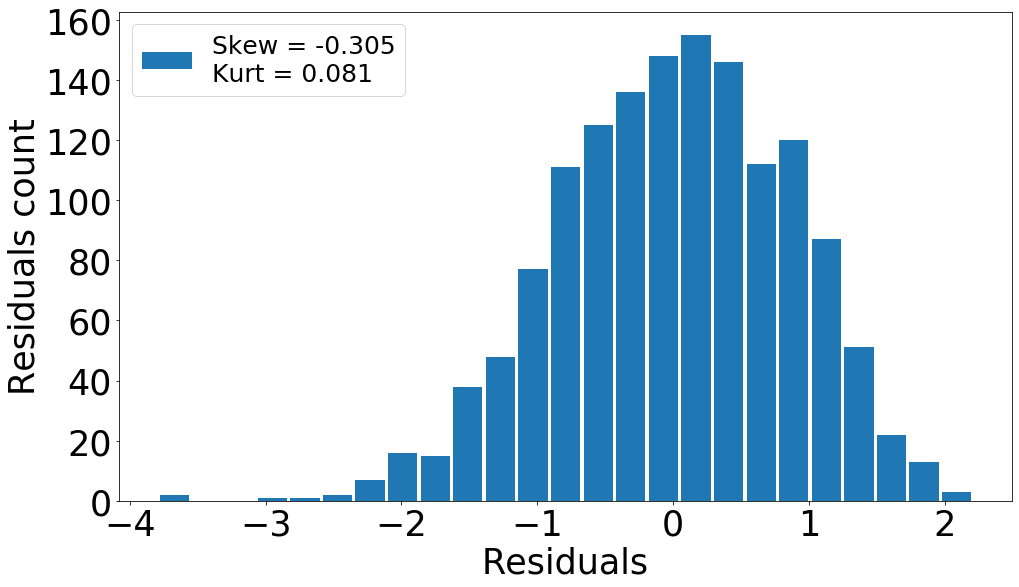

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


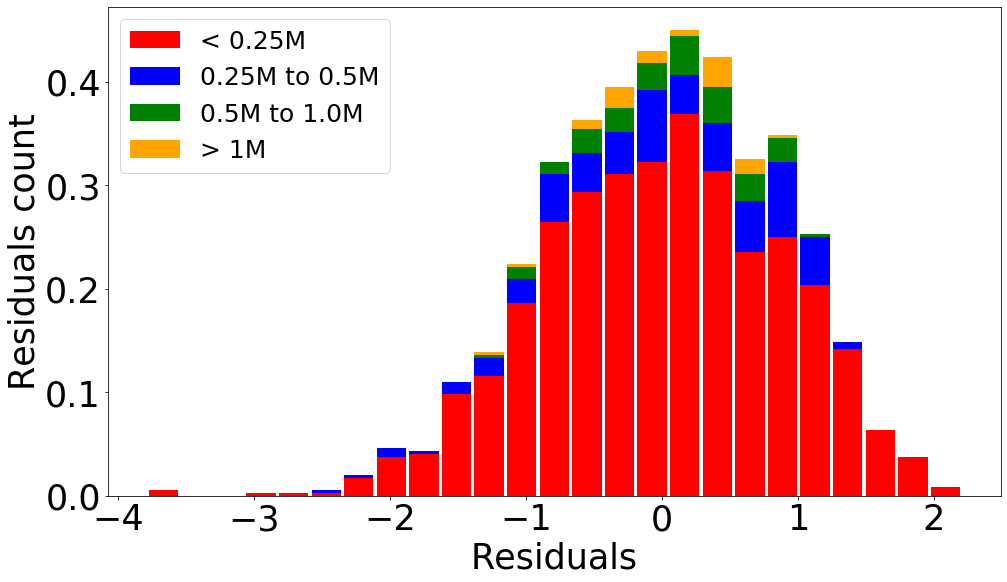

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.ne

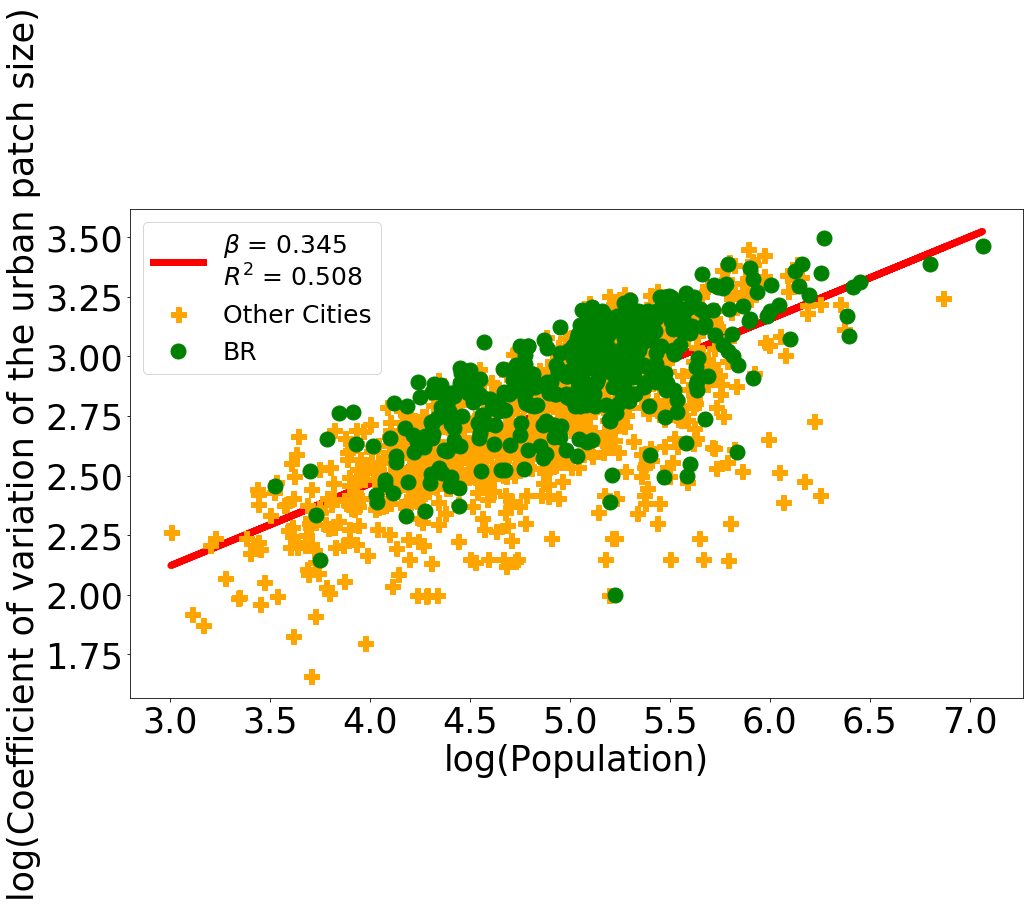

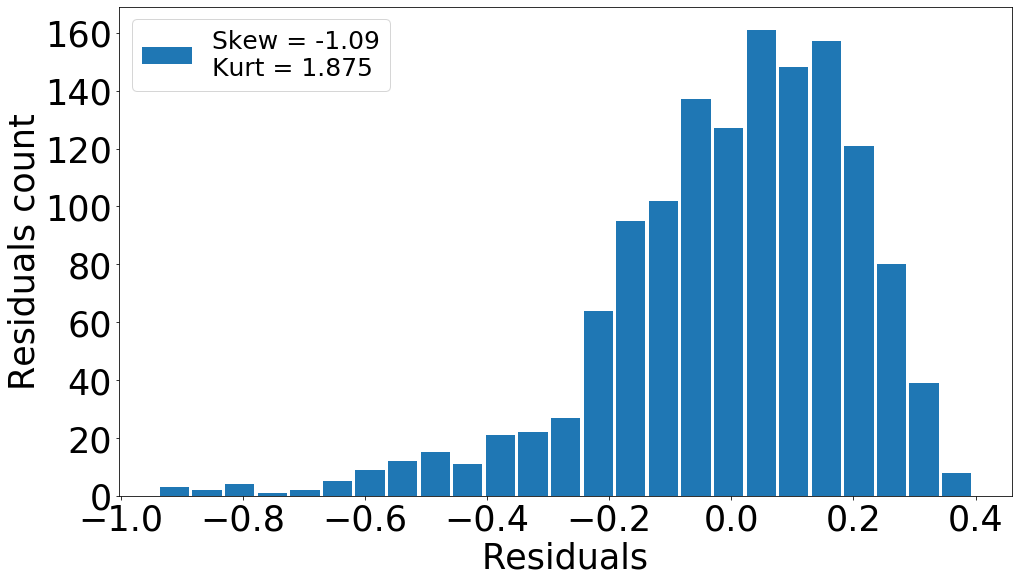

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


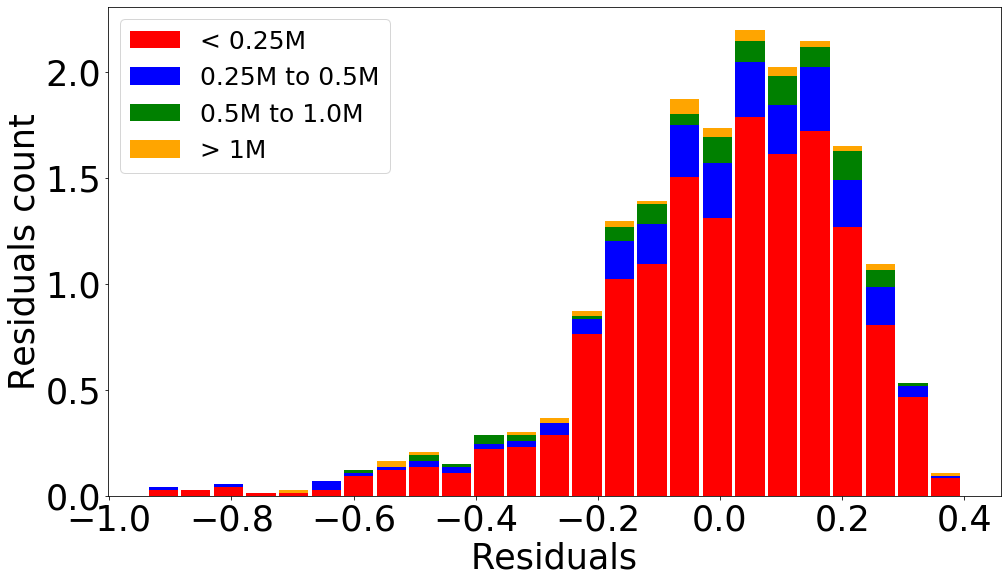

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


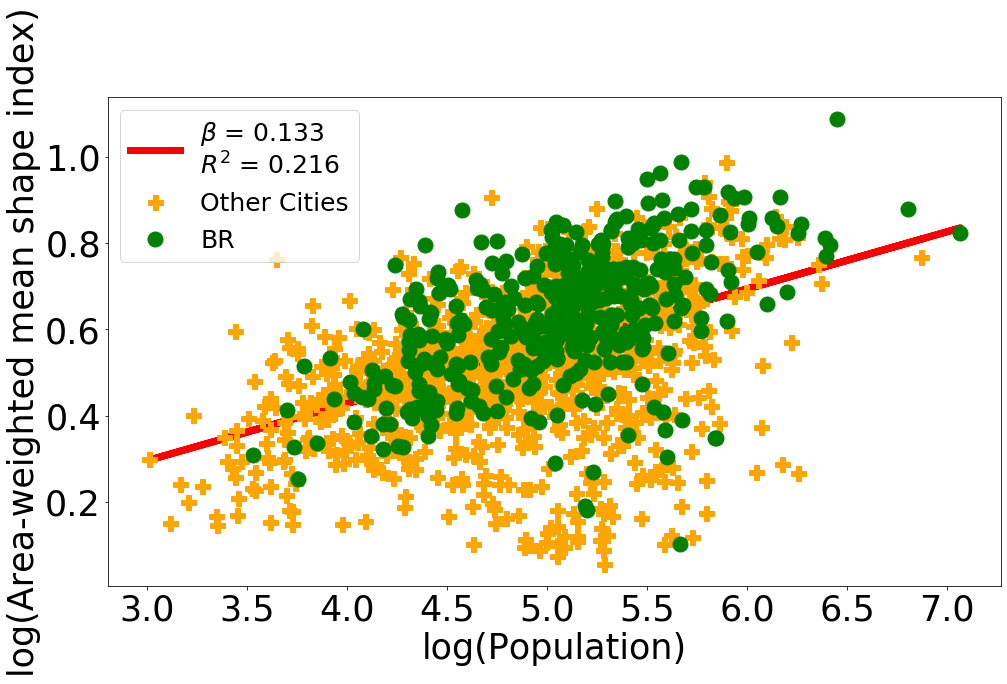

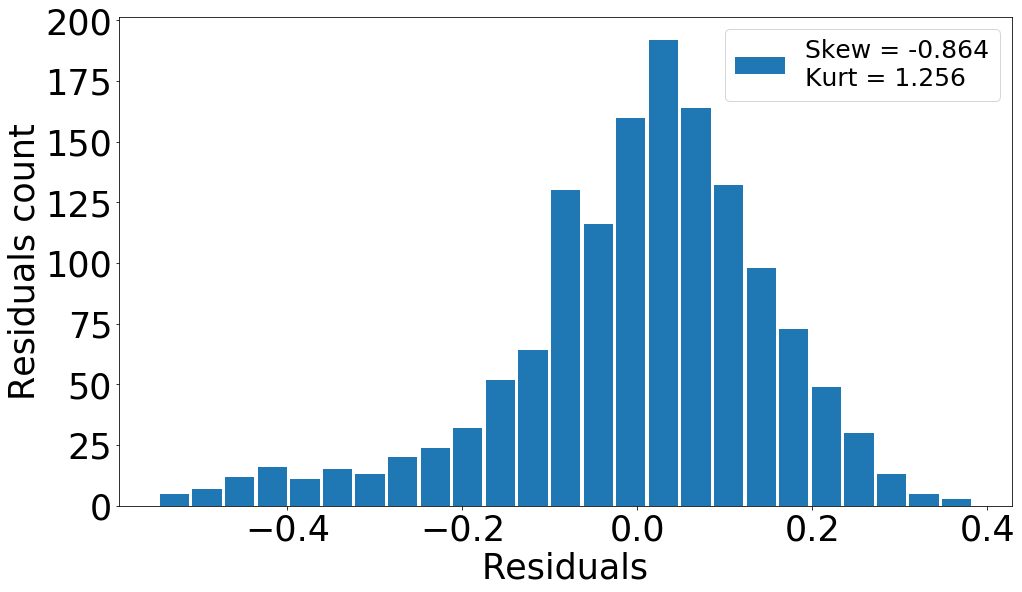

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


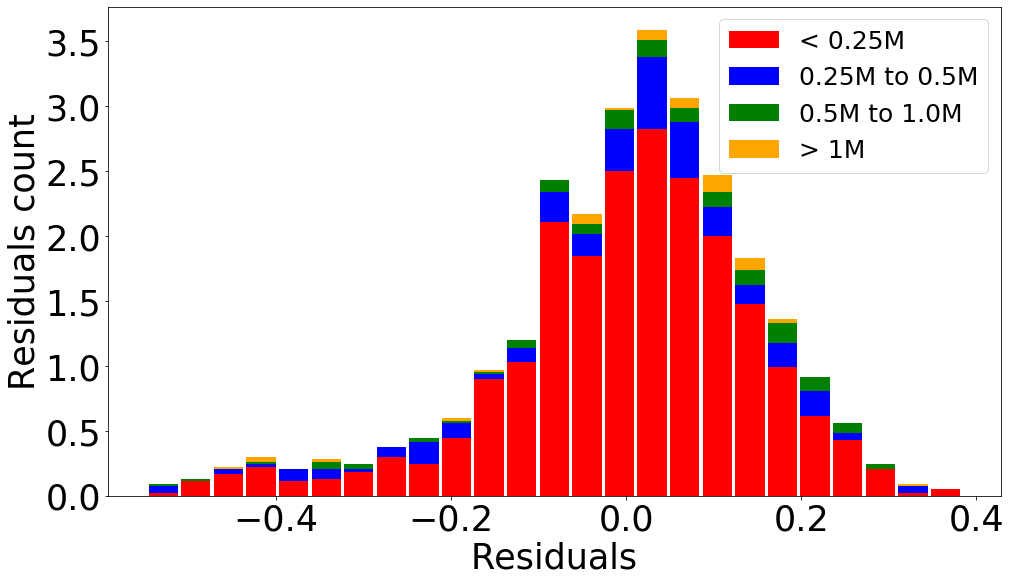

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


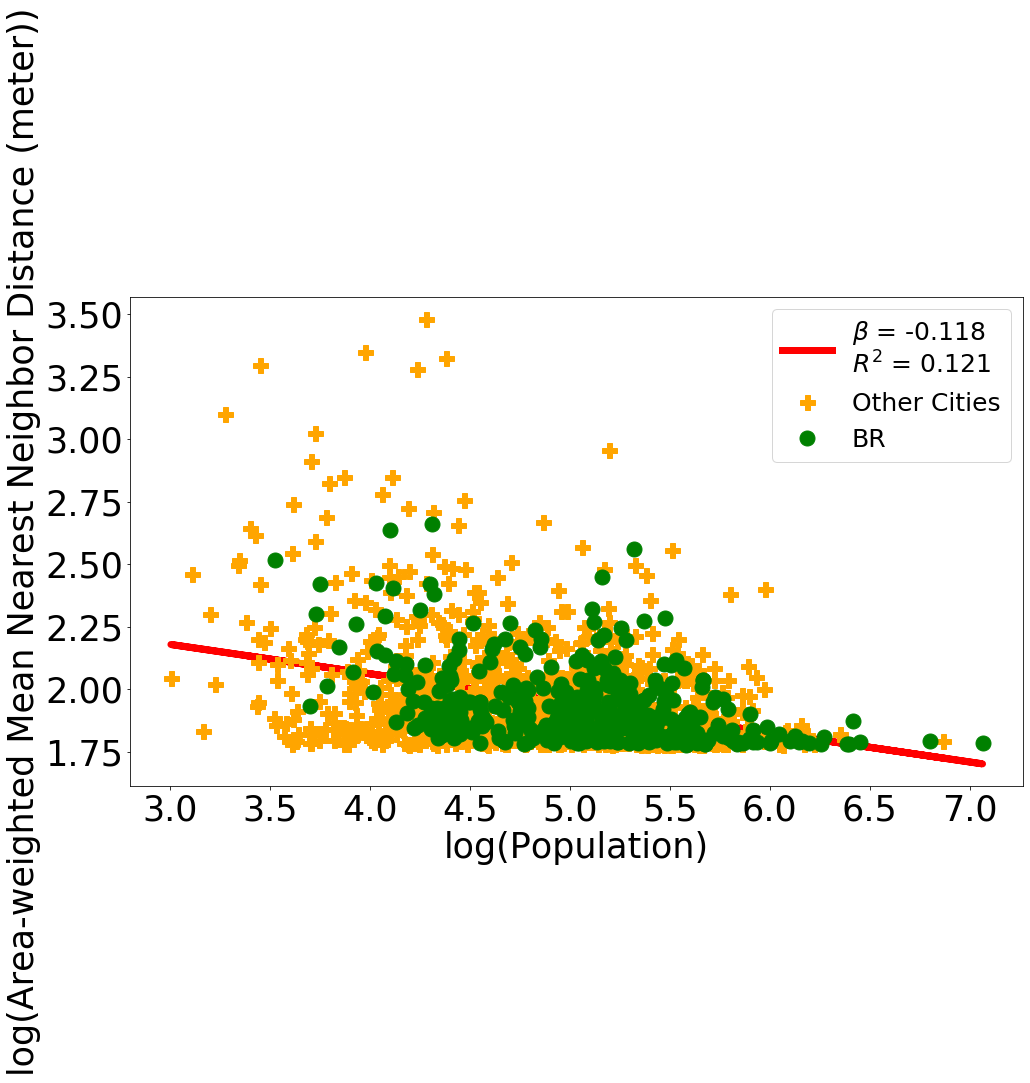

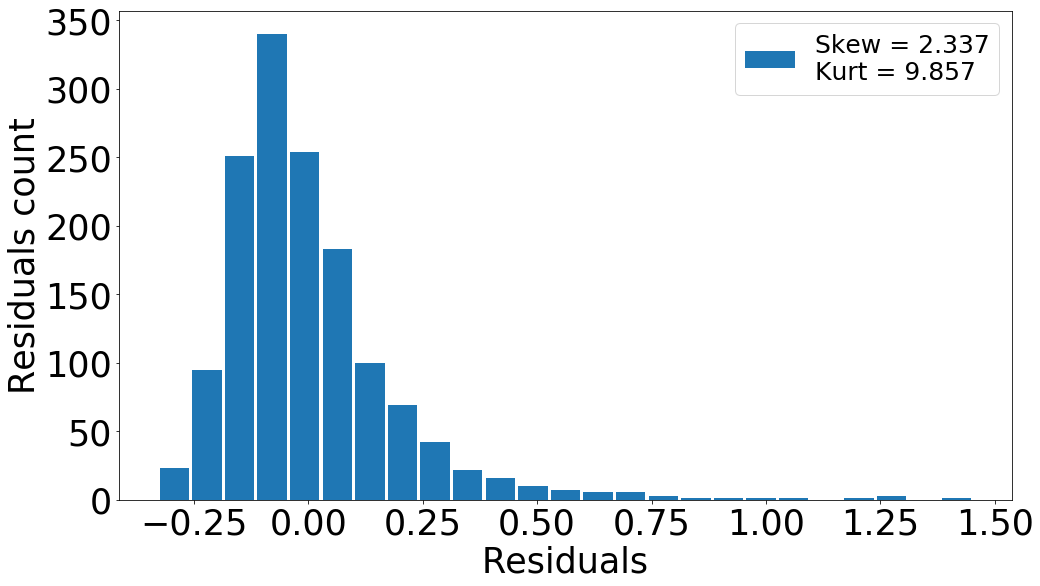

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


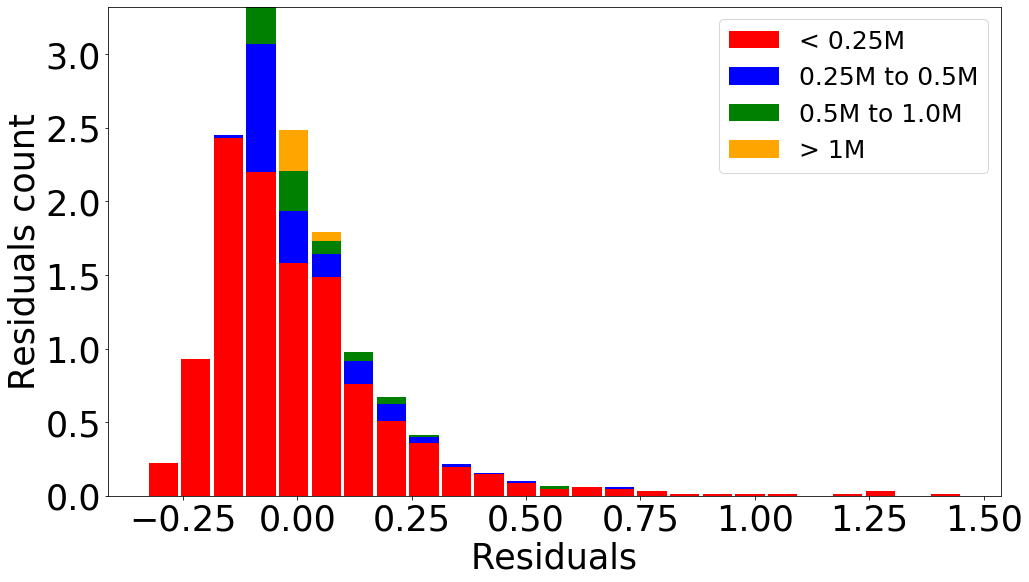

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.ne

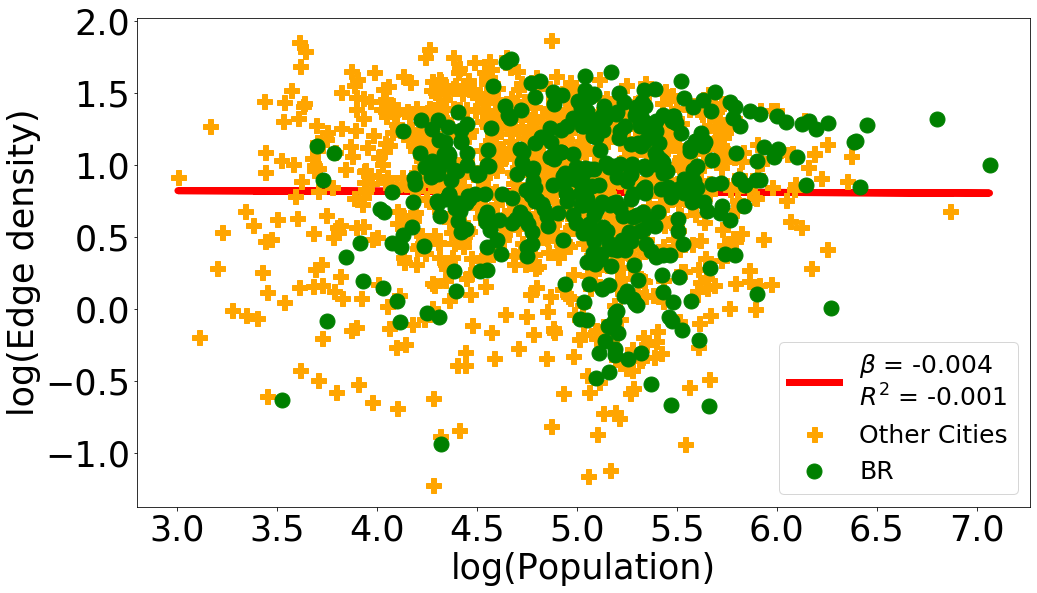

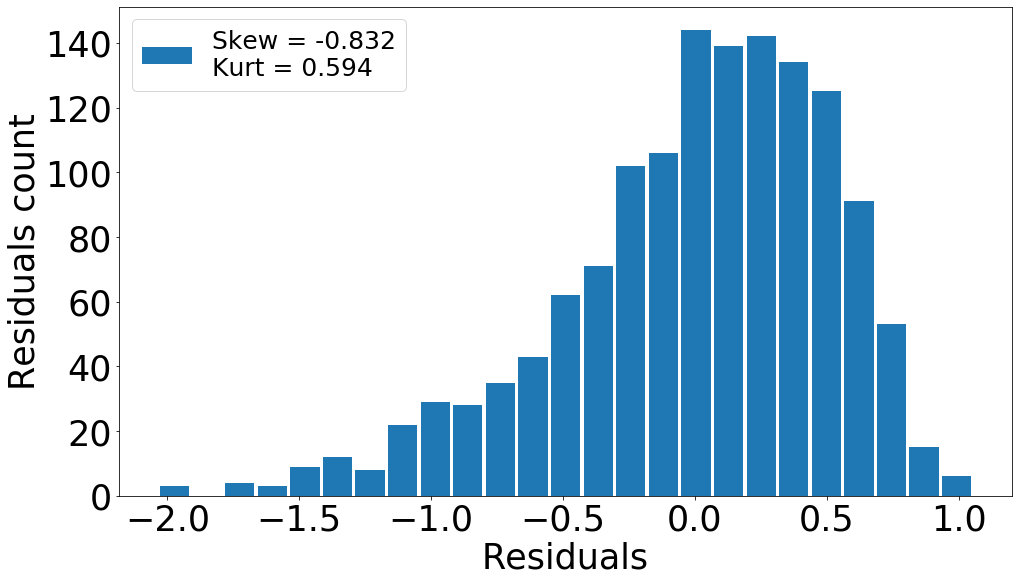

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


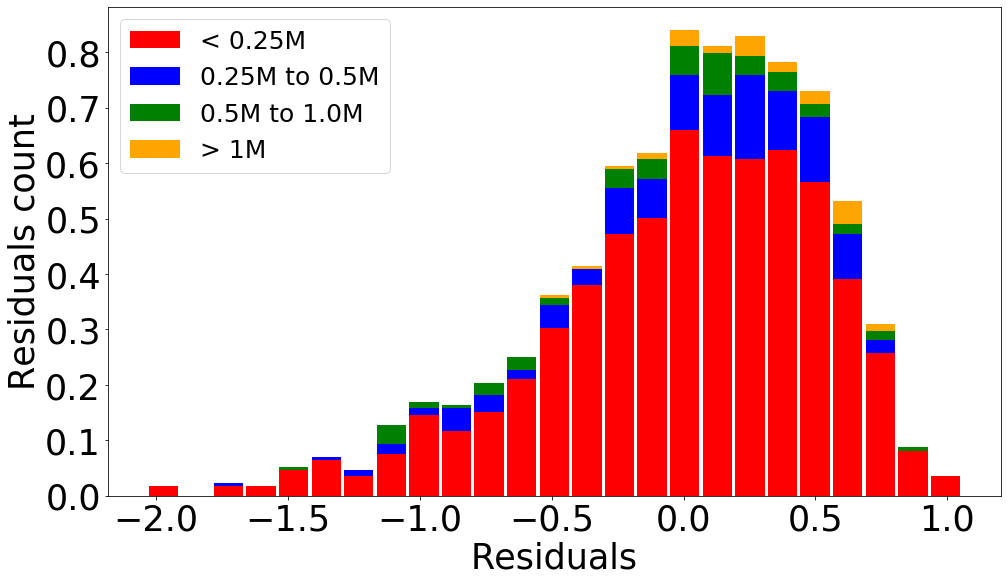

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


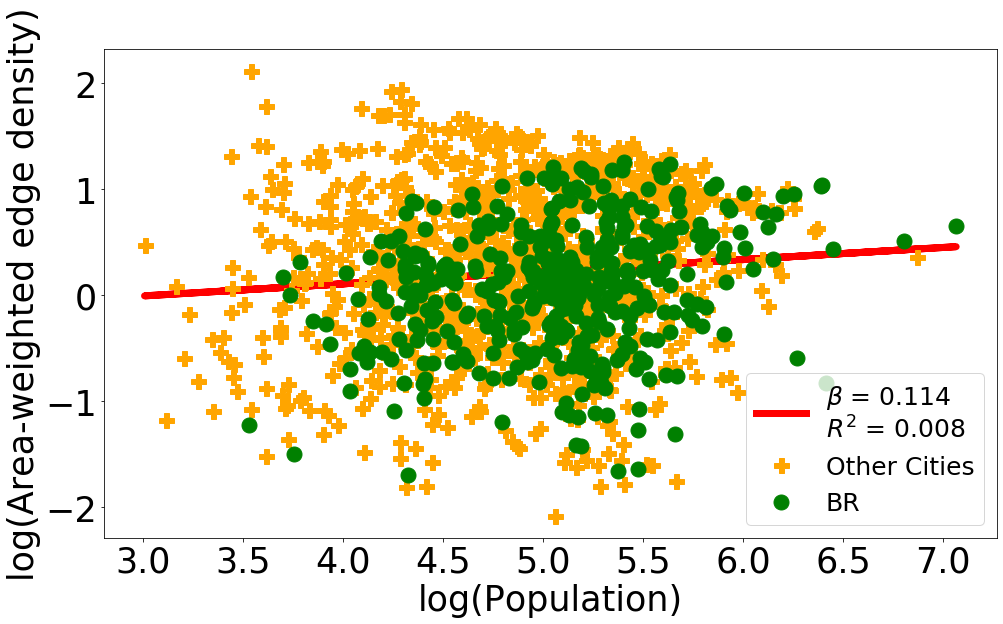

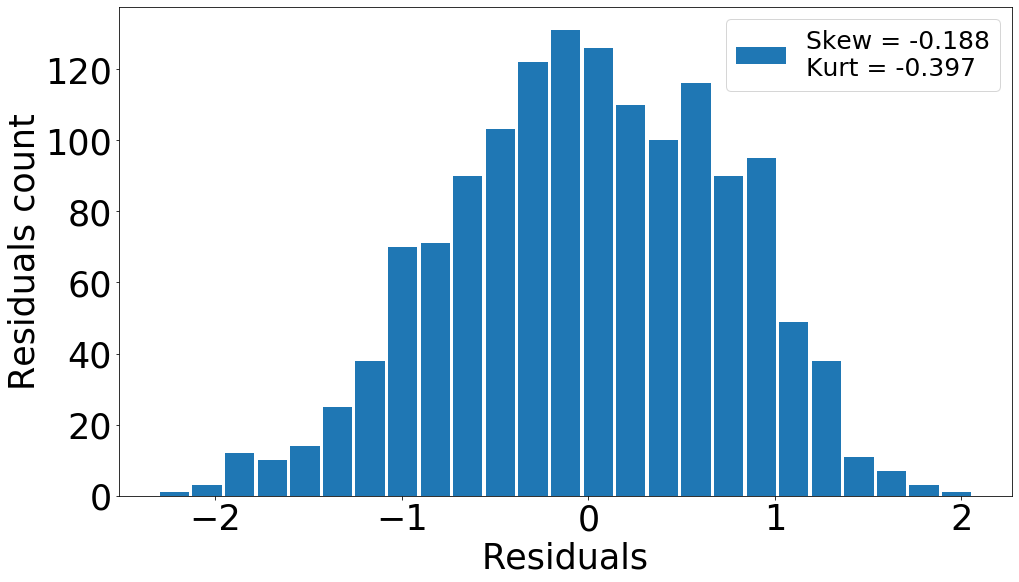

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


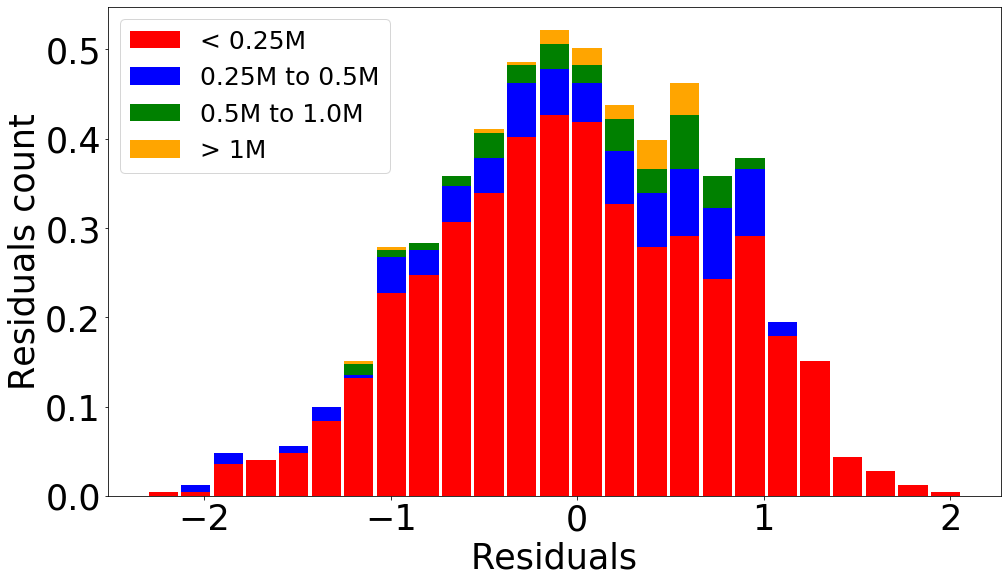

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


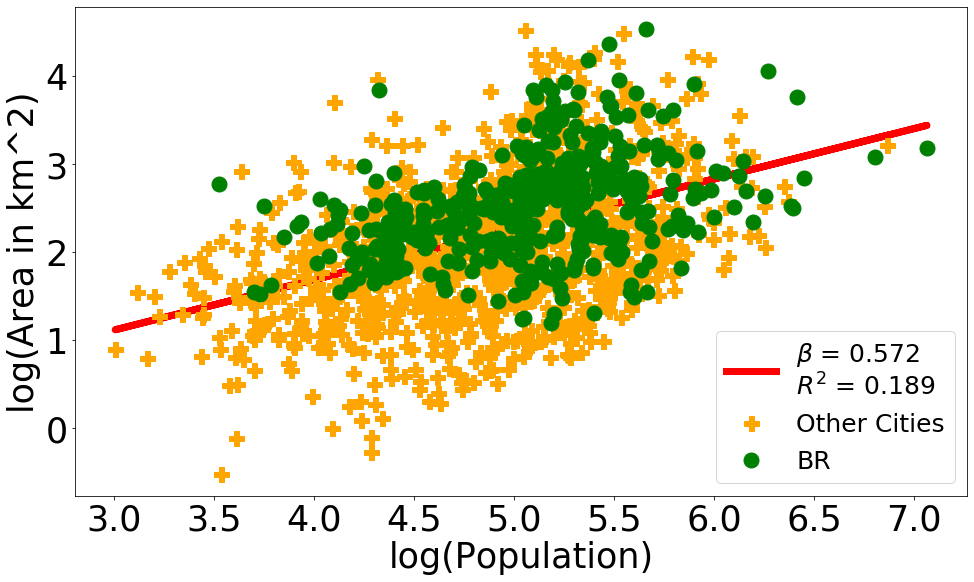

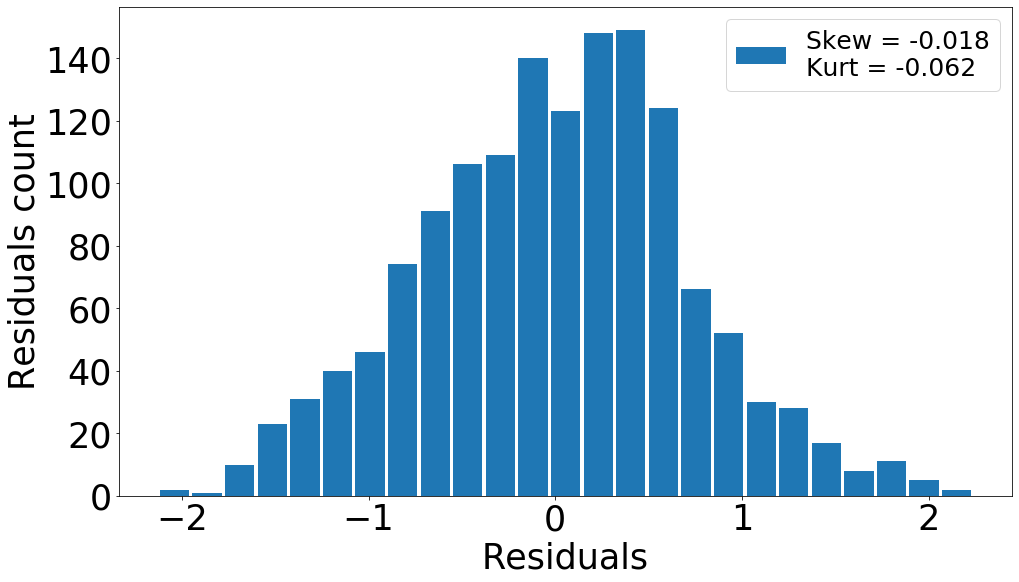

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


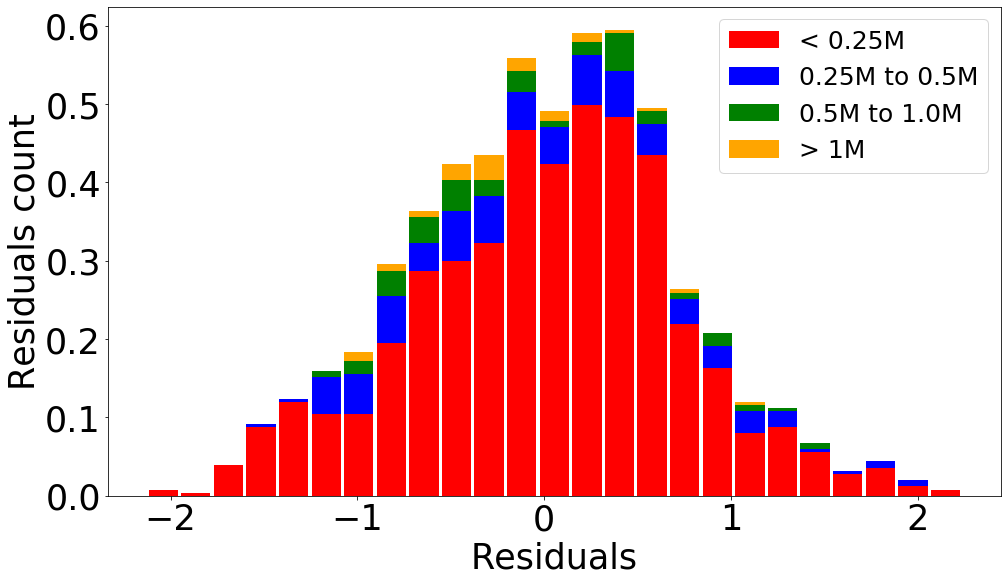

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


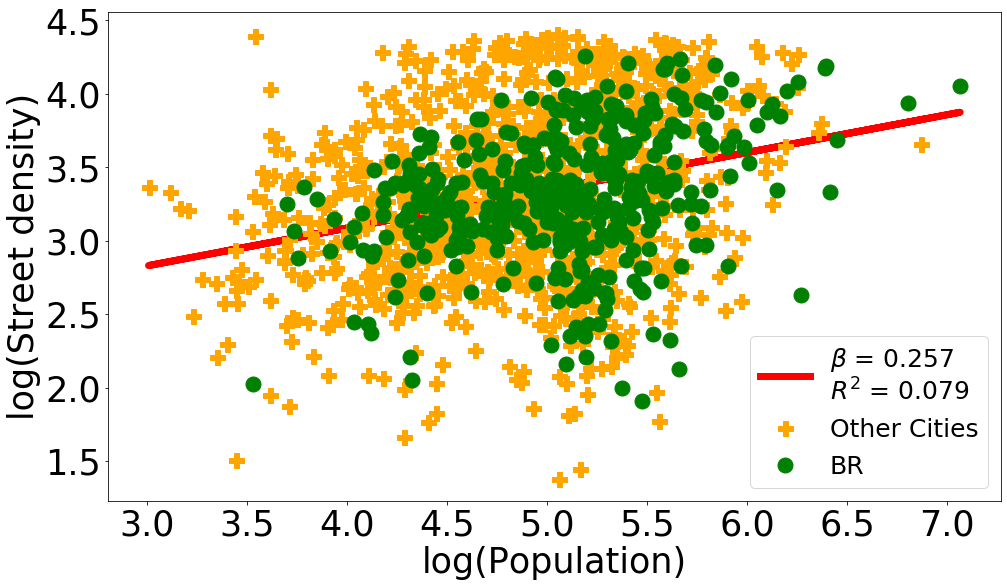

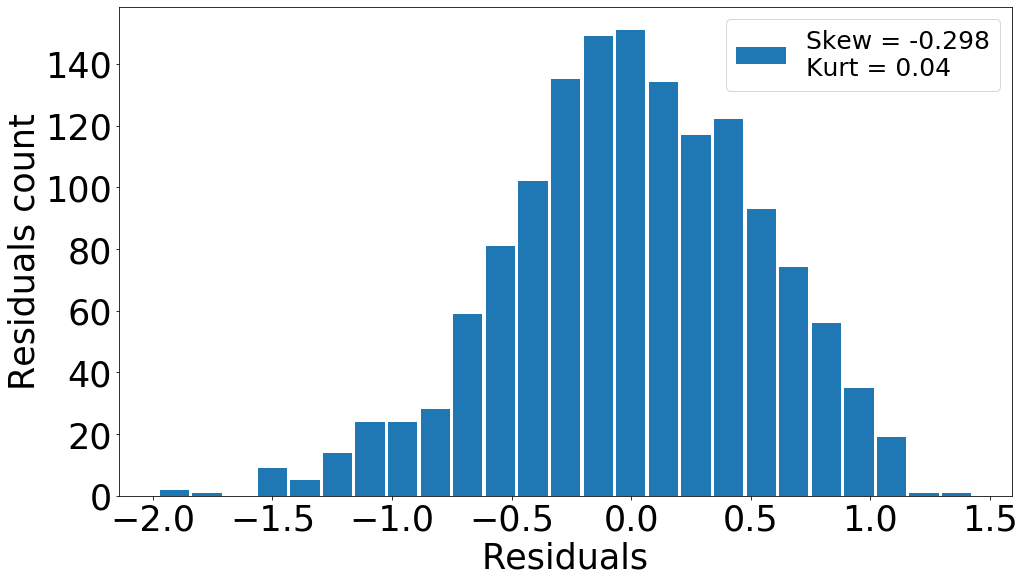

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


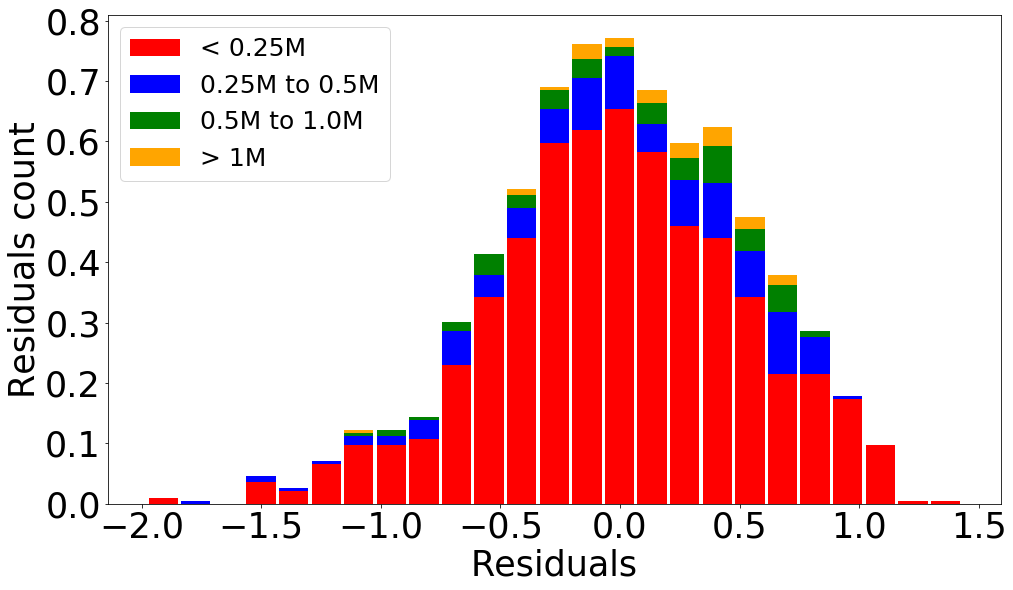

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.ne

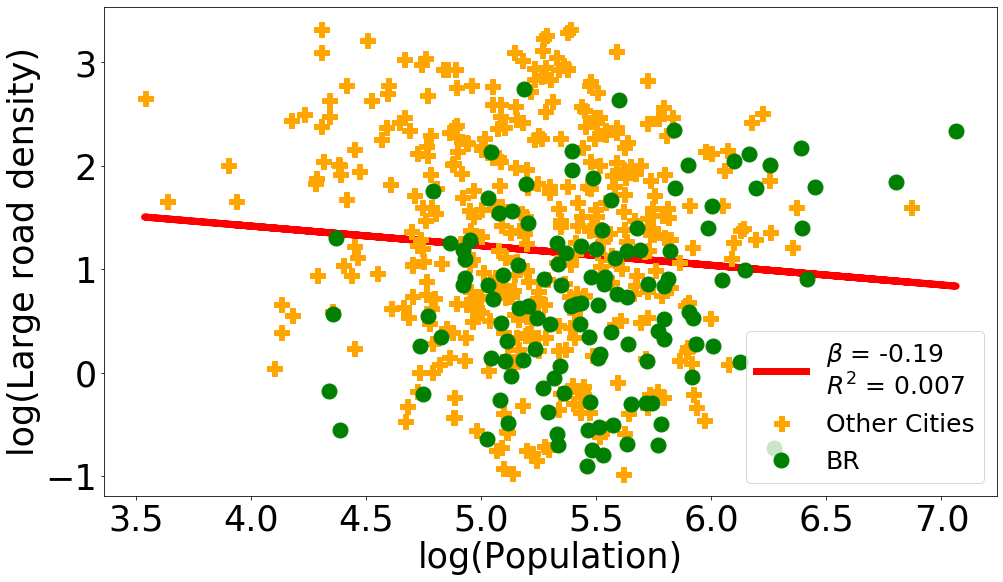

In [ ]:
indicator_L2 = []
alpha_L2 = []
Y0_L2 = []
residuos_L2 = []
IC3 = []

for i in range(0,len(n_L2)):   # len(n_L2)
    for j in range(len(Codebook.Measure)):
        if (n_L2[i] == Codebook.iloc[j,4]):
            df = pd.DataFrame({'x': np.log10(L2.BECTPOPL2)})
            df["y"] = np.log10(L2[n_L2[i]])
            df["Category"] = L2.ISO2

            df = df.reset_index()
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df[pd.notnull(df['y'])]

            y = df.y
            x = df.x

            model = LinearRegression()
            x = np.array(x)
            x = x.reshape(-1,1)
            model.fit(x,y)
            predd = model.predict(x)

            indicator_L2.append(Codebook.iloc[j,6])
            alpha_L2.append(round(model.coef_[0],3))
            Y0_L2.append(round(model.intercept_,3))
            residuos_L2.append(round(model.score(x, y),3))

            #if (round(popt[1],3) < 1.3) and (round(popt[1],3) > 0.1):
            R2 = 1-(1-model.score(x, y))*((len(df)-1)/(len(df)-2))
            
            X = sm.add_constant(x)
            mod = sm.OLS(y,X)
            res = mod.fit()
            ic = res.conf_int(0.1)
            ic2 = round(ic.iloc[1,0],3), round(ic.iloc[1,1],3)
            IC3.append(ic2)
            
            res = y - predd
            
            plt.figure(figsize=(16, 9))
            plt.plot(x, predd, 'r-', linewidth=7.0, label = r'$\beta$ = {}'.format(round(model.coef_[0],3)) + "\n" + 
                       r'$R^2$ = {}'.format(round(R2,3)))

            df3 = df[df.Category == 'Other Cities']
            groups2 = df3.groupby("Category")
            
            for name, group2 in groups2:
                plt.plot(group2["x"], group2["y"], marker="P", markersize = 15, linestyle="", label=name, 
                         color='orange')
                       
            df2 = df[df.Category == 'BR']       
            groups = df2.groupby("Category")
            
            for name, group in groups:
                plt.plot(group["x"], group["y"], marker="o", markersize = 15, linestyle="", label=name, 
                         color='g')

            #plt.title("L2", fontsize=35)
            plt.xlabel('log(Population)', fontsize=35)
            plt.ylabel('log({}'.format(Codebook.iloc[j,6])+')', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            plt.savefig('/Users/aurelianosancho/Desktop/NN/L2_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()
            
            ######################################
            
            plt.figure(figsize=(16, 9))
            np.var(res)
            plt.hist(res, bins=25, rwidth=0.9,label = 'Skew = {}'.format(round(skew(res),3)) + "\n" + 
                                           'Kurt = {}'.format(round(kurtosis(res),3))) 
            #width = 0.7 * (bins[1] - bins[0])
            #center = (bins[:-1] + bins[1:]) / 2
            #plt.bar(center, hist, align='center', width=width) 
            #plt.title('{}'.format(Codebook.iloc[j,6]), fontsize=35)
            plt.xlabel('Residuals', fontsize=35)
            plt.ylabel('Residuals count', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            plt.savefig('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_Br_vs_TODOS_L2/L2_Residuals_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()
            
            ######################################
            group1 = []
            group2 = []
            group3 = []
            group4 = []
            
            for l in range(len(res)):
                if (L2.iloc[l,16] <= 250000):
                    group1.append(res.iloc[l])
                elif (L2.iloc[l,16] > 250000) and (L2.iloc[l,16] <= 500000):
                    group2.append(res.iloc[l])
                elif (L2.iloc[l,16] > 500000) and (L2.iloc[l,16] < 1000000):
                    group3.append(res.iloc[l])
                else:
                    group4.append(res.iloc[l])
            
            plt.figure(figsize=(16, 9))
            bins = 25;
            plt.hist([group1,group2,group3, group4], bins, stacked=True, density=True, rwidth=0.9,
                      color=["red", "blue", "green", "orange"], 
                      label = ["< 0.25M", "0.25M to 0.5M", "0.5M to 1.0M", "> 1M"])

            #plt.title('{}'.format(Codebook.iloc[j,6]), fontsize=35)
            plt.xlabel('Residuals', fontsize=35)
            plt.ylabel('Residuals count', fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            plt.savefig('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_Br_vs_TODOS_L2/L2_GROUPS_Residuals_Population_x_{}'.format(Codebook.iloc[j,6]))
            plt.show()

In [ ]:
data_L2 = pd.DataFrame({'Y': indicator_L2, r'$\beta_{L2}$': alpha_L2, r'$95\%$ $CI_{L2}$': IC3,
                          r'$R^{2}_{L2}$': residuos_L2})
data_L2.to_csv('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/Linear_L2.csv')

In [ ]:
data_L2

In [ ]:
data_L1AD

In [ ]:
result = pd.merge(data_L1AD,
                  data_L1UX,
                  on='Y', how = 'left')
result = pd.merge(result,
                  data_L2,
                  on='Y', how = 'left')

In [ ]:
result.head(200)

In [ ]:
#result = result.sort_values('Alpha_L1AD', ascending=False)
result.to_csv('/Users/aurelianosancho/Dropbox/Proposal_Aureliano/Results_proposal/All_Cities0.csv')

In [ ]:
result.head(200)

In [ ]:
data_L1AD.columns

In [ ]:
data_L1ADt = data_L1AD.sort_values(r'$\beta_{L1AD}$', ascending=False)
data_L1ADt

In [ ]:
data_L1UXt = data_L1UX.sort_values(r'$\beta_{L1UX}$', ascending=False)
data_L1UXt

In [ ]:
data_L2t = data_L2.sort_values(r'$\beta_{L2}$', ascending=False)
data_L2t